## Carga y Exploración Inicial

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# Cargar el archivo Excel
file_path = 'DATASET_VIH_LIMPIO_20250508_1728.xlsx'

# Leer todas las hojas del archivo
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Verificar las hojas disponibles
print("Hojas disponibles en el archivo:", sheets_dict.keys())

# Cargar la hoja principal (Datos VIH)
df = sheets_dict['Datos VIH']

# Mostrar información básica del dataframe
print("\nInformación del DataFrame:")
print(df.info())

# Mostrar las primeras filas
print("\nPrimeras filas del DataFrame:")
print(df.head())

Hojas disponibles en el archivo: dict_keys(['Datos VIH', 'Numero de Casos Meses', 'Numero de Casos Anual'])

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Semana               14491 non-null  int64         
 1   Año                  14491 non-null  int64         
 2   Nombre Nacionalidad  14491 non-null  object        
 3   Sexo                 14491 non-null  object        
 4   Estrato              14491 non-null  object        
 5   Grupo Edad           14491 non-null  object        
 6   mes_num              14491 non-null  int64         
 7   mes_nombre           14491 non-null  object        
 8   Poblacion            14491 non-null  int64         
 9   Fecha                14491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 1.1+ MB
No

## Evolución de casos

### Evolución semanal

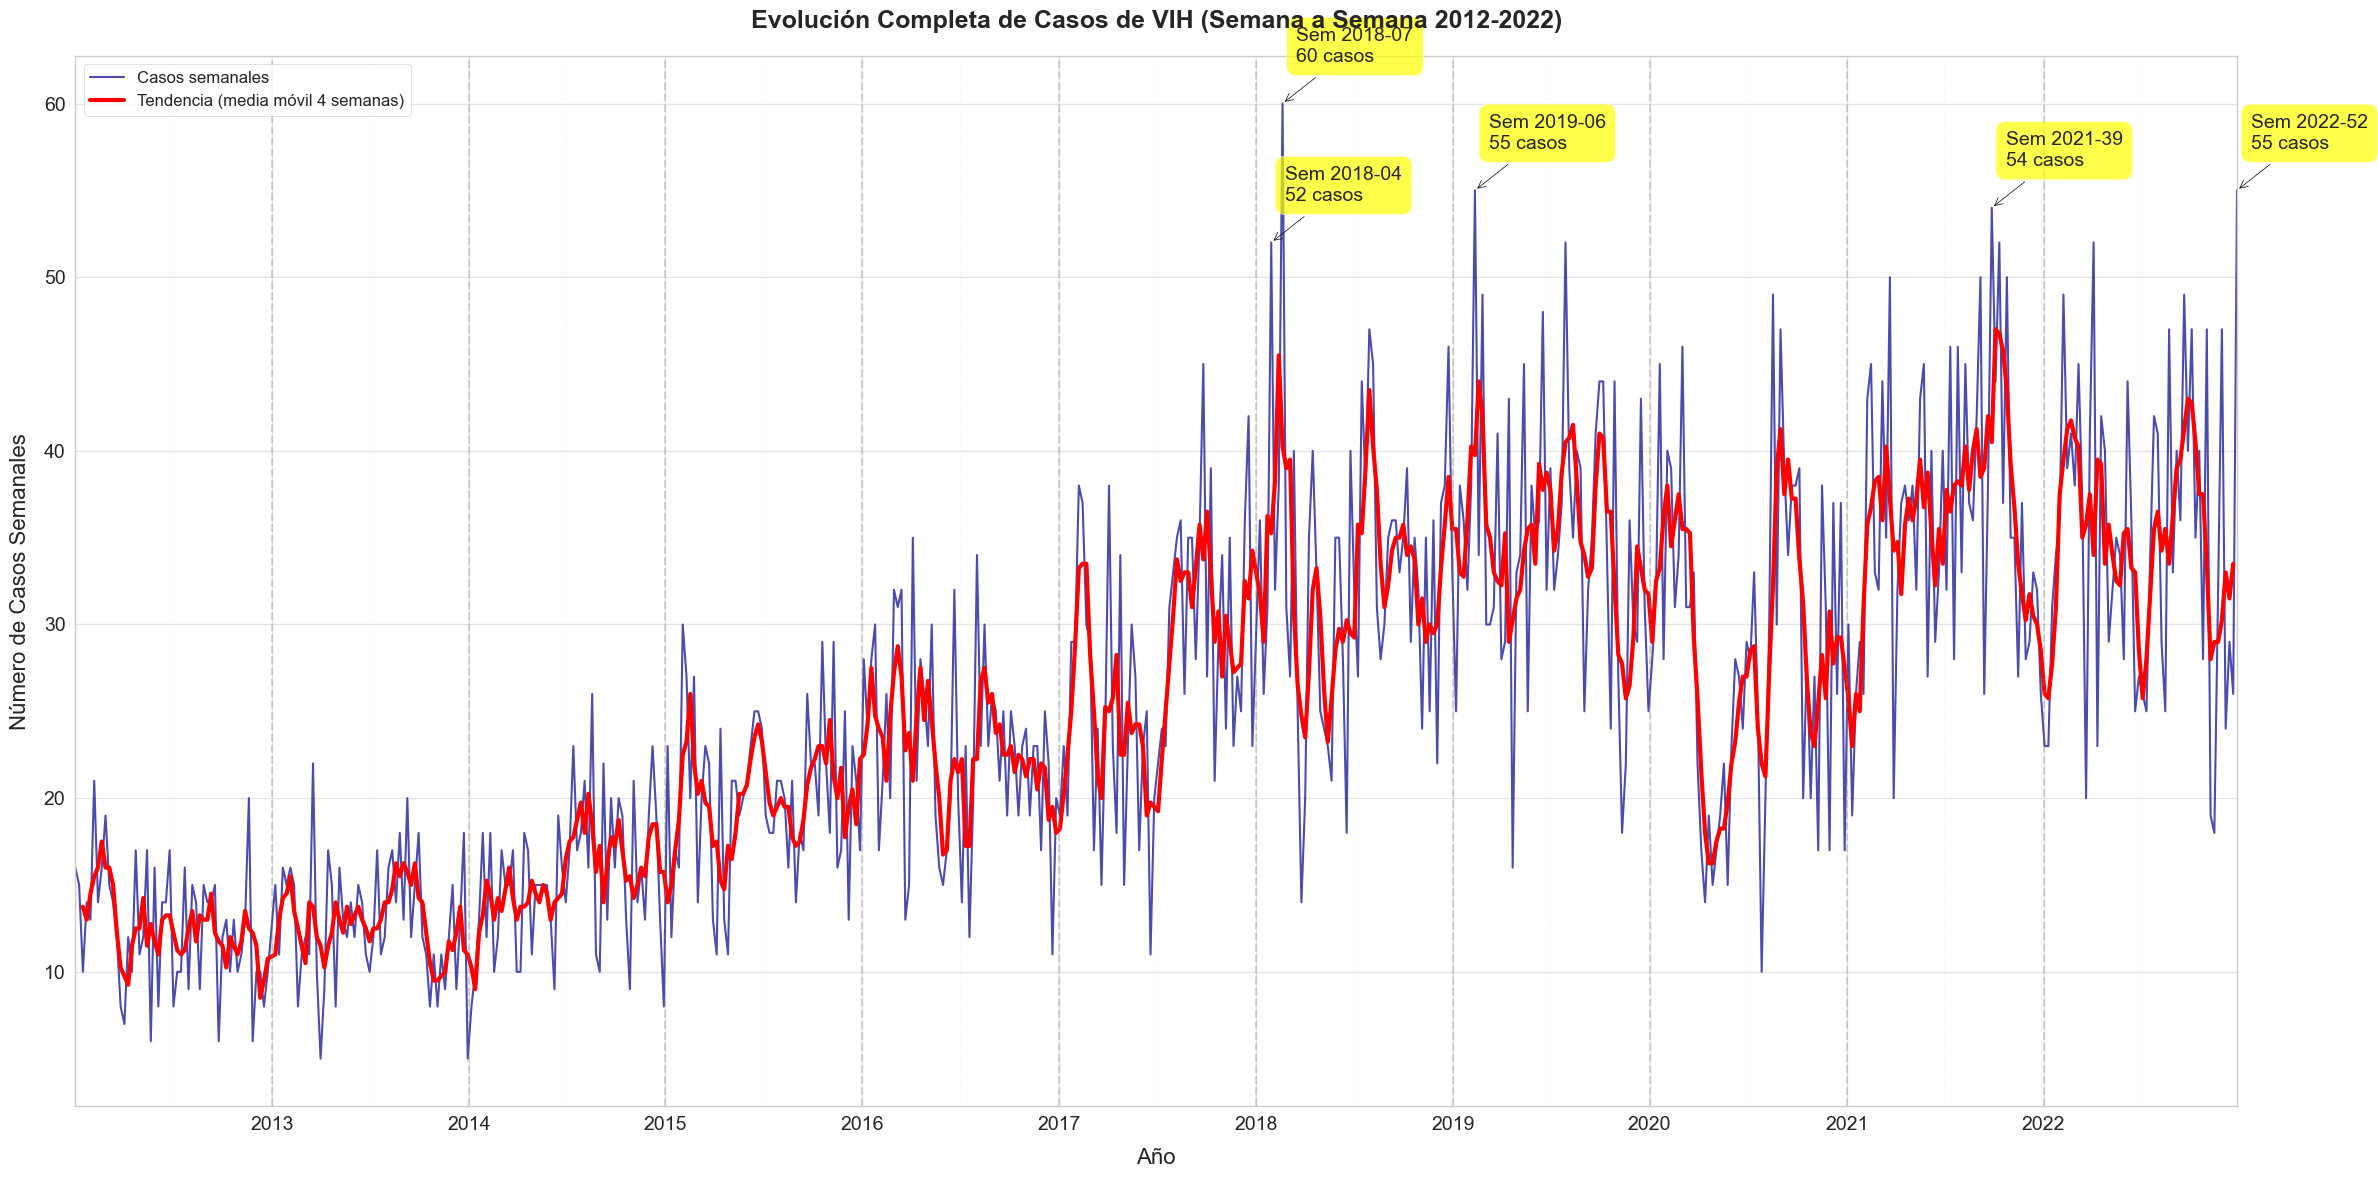

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14

# 1. Preparar los datos

df['Fecha_Completa'] = df.apply(lambda x: pd.to_datetime(f"{int(x['Año'])}-{int(x['Semana'])}-1", format='%Y-%U-%w'), axis=1)

# Ordenar por fecha
df = df.sort_values('Fecha_Completa')

# Agrupar por fecha para obtener conteo de casos
evolucion_completa = df.groupby('Fecha_Completa').size().reset_index(name='Casos')


plt.figure(figsize=(24, 12))

plt.plot(evolucion_completa['Fecha_Completa'], evolucion_completa['Casos'], 
         color='darkblue', linewidth=1.5, alpha=0.7, label='Casos semanales')

# Suavizar la línea con media móvil de 4 semanas
evolucion_completa['Media_Movil'] = evolucion_completa['Casos'].rolling(window=4, center=True).mean()
plt.plot(evolucion_completa['Fecha_Completa'], evolucion_completa['Media_Movil'], 
         color='red', linewidth=3, label='Tendencia (media móvil 4 semanas)')


ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonth=[7]))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.grid(which='major', linestyle='-', linewidth=1, alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

plt.title('Evolución Completa de Casos de VIH (Semana a Semana 2012-2022)', 
          fontsize=18, pad=20, weight='bold')
plt.xlabel('Año', fontsize=16, labelpad=10)
plt.ylabel('Número de Casos Semanales', fontsize=16, labelpad=10)


for year in range(2012, 2023):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.3)


top_cases = evolucion_completa.nlargest(5, 'Casos')
for i, row in top_cases.iterrows():
    plt.annotate(f'Sem {row["Fecha_Completa"].strftime("%Y-%U")}\n{int(row["Casos"])} casos',
                 xy=(row['Fecha_Completa'], row['Casos']),
                 xytext=(10, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

# Ajustar límites para eliminar espacios en blancoplt.xlim(evolucion_completa['Fecha_Completa'].min(), evolucion_completa['Fecha_Completa'].max())


plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

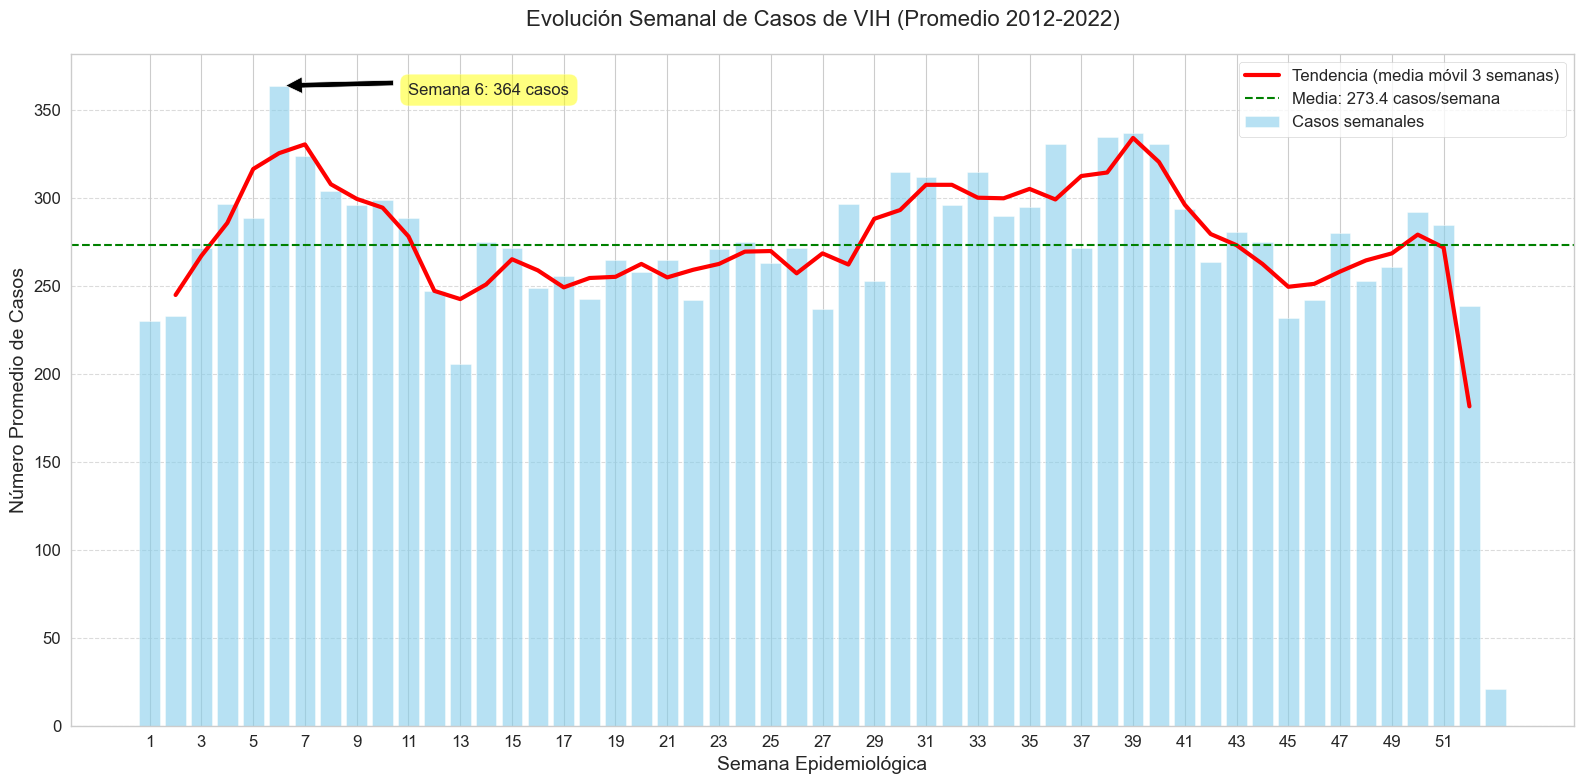

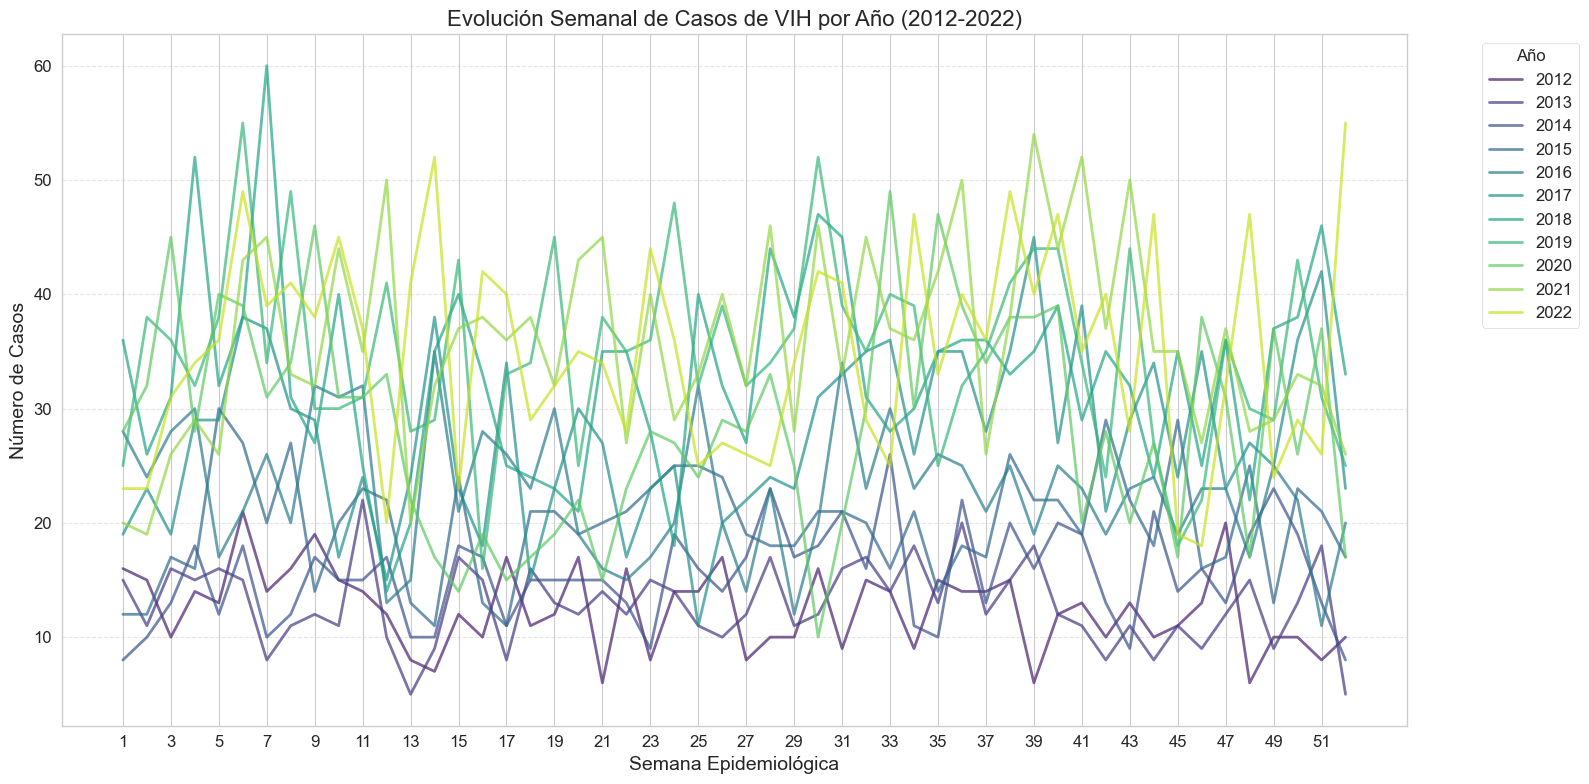

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo 
sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# Gráfico de evolución semanal promedio 

# Agrupar por semana epidemiológica
semanal_evolucion = df.groupby('Semana').size().reset_index(name='Casos')

# Calcular la media móvil para suavizar la línea
semanal_evolucion['Media_Movil'] = semanal_evolucion['Casos'].rolling(window=3, center=True).mean()

# Crear el gráfico
plt.figure(figsize=(16, 8))

# Gráfico de barras para los casos semanales
bars = plt.bar(semanal_evolucion['Semana'], semanal_evolucion['Casos'], 
               color='skyblue', alpha=0.6, label='Casos semanales')

# Línea de tendencia suavizada
line = plt.plot(semanal_evolucion['Semana'], semanal_evolucion['Media_Movil'], 
                color='red', linewidth=3, label='Tendencia (media móvil 3 semanas)')

# Personalización del gráfico
plt.title('Evolución Semanal de Casos de VIH (Promedio 2012-2022)', fontsize=16, pad=20)
plt.xlabel('Semana Epidemiológica', fontsize=14)
plt.ylabel('Número Promedio de Casos', fontsize=14)
plt.xticks(np.arange(1, 53, 2))  # Mostrar semanas pares para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir línea horizontal en la media
mean_cases = semanal_evolucion['Casos'].mean()
plt.axhline(y=mean_cases, color='green', linestyle='--', 
            label=f'Media: {mean_cases:.1f} casos/semana')

# Resaltar semanas con mayor incidencia
max_week = semanal_evolucion.loc[semanal_evolucion['Casos'].idxmax()]
plt.annotate(f'Semana {int(max_week["Semana"])}: {int(max_week["Casos"])} casos',
             xy=(max_week['Semana'], max_week['Casos']),
             xytext=(max_week['Semana']+5, max_week['Casos']-5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.legend()
plt.tight_layout()
plt.show()

# 2. Versión alternativa con todos los años superpuestos

plt.figure(figsize=(16, 8))

# Crear una paleta de colores para los años
years = sorted(df['Año'].unique())
palette = sns.color_palette("viridis", len(years))

for i, year in enumerate(years):
    year_data = df[df['Año'] == year]
    weekly_data = year_data['Semana'].value_counts().sort_index().reset_index()
    weekly_data.columns = ['Semana', 'Casos']
    
    # Rellenar semanas faltantes con 0
    full_weeks = pd.DataFrame({'Semana': range(1, 53)})
    weekly_data = pd.merge(full_weeks, weekly_data, on='Semana', how='left').fillna(0)
    
    plt.plot(weekly_data['Semana'], weekly_data['Casos'], 
             label=str(year), color=palette[i], alpha=0.7, linewidth=2)

# Personalización
plt.title('Evolución Semanal de Casos de VIH por Año (2012-2022)', fontsize=16)
plt.xlabel('Semana Epidemiológica', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks(np.arange(1, 53, 2))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Evolución Mensual 

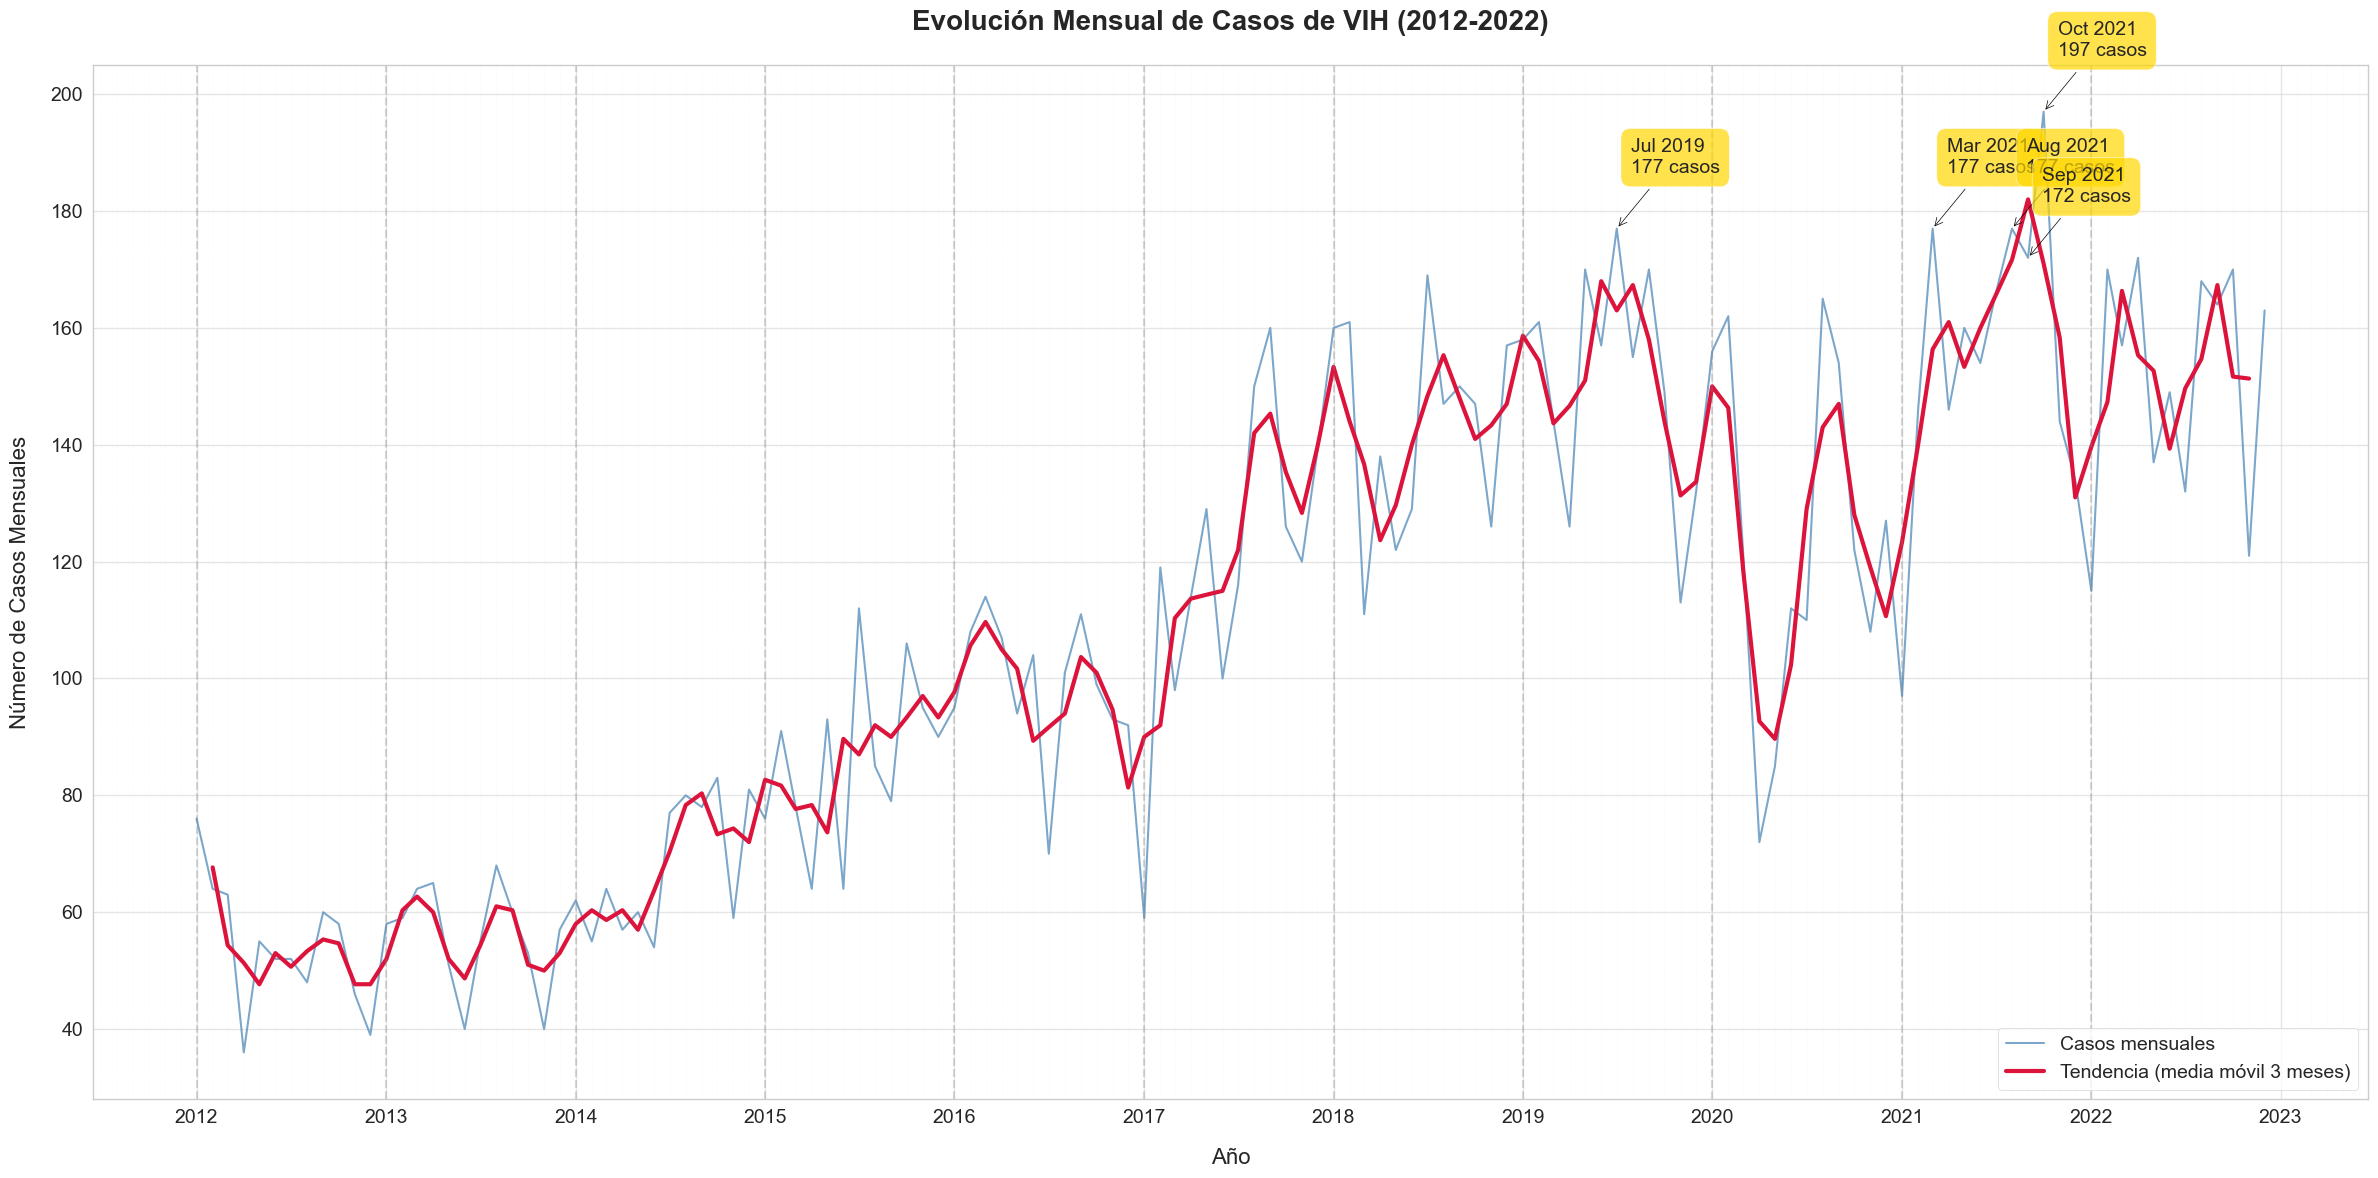

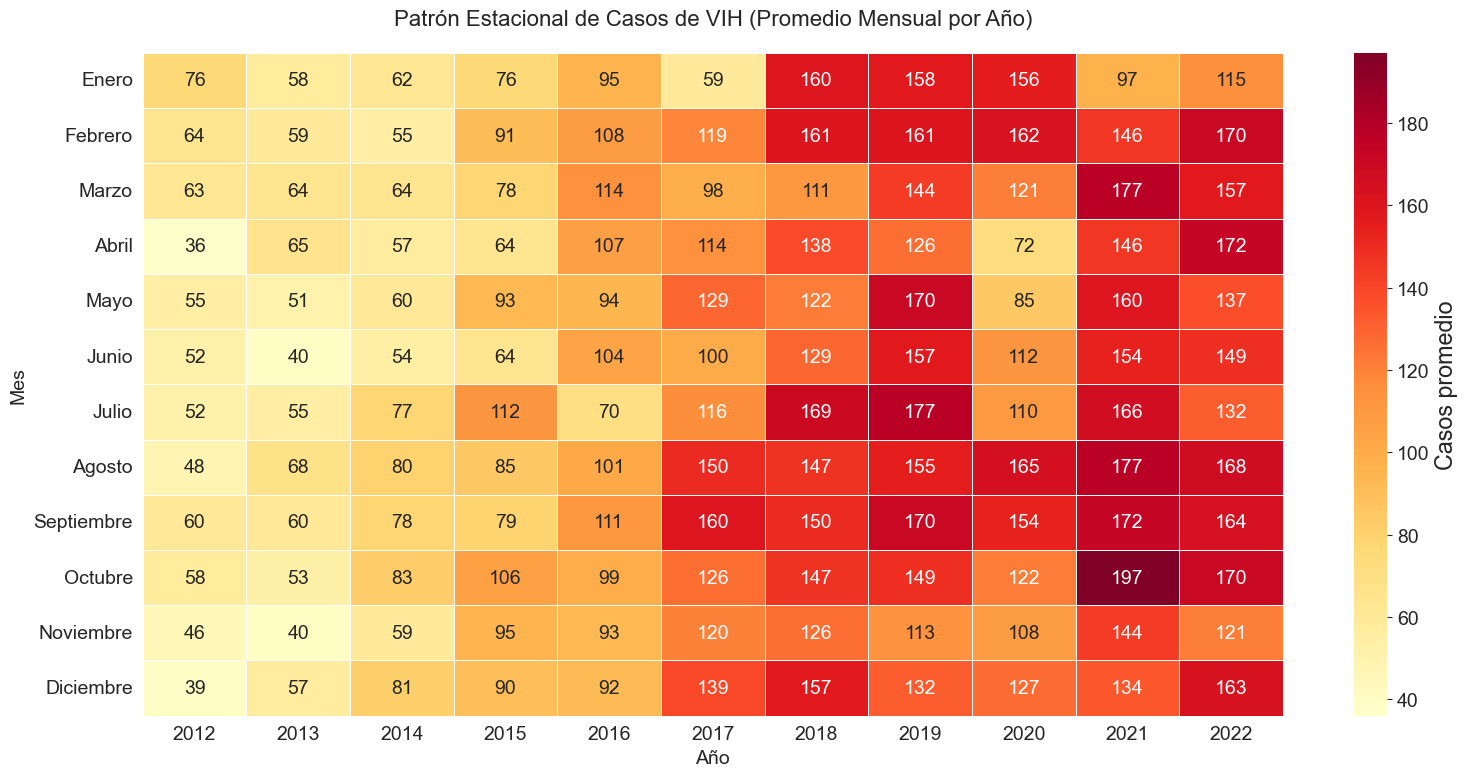

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)
plt.rcParams['font.size'] = 14

# 1. Preparar los datos mensuales
# Convertir a fecha mensual
df['Fecha_Mensual'] = pd.to_datetime(df['Fecha']).dt.to_period('M').dt.to_timestamp()

# Agrupar por mes para obtener conteo de casos
mensual = df.groupby('Fecha_Mensual').size().reset_index(name='Casos')

# Calcular media móvil de 3 meses
mensual['Media_Movil'] = mensual['Casos'].rolling(window=3, center=True).mean()

# 2. Crear figura
plt.figure(figsize=(24, 12))

# Línea principal de casos mensuales
plt.plot(mensual['Fecha_Mensual'], mensual['Casos'], 
         color='steelblue', linewidth=1.5, alpha=0.7, label='Casos mensuales')

# Línea de tendencia suavizada
plt.plot(mensual['Fecha_Mensual'], mensual['Media_Movil'], 
         color='crimson', linewidth=3, label='Tendencia (media móvil 3 meses)')

# 3. Configuración avanzada del gráfico
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.grid(which='major', linestyle='-', linewidth=1, alpha=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.2)

# 4. Personalización
plt.title('Evolución Mensual de Casos de VIH (2012-2022)', 
          fontsize=20, pad=25, weight='bold')
plt.xlabel('Año', fontsize=16, labelpad=15)
plt.ylabel('Número de Casos Mensuales', fontsize=16, labelpad=15)

# Resaltar años y meses
for year in range(2012, 2023):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.3)

# Anotar picos importantes
top_meses = mensual.nlargest(5, 'Casos')
for i, row in top_meses.iterrows():
    plt.annotate(f'{row["Fecha_Mensual"].strftime("%b %Y")}\n{int(row["Casos"])} casos',
                 xy=(row['Fecha_Mensual'], row['Casos']),
                 xytext=(10, 40), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.7))

plt.legend()
plt.tight_layout()
plt.show()

# 5. Análisis estacional - 
meses_orden_completos = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crear tabla de promedio mensual
promedio_mensual = df.groupby(['mes_nombre', 'Año']).size().unstack().T
promedio_mensual = promedio_mensual[meses_orden_completos]

# Gráfico de calor estacional
plt.figure(figsize=(16, 8))
sns.heatmap(promedio_mensual.T, annot=True, fmt=".0f", cmap="YlOrRd", 
            linewidths=0.5, cbar_kws={'label': 'Casos promedio'})
plt.title('Patrón Estacional de Casos de VIH (Promedio Mensual por Año)', 
          fontsize=16, pad=20)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Mes', fontsize=14)
plt.tight_layout()
plt.show()

### Evolución Anual 

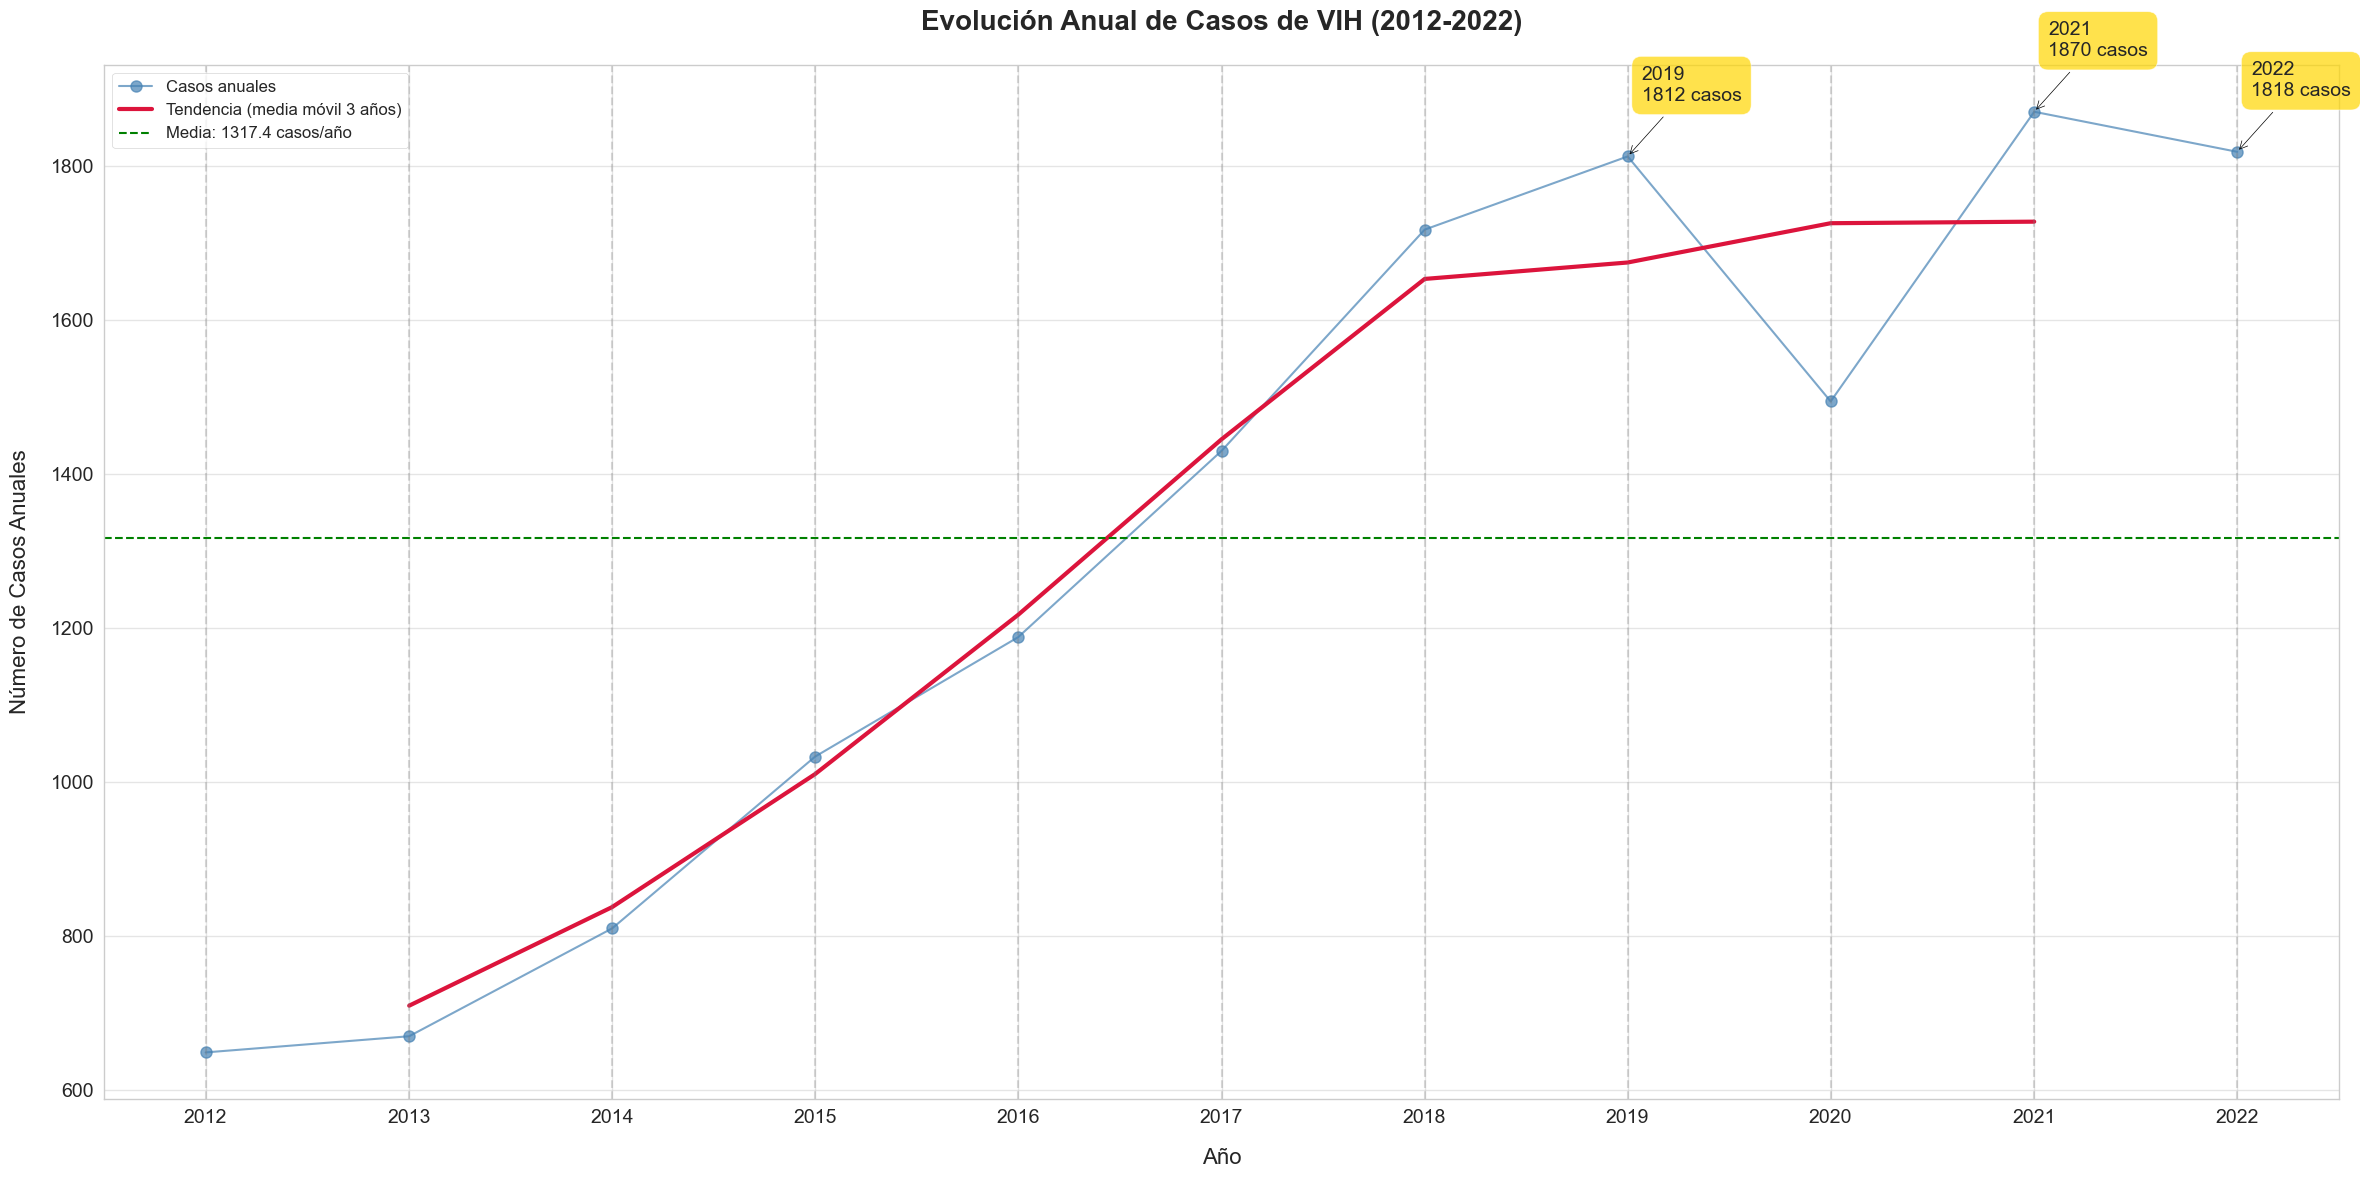

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)
plt.rcParams['font.size'] = 14

# 1. Preparar los datos anuales 
df['Fecha_Anual'] = pd.to_datetime(df['Año'], format='%Y')  # Convertir año a fecha

anual = df.groupby('Año').size().reset_index(name='Casos')
anual['Fecha_Anual'] = pd.to_datetime(anual['Año'], format='%Y')

# Calcular media móvil de 3 años (similar a la media móvil de 3 meses)
anual['Media_Movil'] = anual['Casos'].rolling(window=3, center=True).mean()

# 2. Crear figura (mismo estilo que el gráfico mensual)
plt.figure(figsize=(24, 12))

# Línea principal de casos anuales 
plt.plot(anual['Fecha_Anual'], anual['Casos'], 
         color='steelblue', linewidth=1.5, alpha=0.7, 
         marker='o', markersize=8, label='Casos anuales')


plt.plot(anual['Fecha_Anual'], anual['Media_Movil'], 
         color='crimson', linewidth=3, label='Tendencia (media móvil 3 años)')


ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.grid(which='major', linestyle='-', linewidth=1, alpha=0.5)


plt.title('Evolución Anual de Casos de VIH (2012-2022)', 
          fontsize=20, pad=25, weight='bold')
plt.xlabel('Año', fontsize=16, labelpad=15)
plt.ylabel('Número de Casos Anuales', fontsize=16, labelpad=15)


for year in range(2012, 2023):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.3)


top_anios = anual.nlargest(3, 'Casos')
for i, row in top_anios.iterrows():
    plt.annotate(f'{int(row["Año"])}\n{int(row["Casos"])} casos',
                 xy=(row['Fecha_Anual'], row['Casos']),
                 xytext=(10, 40), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.7))


mean_cases = anual['Casos'].mean()
plt.axhline(y=mean_cases, color='green', linestyle='--', 
            label=f'Media: {mean_cases:.1f} casos/año')


plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


     Año  Casos  Crecimiento
1   2013    670     3.235747
2   2014    810    20.895522
3   2015   1033    27.530864
4   2016   1188    15.004840
5   2017   1430    20.370370
6   2018   1717    20.069930
7   2019   1812     5.532906
8   2020   1494   -17.549669
9   2021   1870    25.167336
10  2022   1818    -2.780749


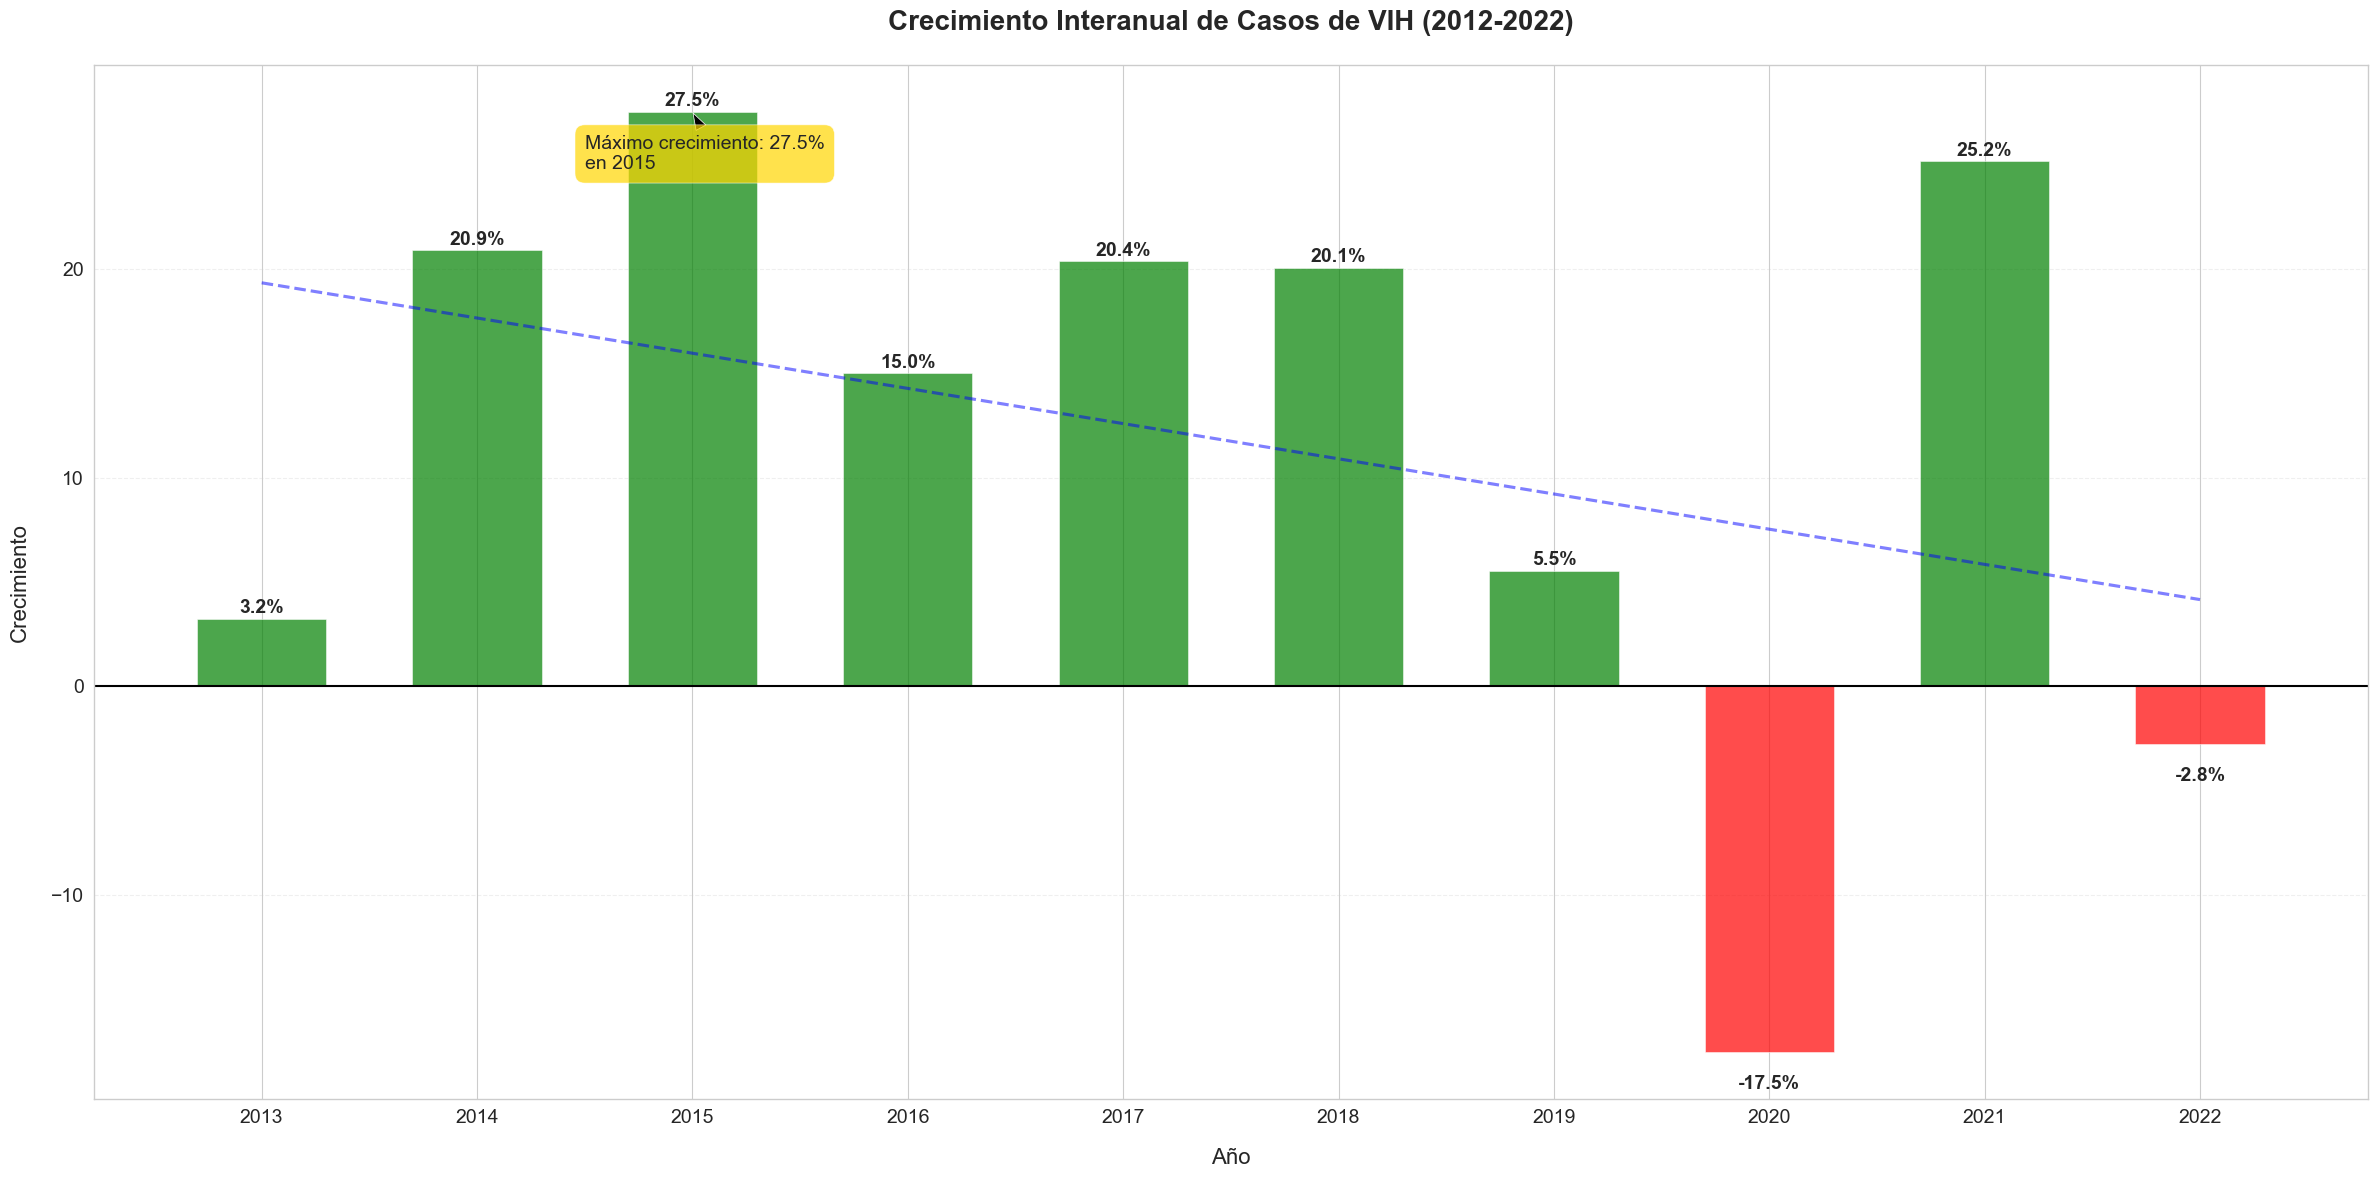

In [135]:
# Calcular el número de casos por año
casos_por_año = df['Año'].value_counts().sort_index().reset_index()
casos_por_año.columns = ['Año', 'Casos']

# Calcular el crecimiento interanual
casos_por_año['Crecimiento'] = casos_por_año['Casos'].pct_change() * 100


anual = casos_por_año.dropna().copy()
anual['Año'] = anual['Año'].astype(int)  # Asegurar que el año sea entero

# Mostrar los datos preparados
print(anual)

plt.figure(figsize=(24, 12))

colors = ['green' if x >=0 else 'red' for x in anual['Crecimiento']]
bars = plt.bar(anual['Año'], anual['Crecimiento'], 
               color=colors, alpha=0.7, width=0.6)


plt.title('Crecimiento Interanual de Casos de VIH (2012-2022)', 
          fontsize=20, pad=25, weight='bold')
plt.xlabel('Año', fontsize=16, labelpad=15)
plt.ylabel('Porcentaje de Cambio', fontsize=16, labelpad=15)
plt.xticks(anual['Año'], rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(0, color='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., 
             height + (0.5 if height >=0 else -1.5),
             f'{height:.1f}%',
             ha='center', va='center', fontsize=14, weight='bold')

# Resaltar el mayor crecimiento
max_crec = anual.loc[anual['Crecimiento'].idxmax()]
plt.annotate(f'Máximo crecimiento: {max_crec["Crecimiento"]:.1f}%\nen {int(max_crec["Año"])}',
             xy=(max_crec['Año'], max_crec['Crecimiento']),
             xytext=(max_crec['Año']-0.5, max_crec['Crecimiento']*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8),
             bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.7),
             fontsize=14)

sns.regplot(x=anual['Año'], y=anual['Crecimiento'], 
            scatter=False, ci=None, 
            line_kws={'color':'blue', 'linestyle':'--', 'alpha':0.5})


plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [147]:



anual = df.groupby('Año').agg({
    'count': 'sum',  # Total de casos
    'Poblacion': 'mean'  # Población promedio (es constante por año)
}).reset_index()
anual.columns = ['Año', 'Casos', 'Poblacion']

# Calcular crecimiento interanual
anual['Crecimiento'] = anual['Casos'].pct_change() * 100
anual['Tasa x 100k'] = (anual['Casos'] / anual['Poblacion']) * 100000

# Encontrar el año con más casos
max_year = anual.loc[anual['Casos'].idxmax()]

# Formatear el DataFrame para impresión
anual_print = anual.copy()
anual_print['Poblacion'] = anual_print['Poblacion'].apply(lambda x: f"{x:,.0f}")
anual_print['Tasa x 100k'] = anual_print['Tasa x 100k'].apply(lambda x: f"{x:.1f}")
anual_print['Crecimiento'] = anual_print['Crecimiento'].apply(lambda x: f"{x:.1f}%" if not pd.isna(x) else "N/A")

print("\n=== RESUMEN ESTADÍSTICO ANUAL ===")
print(anual_print.drop('Poblacion', axis=1).to_string(index=False))

# Análisis de tendencias clave
print("\n=== TENDENCIAS CLAVE ===")
print(f"• Tasa de crecimiento anual promedio: {anual['Crecimiento'].mean():.1f}%")
print(f"• Año con mayor casos absolutos: {int(max_year['Año'])} ({int(max_year['Casos'])} casos)")
print(f"• Tasa más alta por 100k hab.: {anual['Tasa x 100k'].max():.1f} ({int(anual.loc[anual['Tasa x 100k'].idxmax(), 'Año'])})")




=== RESUMEN ESTADÍSTICO ANUAL ===
 Año  Casos Crecimiento Tasa x 100k
2012    649         N/A        29.0
2013    670        3.2%        29.6
2014    810       20.9%        35.3
2015   1033       27.5%        44.5
2016   1188       15.0%        50.5
2017   1430       20.4%        60.0
2018   1717       20.1%        70.7
2019   1812        5.5%        73.0
2020   1494      -17.5%        59.3
2021   1870       25.2%        73.4
2022   1818       -2.8%        70.7

=== TENDENCIAS CLAVE ===
• Tasa de crecimiento anual promedio: 11.7%
• Año con mayor casos absolutos: 2021 (1870 casos)
• Tasa más alta por 100k hab.: 73.4 (2021)


Entre 2012 y 2022, los casos de VIH mostraron un crecimiento constante del 188%, desde 649 hasta 1,870 casos, con una tasa anual promedio del 11.7%, destacando incrementos significativos en 2014-2015 (20.9%-27.5%) y 2021 (25.2%). La pandemia de COVID-19 en 2020 provocó una caída atípica del 17.5%, seguida de un récord en 2021 (tasa de 73.4 por 100k hab.), atribuible a factores como rebote postpandémico, mejor diagnóstico o cambios epidemiológicos. Aunque 2022 registró una leve reducción (-2.8%), los niveles se mantuvieron altos. La duplicación de la tasa por 100k habitantes en la década refleja un aumento real de la incidencia, no solo demográfico, con tendencias que sugieren una posible estabilización reciente, pero aún requieren monitoreo por su implicación en prevalencia, detección y factores de riesgo poblacionales.

## Análisis por Variables

### Gráfico de Casos - Análisis Temporal

C:\Users\natha\AppData\Local\Temp\ipykernel_19804\2981233134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Año', data=df, palette="viridis")


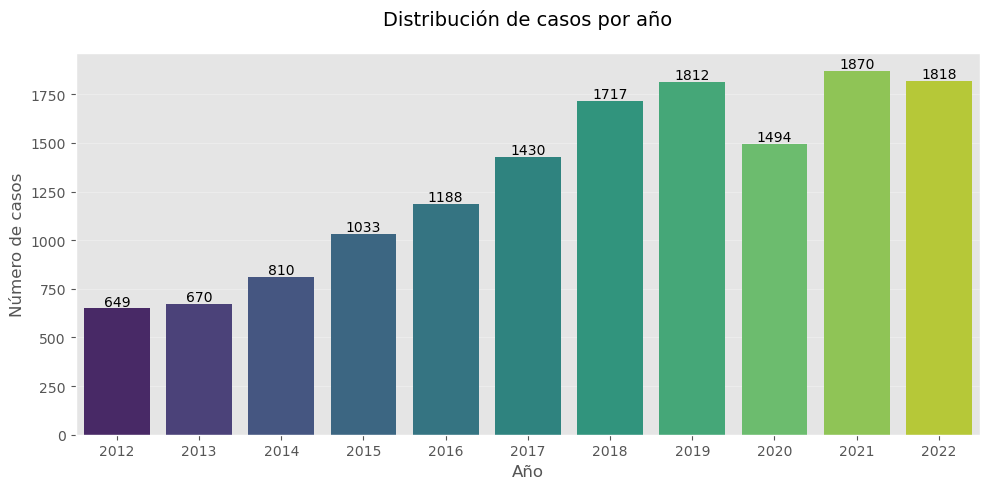

C:\Users\natha\AppData\Local\Temp\ipykernel_19804\2981233134.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='mes_nombre', data=df,


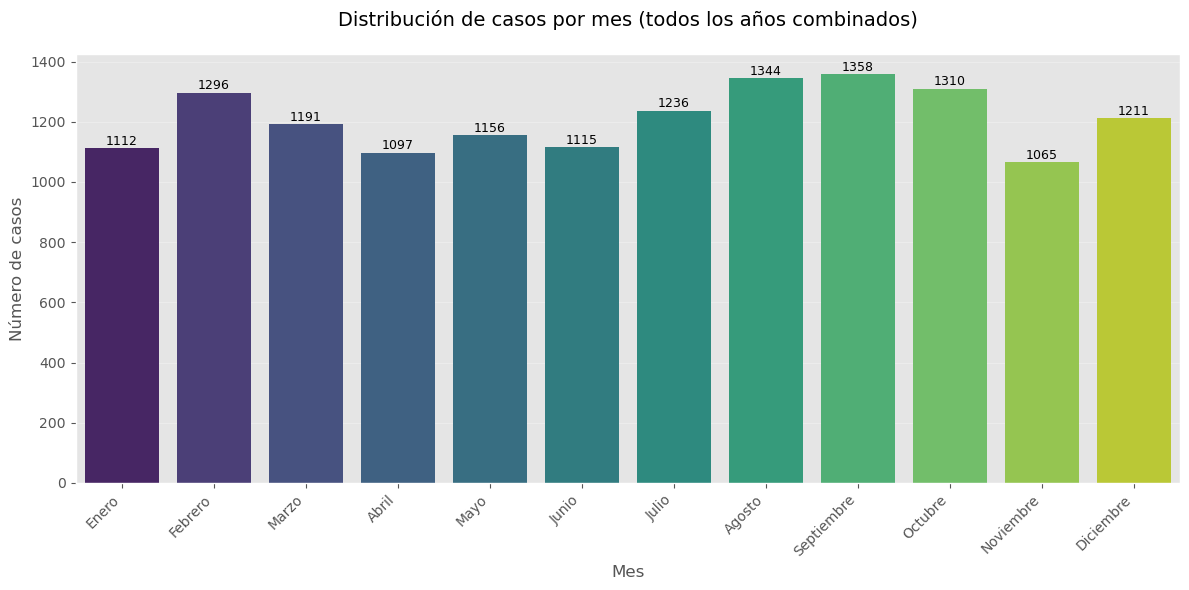

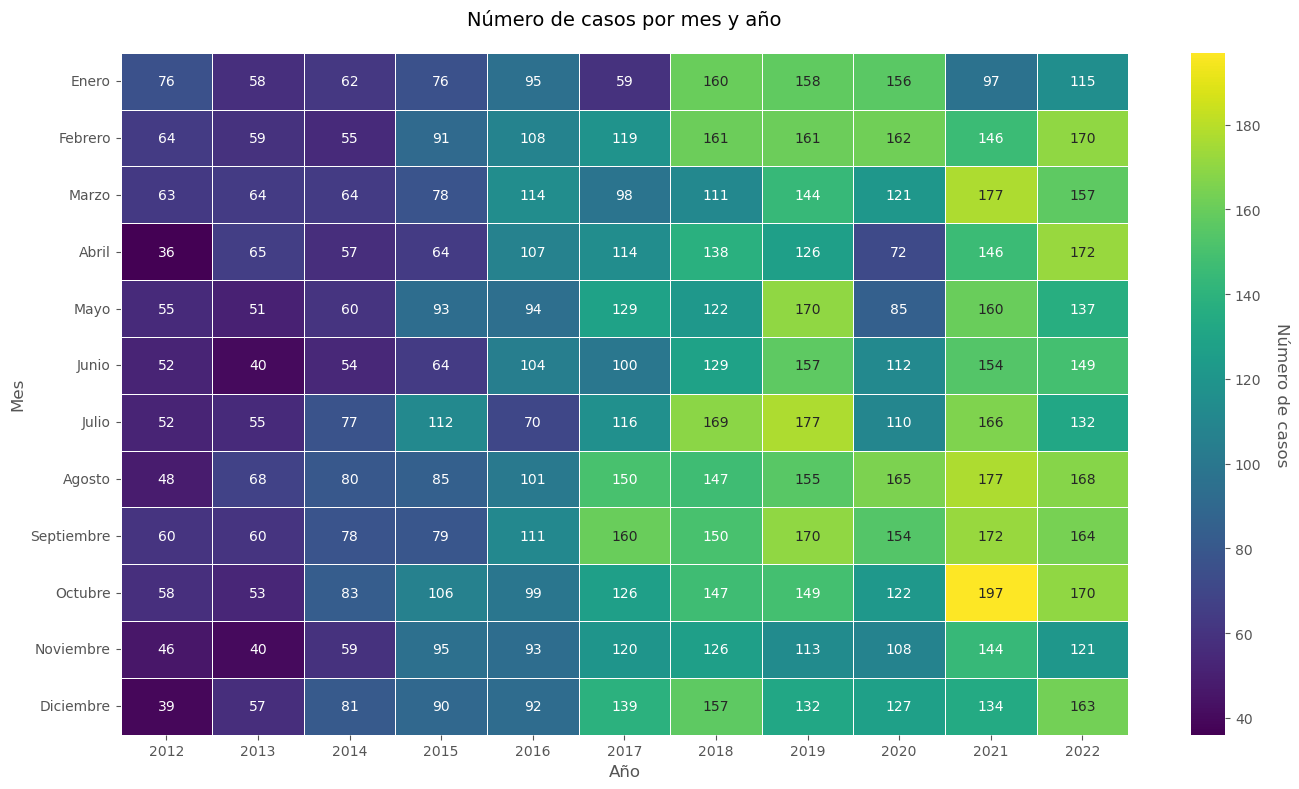

In [87]:
# Configuración de estilo y paleta de colores
plt.style.use('ggplot')
sns.set_palette("viridis")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Año', data=df, palette="viridis")


plt.title('Distribución de casos por año', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)
plt.grid(axis='y', alpha=0.3)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

## 2. Casos por mes (Countplot)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='mes_nombre', data=df, 
                  order=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
                  palette="viridis")

# Personalización
plt.title('Distribución de casos por mes (todos los años combinados)', fontsize=14, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)


for p in ax.patches:
    if p.get_height() > 50:  
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=9)

plt.tight_layout()
plt.show()

## 3. Casos por mes y año (Heatmap)
pivot_table = pd.pivot_table(df, values='Semana', index='mes_nombre', columns='Año', 
                            aggfunc='count', fill_value=0)
pivot_table = pivot_table.reindex(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                  'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

plt.figure(figsize=(14, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt='d', cmap="viridis", 
                 linewidths=0.5, linecolor='white', cbar_kws={'label': 'Número de casos'})

# Personalización
plt.title('Número de casos por mes y año', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Mes', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Mejorar la barra de color
cbar = ax.collections[0].colorbar
cbar.set_label('Número de casos', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

### Análisis Demográfico

### Por SEXO

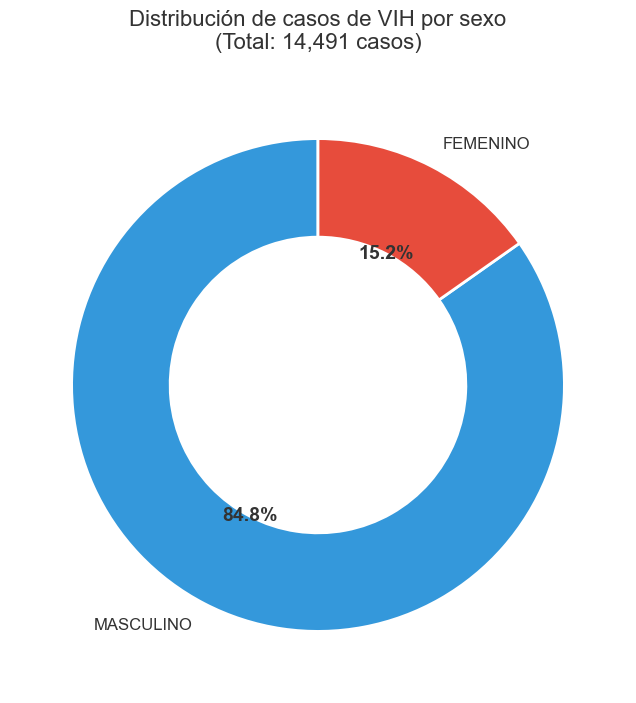

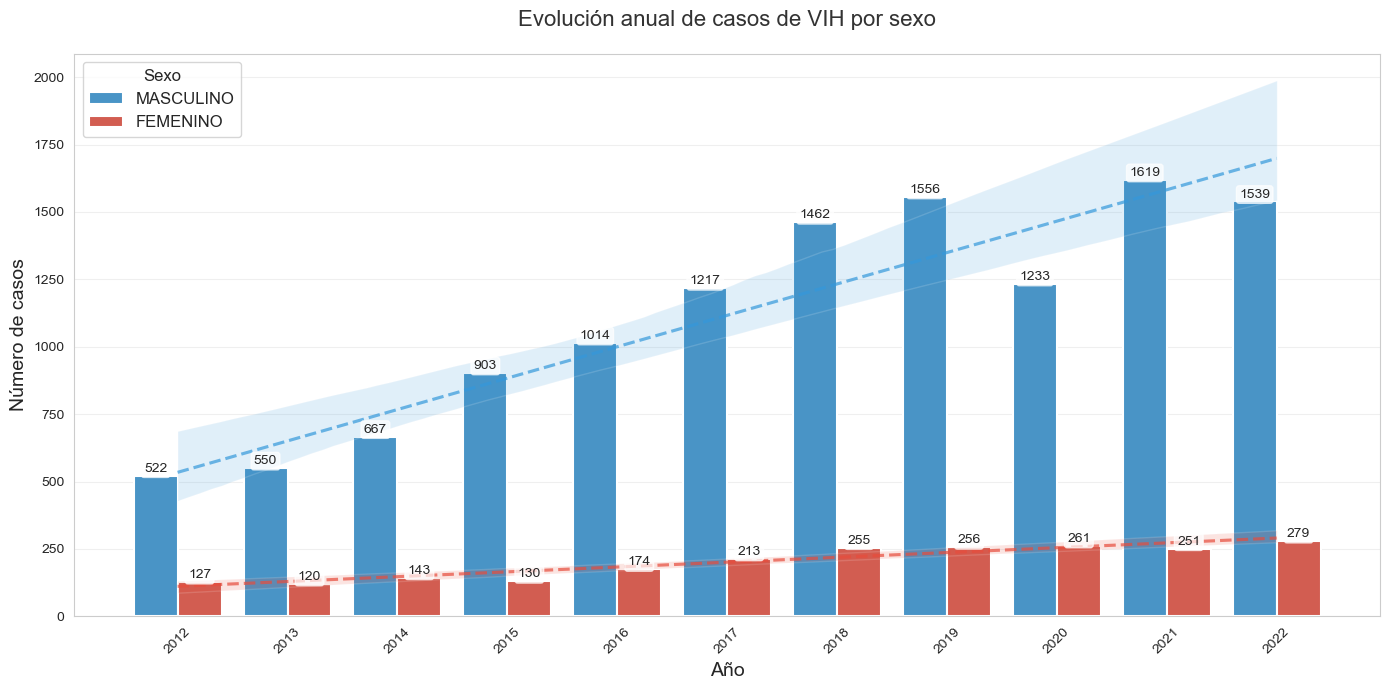


=== ANÁLISIS ESTADÍSTICO POR SEXO ===

Distribución porcentual:
Sexo
MASCULINO    84.756055
FEMENINO     15.243945

Tasa por 100,000 habitantes:
Sexo
MASCULINO    504.089203
FEMENINO      90.663821

Crecimiento porcentual anual por sexo (últimos 5 años):
Sexo   FEMENINO  MASCULINO
Año                       
2018  19.718310  20.131471
2019   0.392157   6.429549
2020   1.953125 -20.758355
2021  -3.831418  31.305758
2022  11.155378  -4.941322

Estadísticas descriptivas por sexo:
           Total casos  Primer año  Último año
Sexo                                          
FEMENINO          2209        2012        2022
MASCULINO        12282        2012        2022


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use('default')  
sns.set_style("whitegrid")
sns.set_palette("viridis")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.family'] = 'Arial'

# 1. Análisis de distribución por sexo
sexo_dist = df['Sexo'].value_counts(normalize=True) * 100
total_casos = len(df)


fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(sexo_dist, 
                                labels=sexo_dist.index,
                                autopct='%1.1f%%',
                                startangle=90,
                                wedgeprops=dict(width=0.4, edgecolor='w', linewidth=2),
                                textprops=dict(color='#333333', fontsize=12),
                                colors=['#3498db', '#e74c3c'])


plt.setp(autotexts, size=14, weight="bold")
ax.set_title('Distribución de casos de VIH por sexo\n(Total: {:,d} casos)'.format(total_casos),
            fontsize=16, pad=20, color='#333333')
centre_circle = plt.Circle((0,0), 0.2, fc='white')
fig.gca().add_artist(centre_circle)


plt.figure(figsize=(14, 7))
ax = sns.countplot(x='Año', hue='Sexo', data=df, 
                 palette=["#3498db", "#e74c3c"],
                 edgecolor='w', linewidth=1.5)


plt.title('Evolución anual de casos de VIH por sexo', 
         fontsize=16, pad=20, color='#333333')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sexo', title_fontsize=12, fontsize=12)


for p in ax.patches:
    if p.get_height() > 50:  # Solo etiquetar barras con más de 50 casos
        ax.annotate(f'{p.get_height():.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points',
                   fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

# Añadir línea de tendencia
for sexo, color in zip(['MASCULINO', 'FEMENINO'], ['#3498db', '#e74c3c']):
    subset = df[df['Sexo'] == sexo]
    yearly = subset.groupby('Año').size()
    sns.regplot(x=np.arange(len(yearly)), y=yearly.values, 
               scatter=False, 
               color=color,
               line_kws={'linestyle':'--', 'alpha':0.7},
               label=f'Tendencia {sexo.lower().capitalize()}')

plt.tight_layout()
plt.show()

# 4. Análisis estadístico completo por sexo
print("\n=== ANÁLISIS ESTADÍSTICO POR SEXO ===")
print(f"\nDistribución porcentual:\n{sexo_dist.to_string()}")

# Cálculo de tasas por sexo
poblacion_promedio = df['Poblacion'].mean()
tasas_sexo = (df['Sexo'].value_counts() / poblacion_promedio) * 100000
print("\nTasa por 100,000 habitantes:")
print(tasas_sexo.to_string())

# Crecimiento anual por sexo
crecimiento_sexo = df.groupby(['Año','Sexo']).size().unstack().pct_change() * 100
print("\nCrecimiento porcentual anual por sexo (últimos 5 años):")
print(crecimiento_sexo.tail(5).to_string())

# Estadísticas descriptivas por sexo
print("\nEstadísticas descriptivas por sexo:")
print(df.groupby('Sexo')['Año'].agg(['count', 'min', 'max']).rename(columns={
    'count': 'Total casos',
    'min': 'Primer año',
    'max': 'Último año'
}))

Los datos revelan una marcada disparidad de género en la incidencia de VIH, con los hombres representando el 84.8% de los casos totales (tasa de 504.1/100k) frente al 15.2% en mujeres (90.7/100k), mostrando una razón de 5.6:1. Esta brecha se acentuó durante la pandemia, con una caída crítica en hombres (-20.8% en 2020 vs. +1.95% en mujeres) seguida de un rebote masculino postpandémico (+31.3% en 2021), mientras que en 2022 se observó un crecimiento femenino (+11.2%) contrastante con la disminución masculina (-4.9%). El volumen acumulado (12,282 casos masculinos vs. 2,209 femeninos en 2012-2022) y las tendencias recientes sugieren: 1) mayor vulnerabilidad masculina asociada a comportamientos de riesgo y acceso tardío al diagnóstico, 2) posibles cambios epidemiológicos en mujeres por mayor concienciación o dinámicas de transmisión, y 3) un impacto diferencial de la pandemia en la detección, donde las restricciones afectaron más la notificación en hombres. Estos hallazgos exigen estrategias diferenciadas de prevención y diagnóstico.

### Por EDAD

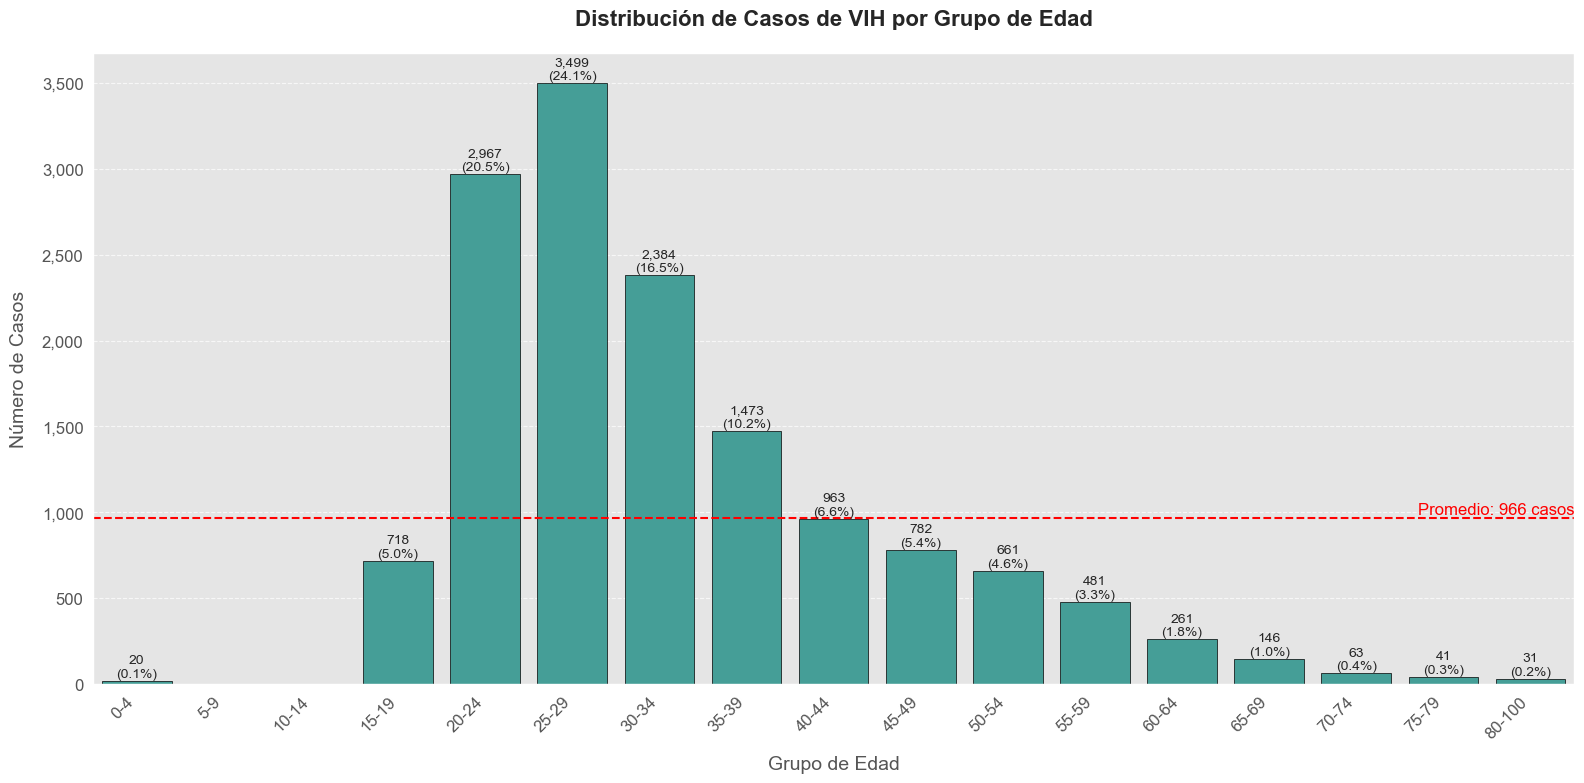

📊 Estadísticas Descriptivas por Grupo de Edad:
             Casos  Porcentaje
count    15.000000   15.000000
mean    966.000000    6.666667
std    1125.074029    7.764486
min      20.000000    0.138026
25%     104.500000    0.721187
50%     661.000000    4.561767
75%    1218.000000    8.405797
max    3499.000000   24.147688

📈 Coeficiente de Variación: 116.47% (Alta dispersión entre grupos)

🔝 Grupo con más casos: 25-29 (3499.0 casos, 24.1%)
🔻 Grupo con menos casos: 0-4 (20.0 casos, 0.1%)

🧑‍🦱 Adultos jóvenes (20-34 años): 8850.0 casos (61.1%)
🧑‍💼 Edad media (35-49 años): 3218.0 casos (22.2%)


<Figure size 1600x800 with 0 Axes>

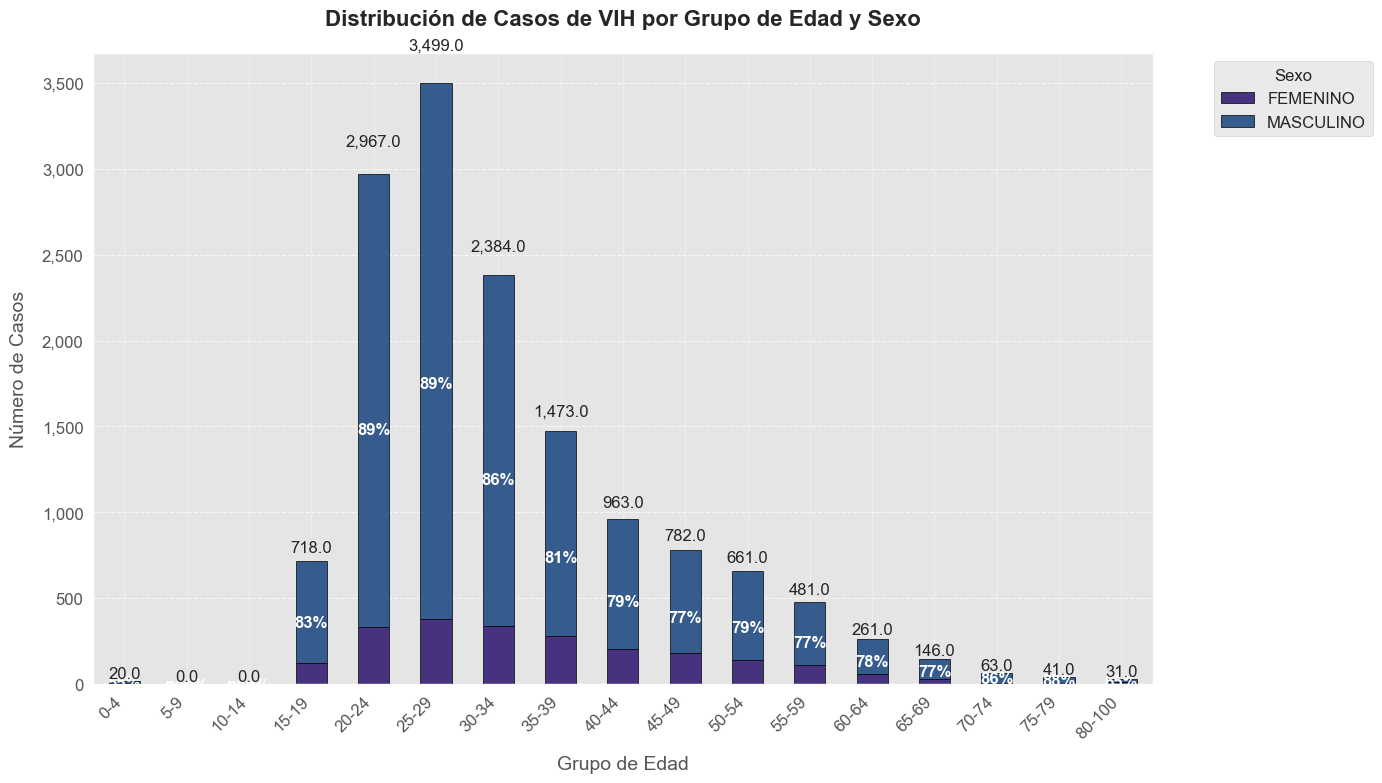

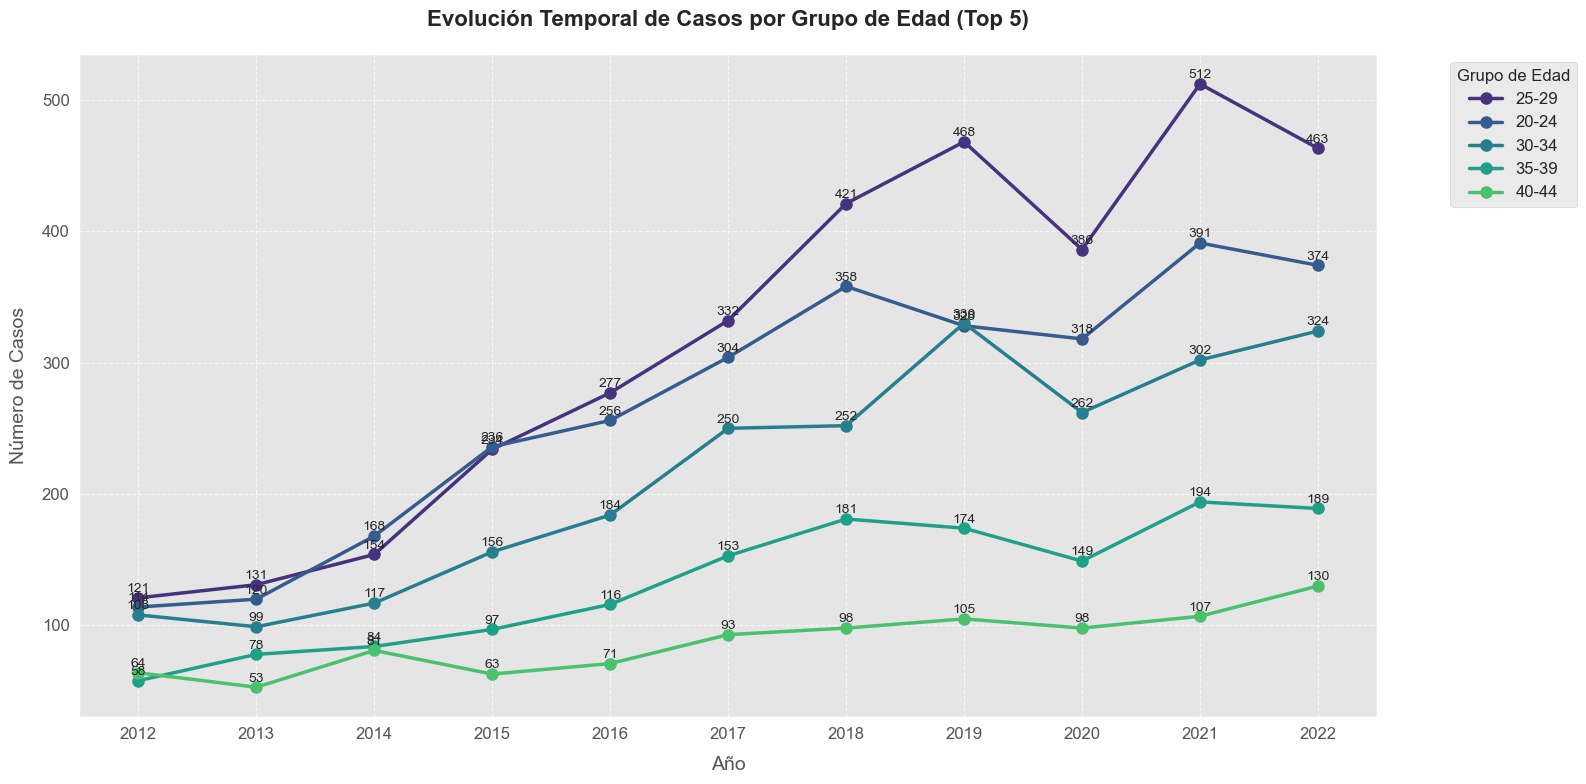

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker


plt.style.use('ggplot')  
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14


age_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', 
             '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', 
             '65-69', '70-74', '75-79', '80-100']

# Crear dataframe ordenado por edad
df_age = df['Grupo Edad'].value_counts().reindex(age_order).reset_index()
df_age.columns = ['Grupo Edad', 'Casos']
df_age['Porcentaje'] = (df_age['Casos'] / df_age['Casos'].sum()) * 100

# =============================================================================
# 2. Visualización Principal: Distribución por Edad
# =============================================================================


plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Grupo Edad', y='Casos', data=df_age, 
                 color=sns.color_palette("husl")[3], 
                 edgecolor='black', linewidth=0.5)

# Personalización del gráfico
plt.title('Distribución de Casos de VIH por Grupo de Edad', pad=20, fontweight='bold')
plt.xlabel('Grupo de Edad', labelpad=10)
plt.ylabel('Número de Casos', labelpad=10)
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}\n({p.get_height()/df_age['Casos'].sum()*100:.1f}%)", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=10)

# Formatear eje Y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Añadir línea de promedio
mean_cases = df_age['Casos'].mean()
plt.axhline(mean_cases, color='red', linestyle='--', linewidth=1.5)
plt.text(len(age_order)-0.5, mean_cases+5, f'Promedio: {mean_cases:,.0f} casos', 
         color='red', ha='right', va='bottom')

# Añadir cuadrícula
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

# =============================================================================
# 3. Análisis Estadístico Descriptivo
# =============================================================================

# Estadísticas descriptivas
print("📊 Estadísticas Descriptivas por Grupo de Edad:")
print(df_age.describe())

# Coeficiente de variación
cv = (df_age['Casos'].std() / df_age['Casos'].mean()) * 100
print(f"\n📈 Coeficiente de Variación: {cv:.2f}% (Alta dispersión entre grupos)")

# Grupos con más y menos casos
max_age = df_age.loc[df_age['Casos'].idxmax()]
min_age = df_age.loc[df_age['Casos'].idxmin()]
print(f"\n🔝 Grupo con más casos: {max_age['Grupo Edad']} ({max_age['Casos']} casos, {max_age['Porcentaje']:.1f}%)")
print(f"🔻 Grupo con menos casos: {min_age['Grupo Edad']} ({min_age['Casos']} casos, {min_age['Porcentaje']:.1f}%)")

# Proporción de grupos clave
young_adults = df_age[df_age['Grupo Edad'].isin(['20-24', '25-29', '30-34'])]['Casos'].sum()
middle_age = df_age[df_age['Grupo Edad'].isin(['35-39', '40-44', '45-49'])]['Casos'].sum()
print(f"\n🧑‍🦱 Adultos jóvenes (20-34 años): {young_adults} casos ({young_adults/df_age['Casos'].sum()*100:.1f}%)")
print(f"🧑‍💼 Edad media (35-49 años): {middle_age} casos ({middle_age/df_age['Casos'].sum()*100:.1f}%)")

# =============================================================================
# 4. Visualización por Edad y Sexo
# =============================================================================

# Preparar datos por edad y sexo
df_age_sex = df.groupby(['Grupo Edad', 'Sexo']).size().unstack().reindex(age_order)
df_age_sex_percent = df_age_sex.div(df_age_sex.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas
plt.figure(figsize=(16, 8))
ax = df_age_sex.plot(kind='bar', stacked=True, edgecolor='black', linewidth=0.5)

# Personalización
plt.title('Distribución de Casos de VIH por Grupo de Edad y Sexo', pad=20, fontweight='bold')
plt.xlabel('Grupo de Edad', labelpad=10)
plt.ylabel('Número de Casos', labelpad=10)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Añadir porcentajes
for i, (index, row) in enumerate(df_age_sex.iterrows()):
    male_pct = df_age_sex_percent.loc[index, 'MASCULINO']
    female_pct = df_age_sex_percent.loc[index, 'FEMENINO']
    total = row.sum()
    
    ax.text(i, total/2, f"{male_pct:.0f}%", ha='center', va='center', color='white', fontweight='bold')
    ax.text(i, total + total*0.05, f"{total:,}", ha='center', va='bottom')

# Leyenda y grid
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# =============================================================================
# 6. Tendencia Temporal por Grupos de Edad
# =============================================================================

# Preparar datos por edad y año
df_age_year = df.groupby(['Año', 'Grupo Edad']).size().unstack().reindex(columns=age_order)

# Gráfico de líneas para tendencia
plt.figure(figsize=(16, 8))


top_groups = df_age_year.sum().nlargest(5).index
df_top = df_age_year[top_groups]

for group in top_groups:
    plt.plot(df_top.index, df_top[group], marker='o', markersize=8, linewidth=2.5, label=group)

# Personalización
plt.title('Evolución Temporal de Casos por Grupo de Edad (Top 5)', pad=20, fontweight='bold')
plt.xlabel('Año', labelpad=10)
plt.ylabel('Número de Casos', labelpad=10)
plt.xticks(df_top.index)

# Añadir valores en puntos
for year in df_top.index:
    for group in top_groups:
        plt.text(year, df_top.loc[year, group] + 2, f"{df_top.loc[year, group]:.0f}", 
                 ha='center', va='bottom', fontsize=10)

# Leyenda y grid
plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



### Por NACIONALIDAD

In [203]:
# Tabla de nacionalidades
nacionalidades = df['Nombre Nacionalidad'].value_counts().reset_index()
nacionalidades.columns = ['Nombre Nacionalidad', 'Cantidad']

#mostrar la tabla
print(nacionalidades)

   Nombre Nacionalidad  Cantidad
0          DESCONOCIDO      7773
1             COLOMBIA      5888
2            VENEZUELA       805
3       ESTADOS UNIDOS         6
4              COMORAS         2
5            ARGENTINA         2
6               MEXICO         2
7                 CUBA         1
8               BRASIL         1
9              POLONIA         1
10            PARAGUAY         1
11              PANAMA         1
12             ECUADOR         1
13              ESPAÑA         1
14         PUERTO RICO         1
15          AFGANISTAN         1
16               MALTA         1
17               CHILE         1
18              BOSNIA         1
19         REINO UNIDO         1


Nacionalidades disponibles: ['COLOMBIA' 'DESCONOCIDO' 'VENEZUELA' 'BOSNIA' 'COMORAS' 'CHILE'
 'ARGENTINA' 'MEXICO' 'MALTA' 'AFGANISTAN' 'ESTADOS UNIDOS' 'ESPAÑA'
 'PUERTO RICO' 'CUBA' 'ECUADOR' 'PANAMA' 'PARAGUAY' 'POLONIA' 'BRASIL'
 'REINO UNIDO']

=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===

                    Casos                                        Año               Grupo Edad Más Frecuente Sexo Más Frecuente Porcentaje
                    count       mean        std min median max   min   max nunique              moda_series        moda_series           
Nombre Nacionalidad                                                                                                                      
COLOMBIA             5888  27.147758  14.859946   1   28.0  53  2012  2022      11                    25-29          MASCULINO      88.0%
VENEZUELA             805  27.885714  13.964930   1   29.0  52  2019  2022       4                    25-29          MASCULINO      12.0%


C:\Users\natha\AppData\Local\Temp\ipykernel_19804\2179170846.py:64: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\natha\AppData\Local\Temp\ipykernel_19804\2179170846.py:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




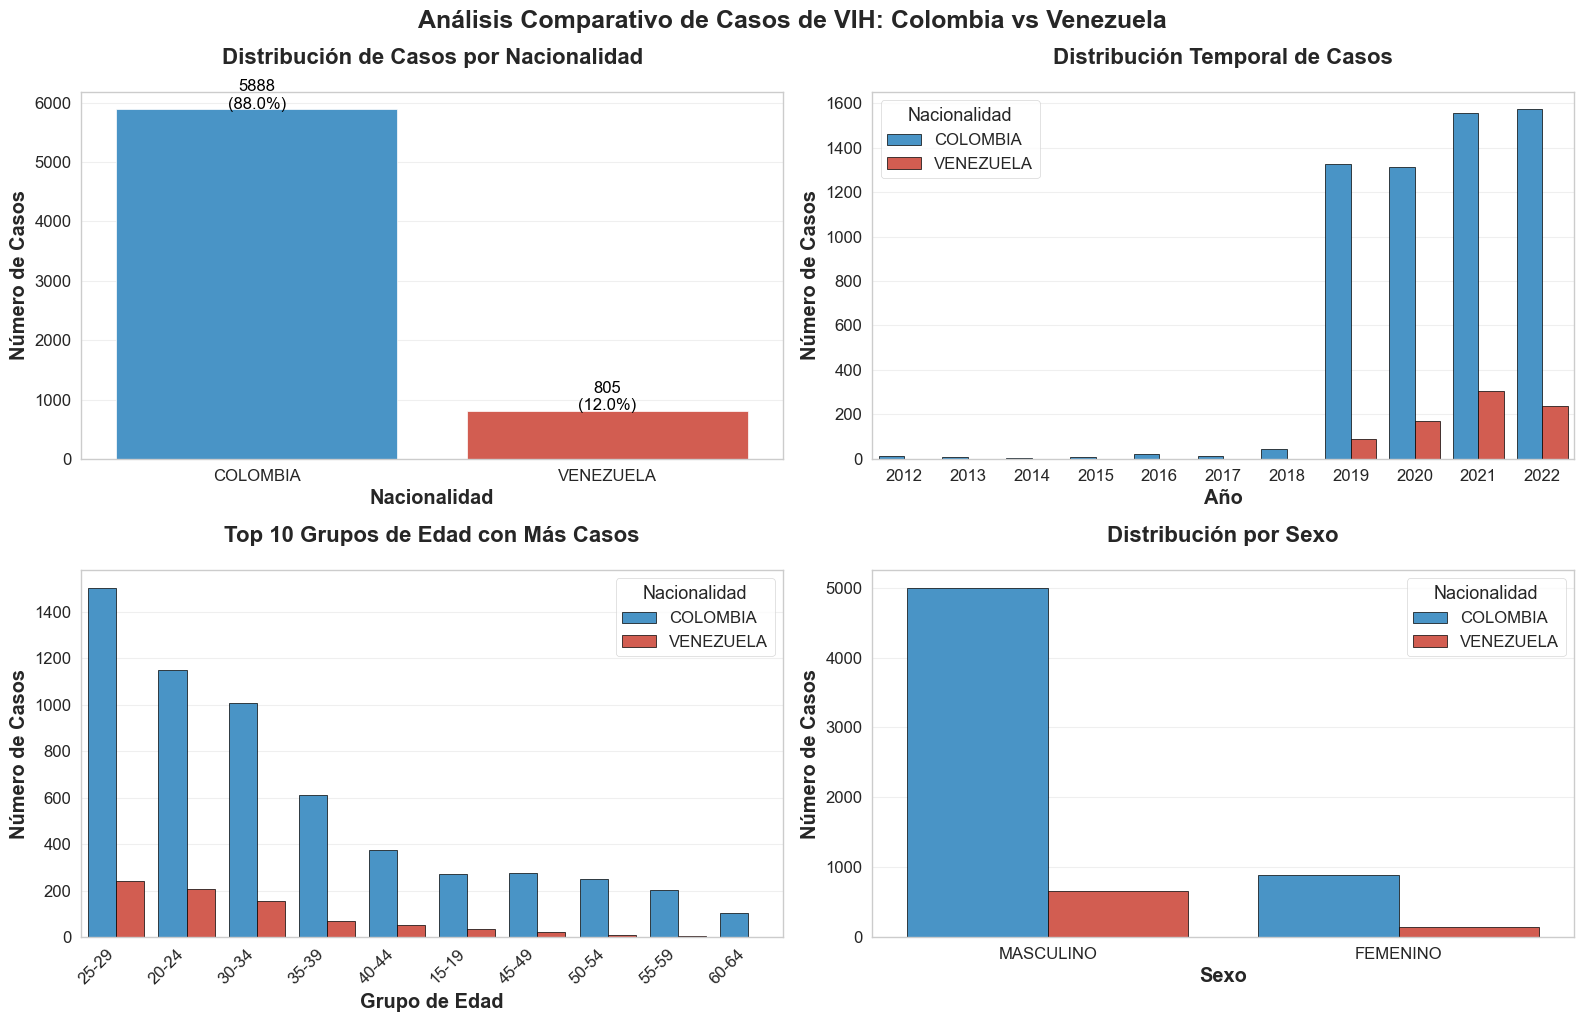

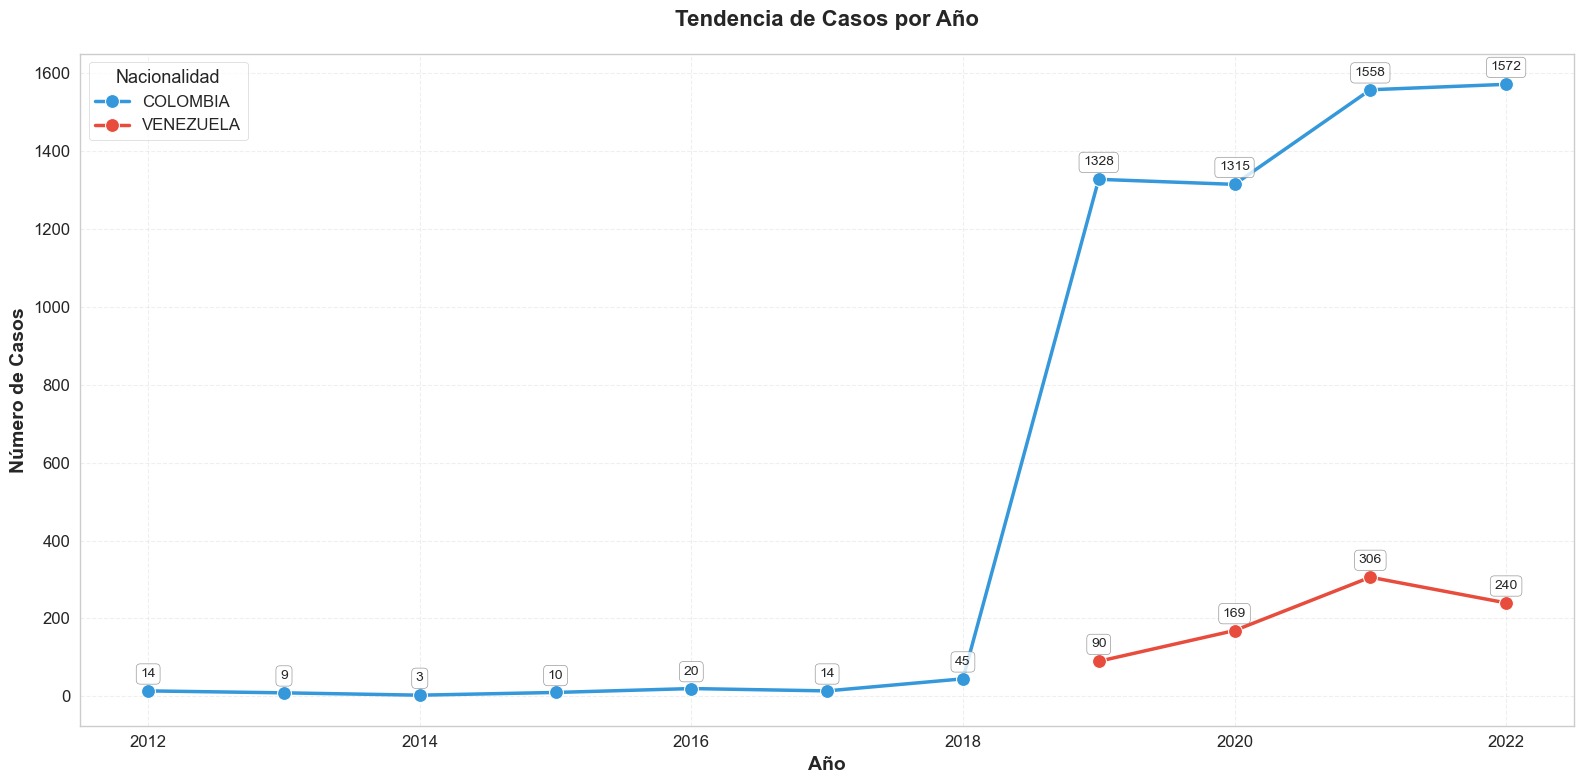

<Figure size 1200x800 with 0 Axes>

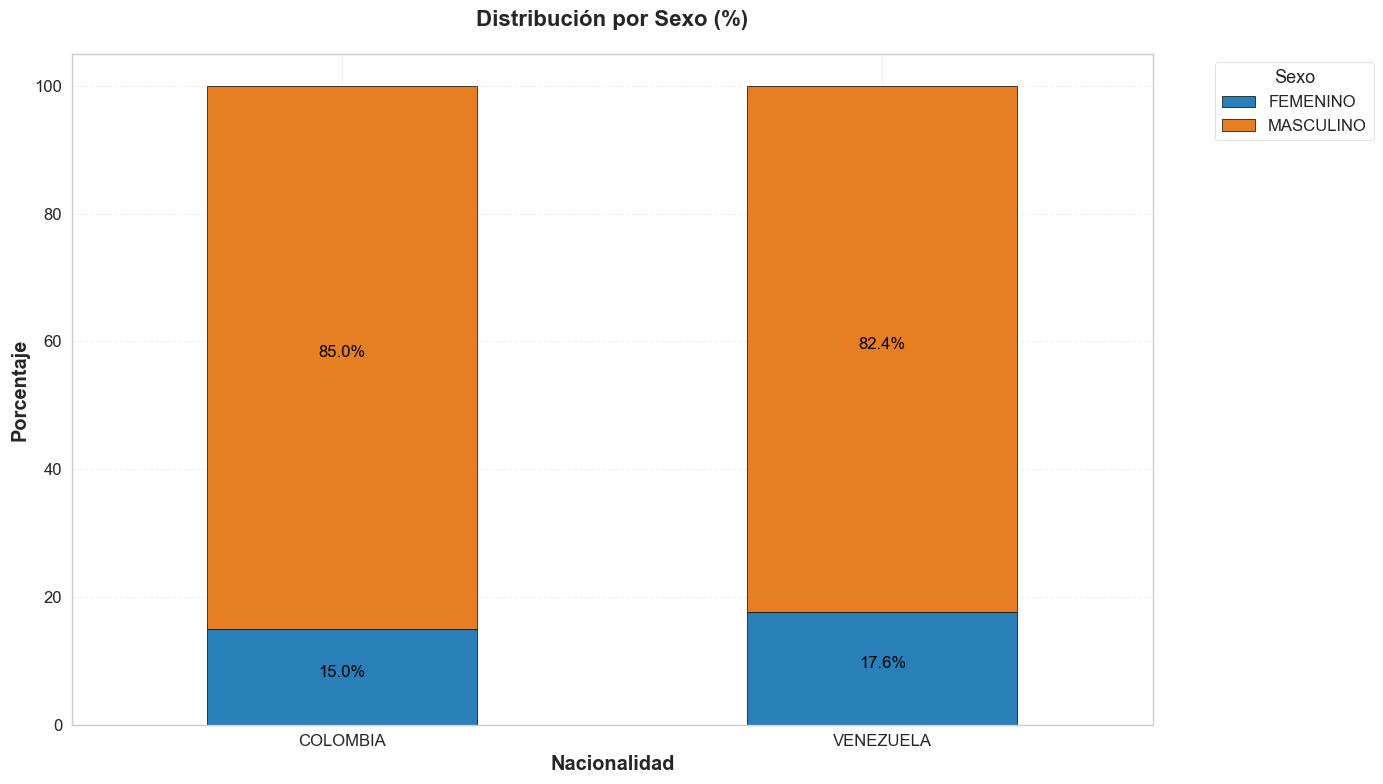

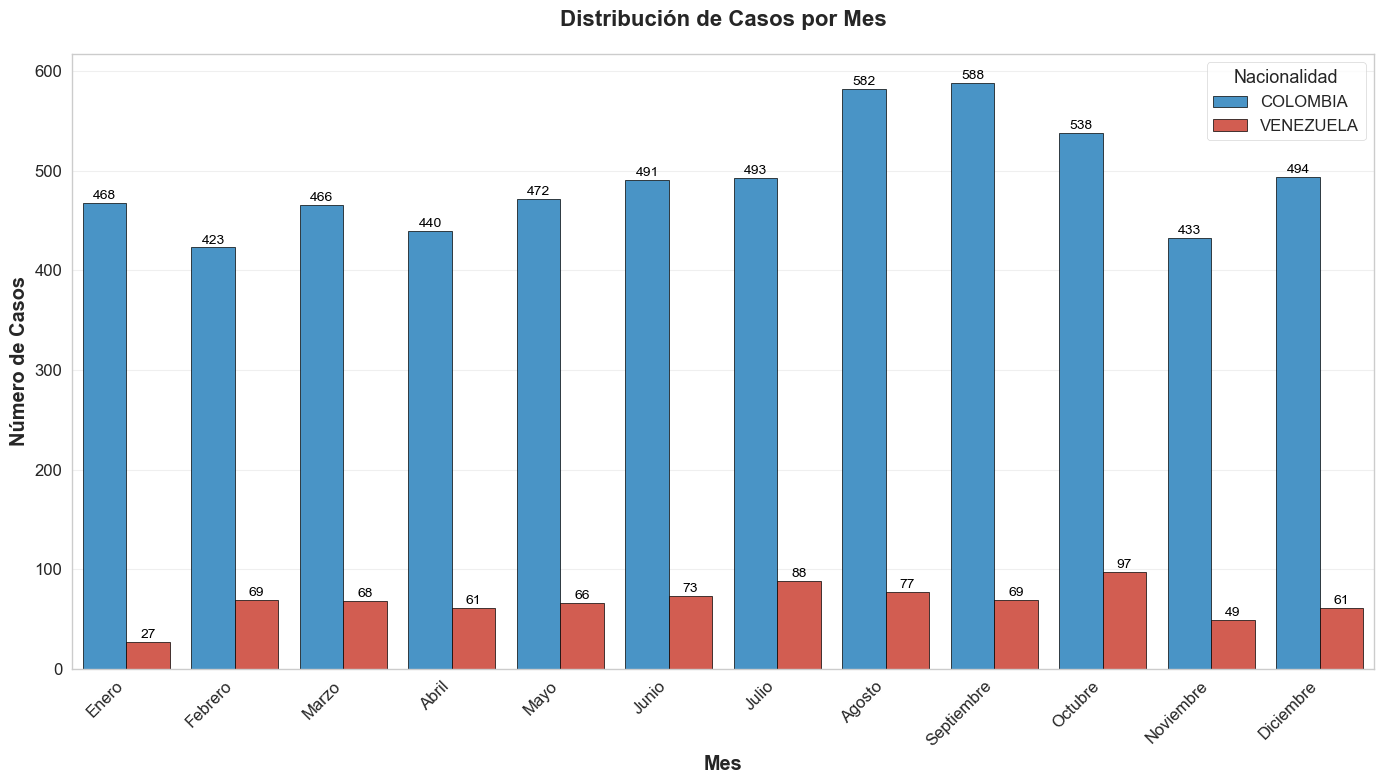

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('ggplot')
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'

# Cargar los datos
df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')

# Filtrar solo Colombia y Venezuela
nacionalidades_disponibles = df['Nombre Nacionalidad'].unique()
print("Nacionalidades disponibles:", nacionalidades_disponibles)

paises_analizar = ['COLOMBIA']
if 'VENEZUELA' in nacionalidades_disponibles:
    paises_analizar.append('VENEZUELA')


df_filtrado = df.loc[df['Nombre Nacionalidad'].isin(paises_analizar)].copy()

## 1. Análisis Estadístico Descriptivo
print("\n=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===\n")

def moda_series(series):
    moda = series.mode()
    return moda[0] if len(moda) > 0 else 'N/A'

# Estadísticas por nacionalidad
stats_df = df_filtrado.groupby('Nombre Nacionalidad').agg({
    'Semana': ['count', 'mean', 'std', 'min', 'median', 'max'],
    'Año': ['min', 'max', 'nunique'],
    'Grupo Edad': moda_series,
    'Sexo': moda_series
}).rename(columns={
    'Semana': 'Casos', 
    'Grupo Edad': 'Grupo Edad Más Frecuente',
    'Sexo': 'Sexo Más Frecuente'
})

total_casos = stats_df[('Casos', 'count')].sum()
stats_df[('Porcentaje', '')] = stats_df[('Casos', 'count')].apply(
    lambda x: f"{(x/total_casos)*100:.1f}%"
)

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(stats_df)



colors = ['#3498db', '#e74c3c']

# Figura 1: Distribución por nacionalidad
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='Nombre Nacionalidad', y='Semana', 
                 data=df_filtrado.groupby('Nombre Nacionalidad')['Semana'].count().reset_index(),
                 palette=colors, estimator=sum, ci=None)
plt.title('Distribución de Casos por Nacionalidad', pad=20, fontweight='bold')
plt.xlabel('Nacionalidad', fontweight='bold')
plt.ylabel('Número de Casos', fontweight='bold')

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}\n({height/total_casos:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')


plt.subplot(2, 2, 2)
ax2 = sns.countplot(x='Año', hue='Nombre Nacionalidad', data=df_filtrado, 
                   palette=colors, edgecolor='black', linewidth=0.5)
plt.title('Distribución Temporal de Casos', pad=20, fontweight='bold')
plt.xlabel('Año', fontweight='bold')
plt.ylabel('Número de Casos', fontweight='bold')
plt.legend(title='Nacionalidad', title_fontsize='13', fontsize='12')


plt.subplot(2, 2, 3)
top_edades = df_filtrado['Grupo Edad'].value_counts().nlargest(10).index
df_top = df_filtrado[df_filtrado['Grupo Edad'].isin(top_edades)].copy()  # Usar copy() aquí también
ax3 = sns.countplot(x='Grupo Edad', hue='Nombre Nacionalidad', data=df_top, 
                   palette=colors, order=top_edades, edgecolor='black', linewidth=0.5)
plt.title('Top 10 Grupos de Edad con Más Casos', pad=20, fontweight='bold')
plt.xlabel('Grupo de Edad', fontweight='bold')
plt.ylabel('Número de Casos', fontweight='bold')
plt.legend(title='Nacionalidad', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45, ha='right')


plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Sexo', hue='Nombre Nacionalidad', data=df_filtrado, 
                   palette=colors, edgecolor='black', linewidth=0.5)
plt.title('Distribución por Sexo', pad=20, fontweight='bold')
plt.xlabel('Sexo', fontweight='bold')
plt.ylabel('Número de Casos', fontweight='bold')
plt.legend(title='Nacionalidad', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.suptitle('Análisis Comparativo de Casos de VIH: Colombia vs Venezuela' if len(paises_analizar) == 2 
             else 'Análisis de Casos de VIH en Colombia', 
             y=1.02, fontsize=18, fontweight='bold')
plt.show()


## 4. Tendencia Temporal 

plt.figure(figsize=(16, 8))
df_tendencia = df_filtrado.groupby(['Año', 'Nombre Nacionalidad']).size().reset_index(name='Casos')
ax = sns.lineplot(x='Año', y='Casos', hue='Nombre Nacionalidad', 
                  data=df_tendencia,
                  palette=colors, marker='o', linewidth=2.5, markersize=10, 
                  style='Nombre Nacionalidad', dashes=False)

plt.title('Tendencia de Casos por Año', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14, fontweight='bold')
plt.ylabel('Número de Casos', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Nacionalidad', title_fontsize='13', fontsize='12')

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=10, 
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=0.5, alpha=0.8))

plt.tight_layout()
plt.show()

## 5. Proporciones por Sexo

plt.figure(figsize=(12, 8))
contingency_table = pd.crosstab(df_filtrado['Nombre Nacionalidad'], df_filtrado['Sexo'])
contingency_table_perc = contingency_table.div(contingency_table.sum(1), axis=0) * 100

contingency_table_perc.plot(kind='bar', stacked=True, color=['#2980b9', '#e67e22'], 
                           edgecolor='black', linewidth=0.5)
plt.title('Distribución por Sexo (%)', pad=20, fontweight='bold')
plt.xlabel('Nacionalidad', fontweight='bold')
plt.ylabel('Porcentaje', fontweight='bold')
plt.legend(title='Sexo', title_fontsize='13', fontsize='12', 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for n, x in enumerate([*contingency_table_perc.index.values]):
    for (proportion, y_loc) in zip(contingency_table_perc.loc[x],
                                  contingency_table_perc.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                s=f'{proportion:.1f}%', color='black', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

## 6. Distribución por Meses

plt.figure(figsize=(14, 8))
order_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax = sns.countplot(x='mes_nombre', hue='Nombre Nacionalidad', data=df_filtrado, 
                  palette=colors, order=order_meses, edgecolor='black', linewidth=0.5)
plt.title('Distribución de Casos por Mes', pad=20, fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Número de Casos', fontweight='bold')
plt.legend(title='Nacionalidad', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=10, color='black',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



El estudio muestra que Colombia concentra el 88% de los casos (5,888) frente al 12% de Venezuela (805), con una proporción 9:1. Aunque el volumen difiere significativamente, ambos países comparten patrones epidemiológicos similares: mayor incidencia en hombres jóvenes (25-29 años) y distribución semanal comparable (medias de 27.1 vs 27.9 semanas). Colombia presenta mayor variabilidad en los reportes (std 14.9 vs 14.0) y cuenta con datos desde 2012 (11 años), mientras Venezuela solo desde 2019 (4 años), lo que sugiere diferencias en cobertura temporal y posible subregistro en población migrante venezolana. Estas similitudes demográficas contrastan con las marcadas diferencias en volumen de casos y profundidad histórica de los registros.



### Por ESTRATO

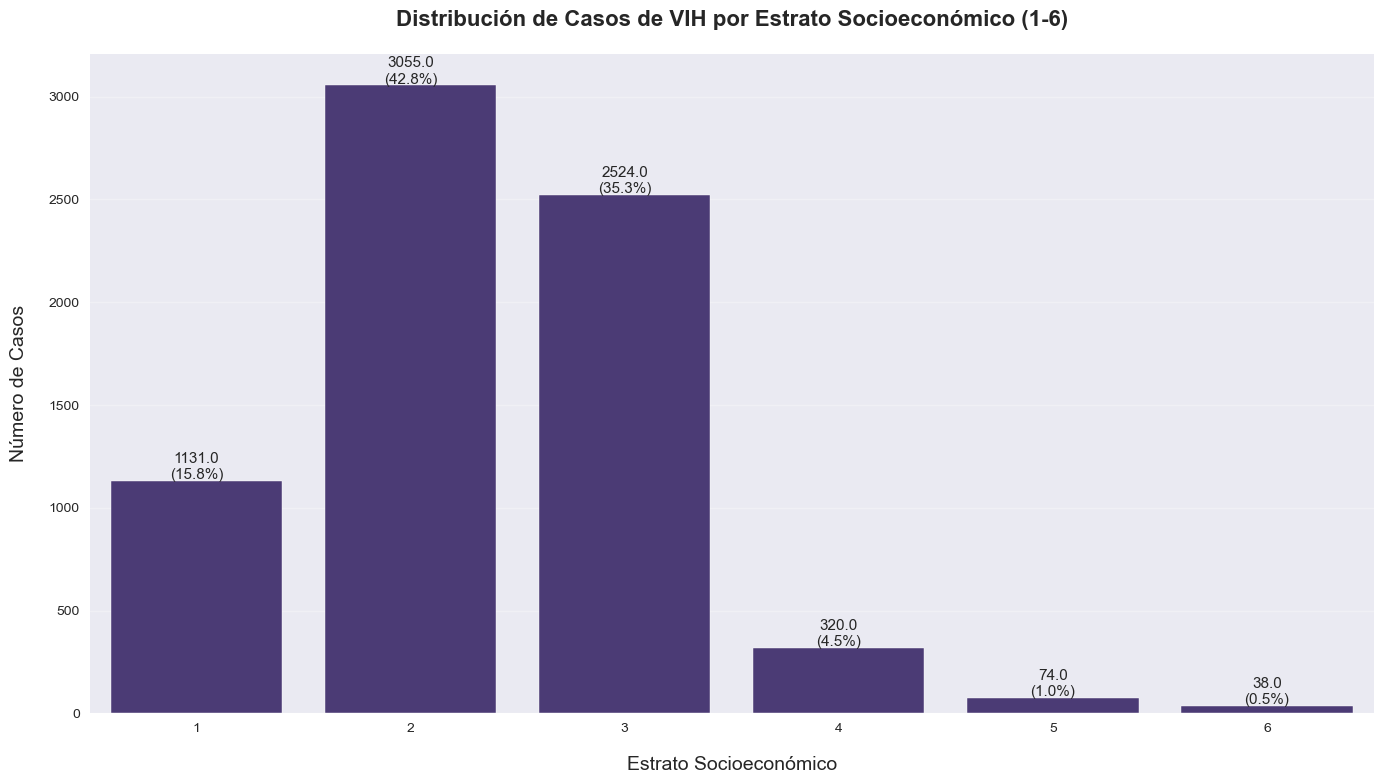

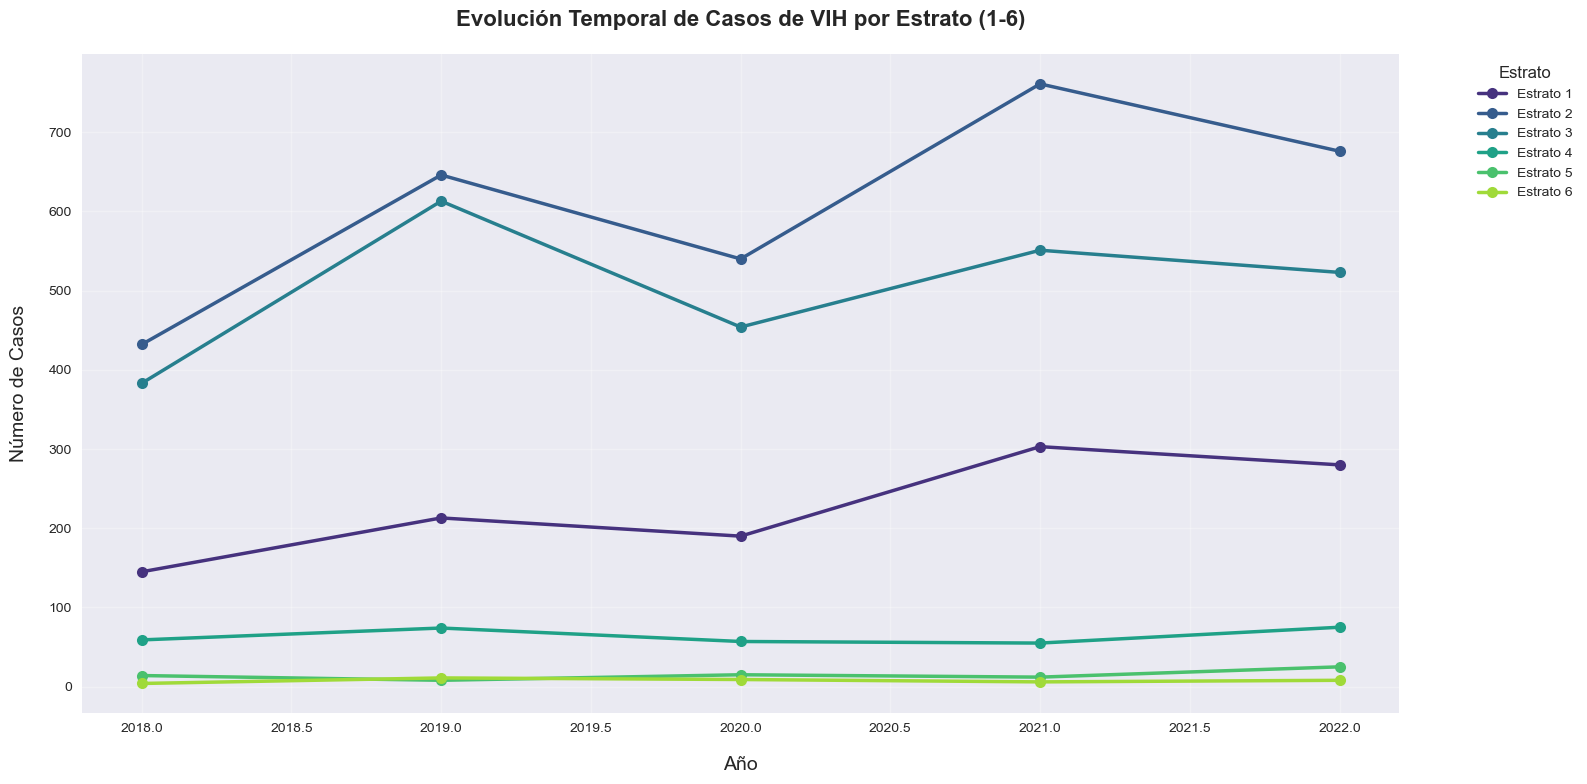

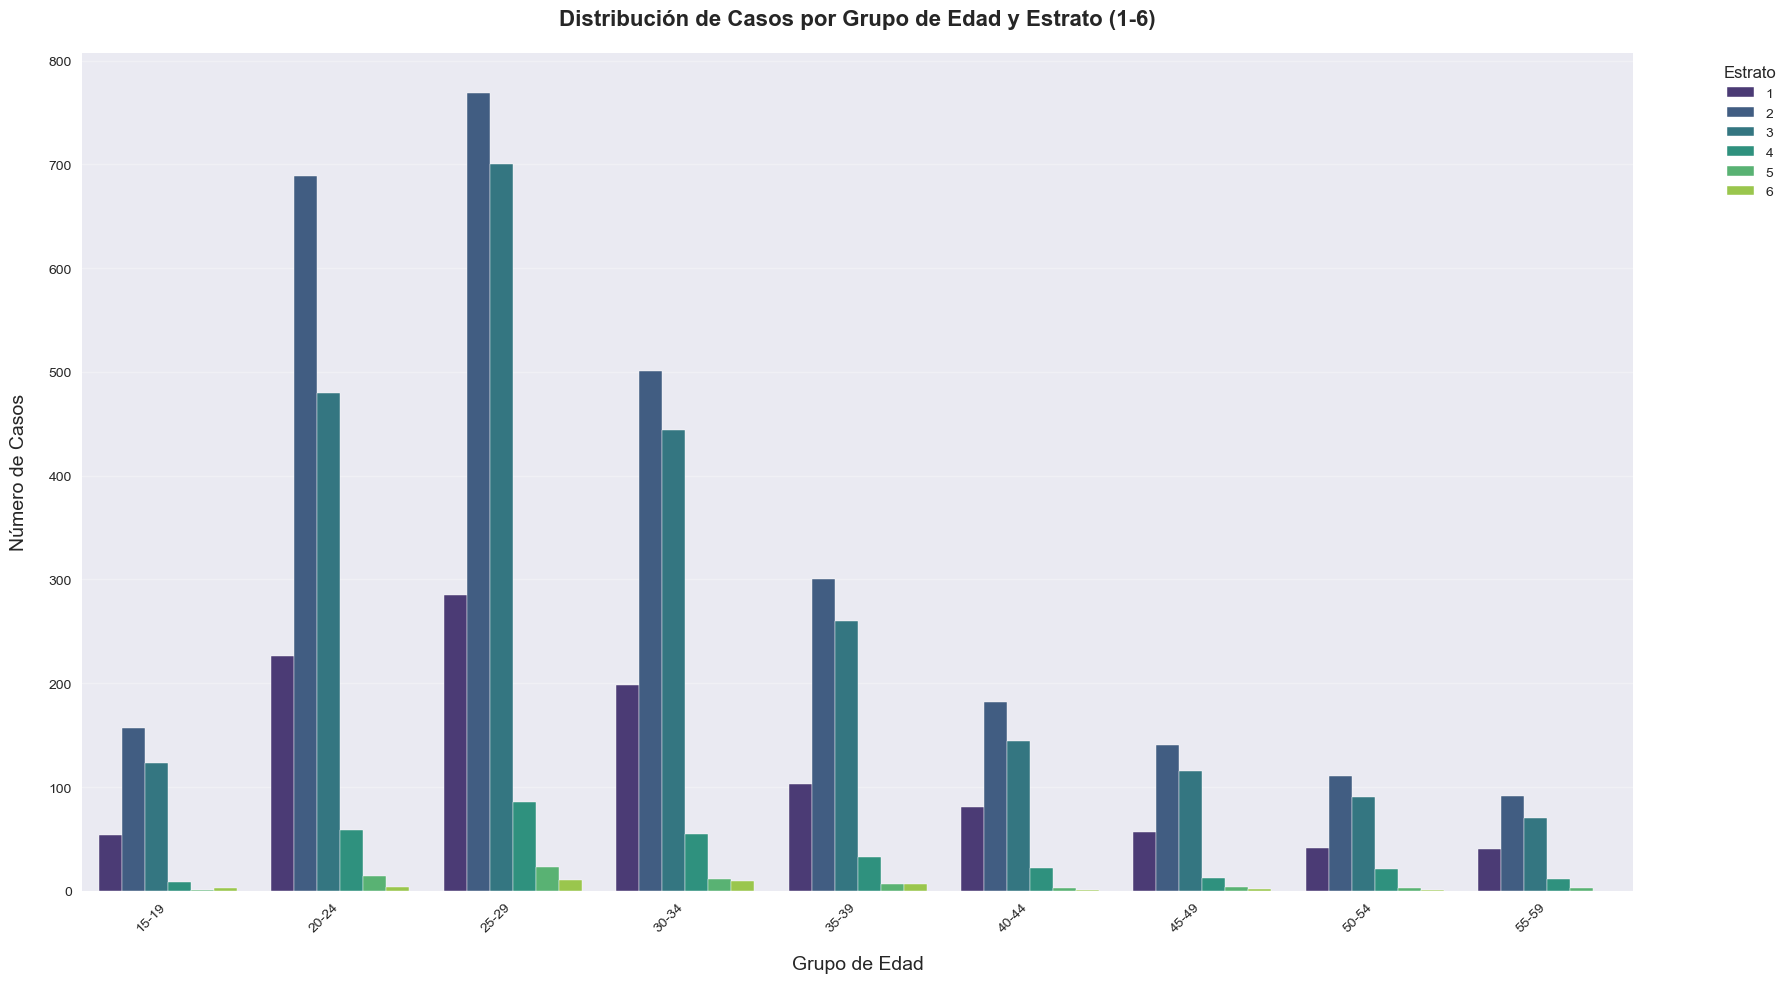

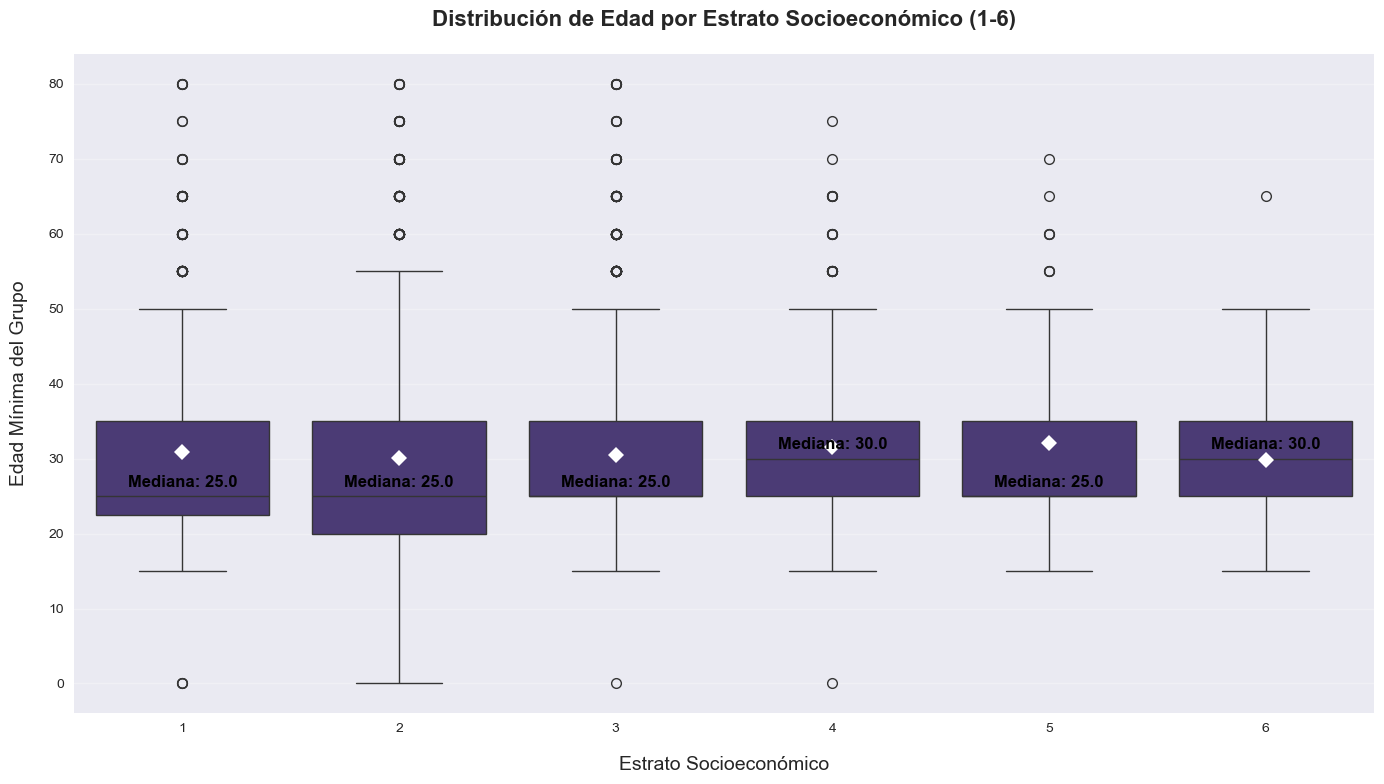


      ANÁLISIS ESTADÍSTICO POR ESTRATO (1-6)      

1. DISTRIBUCIÓN DE CASOS POR ESTRATO:
         Número de Casos  Porcentaje (%)
Estrato                                 
1                   1131            15.8
2                   3055            42.8
3                   2524            35.3
4                    320             4.5
5                     74             1.0
6                     38             0.5

2. ESTADÍSTICAS DE EDAD POR ESTRATO:
          count  mean   std   min   25%   50%   75%   max
Estrato                                                  
1        1131.0  30.8  12.0   0.0  22.5  25.0  35.0  80.0
2        3055.0  30.1  11.8   0.0  20.0  25.0  35.0  80.0
3        2524.0  30.5  11.6   0.0  25.0  25.0  35.0  80.0
4         320.0  31.6  11.9   0.0  25.0  30.0  35.0  75.0
5          74.0  32.1  12.7  15.0  25.0  25.0  35.0  70.0
6          38.0  29.9  10.0  15.0  25.0  30.0  35.0  65.0

3. TEST DE CHI-CUADRADO ENTRE ESTRATO Y SEXO:

Tabla de contingencia:
Sexo    

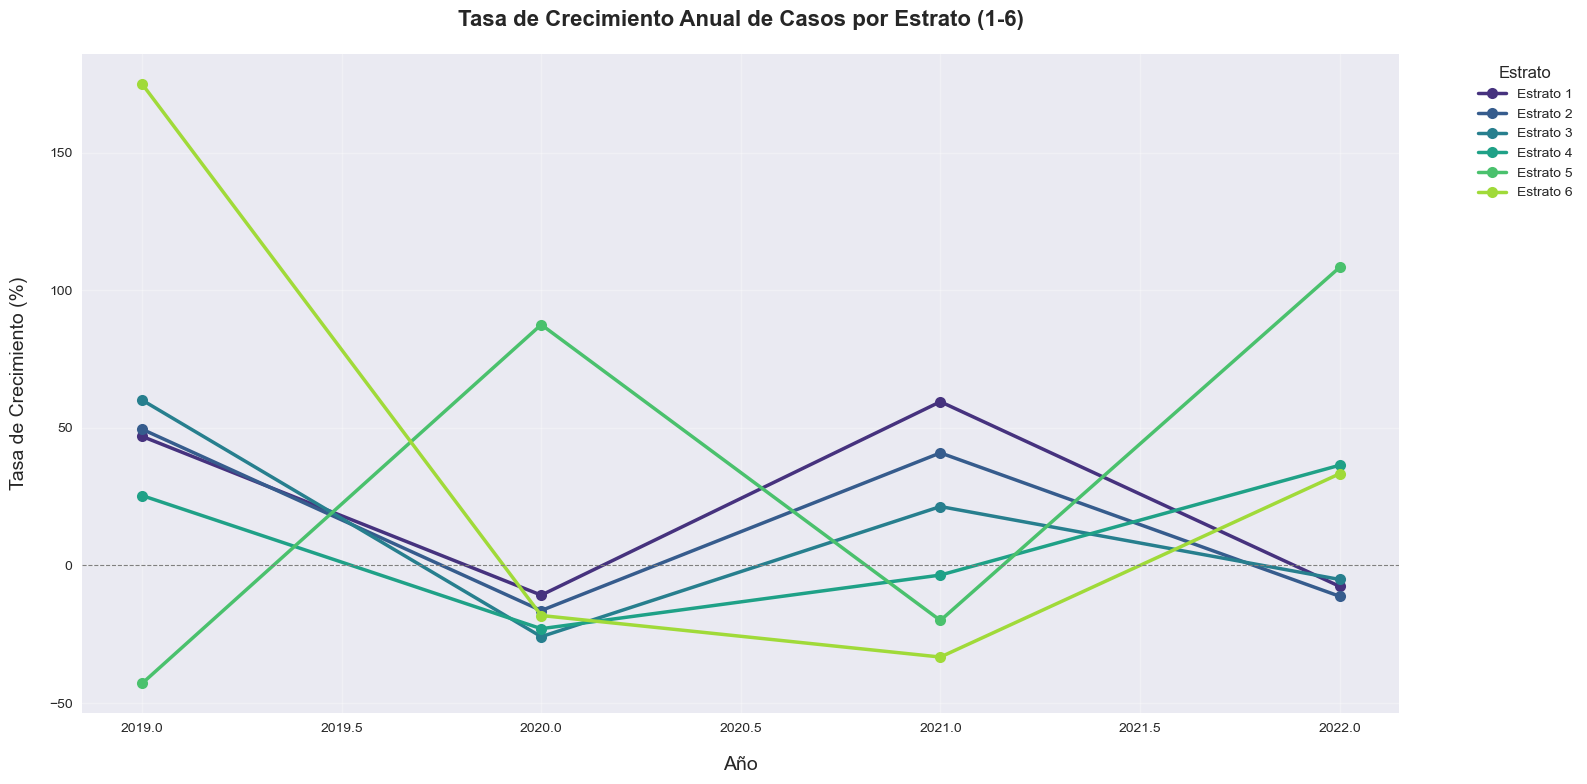

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8') 
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
sns.set_palette("viridis")  


file_path = 'DATASET_VIH_LIMPIO_20250508_1728.xlsx'
df = pd.read_excel(file_path, sheet_name='Datos VIH')

# Limpieza y preparación de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month_name()
df['count'] = 1  

# Filtrar solo estratos del 1 al 6 (asumiendo que están como números o strings)
df['Estrato'] = df['Estrato'].astype(str)  # Convertir a string para manejar mejor los datos
estratos_validos = ['1', '2', '3', '4', '5', '6']
df = df[df['Estrato'].isin(estratos_validos)].copy()

# Función para extraer la edad mínima del grupo de edad
def extract_min_age(age_group):
    if isinstance(age_group, str):
        return int(age_group.split('-')[0])
    return np.nan

df['Edad_min'] = df['Grupo Edad'].apply(extract_min_age)


plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Estrato', data=df, order=estratos_validos)

# Personalización del gráfico
plt.title('Distribución de Casos de VIH por Estrato Socioeconómico (1-6)', pad=20, fontsize=16)
plt.xlabel('Estrato Socioeconómico', labelpad=15, fontsize=14)
plt.ylabel('Número de Casos', labelpad=15, fontsize=14)

# Añadir porcentajes y valores absolutos
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    ax.annotate(f'{height}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11)


sns.despine(left=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Evolución temporal por estrato

temp_data = df.groupby(['Año', 'Estrato']).size().unstack().fillna(0)[estratos_validos]


plt.figure(figsize=(16, 8))
for estrato in temp_data.columns:
    plt.plot(temp_data.index, temp_data[estrato], 
            marker='o', markersize=8, linewidth=2.5, 
            label=f'Estrato {estrato}')

plt.title('Evolución Temporal de Casos de VIH por Estrato (1-6)', pad=20, fontsize=16)
plt.xlabel('Año', labelpad=15, fontsize=14)
plt.ylabel('Número de Casos', labelpad=15, fontsize=14)
plt.legend(title='Estrato', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# 3. Distribución por estrato y grupo de edad (Gráfico mejorado)
plt.figure(figsize=(18, 10))
order_edad = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']

# Filtrar solo los grupos de edad más relevantes
df_edad = df[df['Grupo Edad'].isin(order_edad)]

ax = sns.countplot(x='Grupo Edad', hue='Estrato', data=df_edad, 
                  order=order_edad, palette='viridis', hue_order=estratos_validos)

plt.title('Distribución de Casos por Grupo de Edad y Estrato (1-6)', pad=20, fontsize=16)
plt.xlabel('Grupo de Edad', labelpad=15, fontsize=14)
plt.ylabel('Número de Casos', labelpad=15, fontsize=14)
plt.xticks(rotation=45, ha='right')

# Mover la leyenda fuera del gráfico y mejorar su presentación
plt.legend(title='Estrato', bbox_to_anchor=(1.05, 1), loc='upper left', 
           frameon=False, title_fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()



plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Estrato', y='Edad_min', data=df, order=estratos_validos,
                showmeans=True, meanprops={"marker":"D", "markerfacecolor":"white", 
                                         "markeredgecolor":"black", "markersize":"8"})

# Añadir el número de observaciones
medians = df.groupby('Estrato')['Edad_min'].median().round(1)
vertical_offset = df['Edad_min'].median() * 0.05  # offset para las etiquetas

for xtick in ax.get_xticks():
    ax.text(xtick, medians[estratos_validos[xtick]] + vertical_offset, 
            f'Mediana: {medians[estratos_validos[xtick]]}', 
            horizontalalignment='center', size=12, color='black', weight='semibold')

plt.title('Distribución de Edad por Estrato Socioeconómico (1-6)', pad=20, fontsize=16)
plt.xlabel('Estrato Socioeconómico', labelpad=15, fontsize=14)
plt.ylabel('Edad Mínima del Grupo', labelpad=15, fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

# Análisis estadístico por estrato (1-6)
print("\n" + "="*50)
print("ANÁLISIS ESTADÍSTICO POR ESTRATO (1-6)".center(50))
print("="*50)

# 1. Conteo de casos por estrato
print("\n1. DISTRIBUCIÓN DE CASOS POR ESTRATO:")
distribucion = df['Estrato'].value_counts().reindex(estratos_validos).to_frame('Número de Casos')
distribucion['Porcentaje (%)'] = (df['Estrato'].value_counts(normalize=True).reindex(estratos_validos) * 100).round(1)
print(distribucion)

# 2. Estadísticas descriptivas de edad por estrato
print("\n2. ESTADÍSTICAS DE EDAD POR ESTRATO:")
edad_stats = df.groupby('Estrato')['Edad_min'].describe().reindex(estratos_validos)
print(edad_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(1))

# 3. Test chi-cuadrado para estrato y sexo
print("\n3. TEST DE CHI-CUADRADO ENTRE ESTRATO Y SEXO:")
contingency_table = pd.crosstab(df['Estrato'], df['Sexo']).reindex(estratos_validos)

if len(df['Sexo'].unique()) > 1:
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("\nTabla de contingencia:")
    print(contingency_table)
    print(f"\nChi-cuadrado: {chi2:.3f}")
    print(f"Valor p: {p:.4f}")
    print("\nHipótesis nula: No hay relación entre estrato y sexo")
    if p < 0.05:
        print("Resultado: Rechazamos la hipótesis nula (hay relación significativa)")
    else:
        print("Resultado: No podemos rechazar la hipótesis nula")
else:
    print("No hay suficientes categorías de sexo para realizar el test")

# 4. ANOVA para edad entre estratos
print("\n4. ANOVA PARA DIFERENCIAS DE EDAD ENTRE ESTRATOS:")
groups = [group['Edad_min'].dropna().values for name, group in df.groupby('Estrato')]

if len(groups) > 1:
    from scipy.stats import f_oneway
    f_val, p_val = f_oneway(*groups)
    
    print(f"Valor F: {f_val:.3f}")
    print(f"Valor p: {p_val:.4f}")
    print("\nHipótesis nula: Las medias de edad son iguales en todos los estratos")
    if p_val < 0.05:
        print("Resultado: Rechazamos la hipótesis nula (hay diferencias significativas)")
        # Test post-hoc de Tukey si ANOVA es significativo
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey = pairwise_tukeyhsd(endog=df['Edad_min'].dropna(),
                                groups=df['Estrato'].dropna(),
                                alpha=0.05)
        print("\nComparaciones múltiples (Tukey HSD):")
        print(tukey)
    else:
        print("Resultado: No podemos rechazar la hipótesis nula")
else:
    print("No hay suficientes estratos para realizar el ANOVA")

# 5. Tendencias temporales por estrato
print("\n5. TASA DE CRECIMIENTO ANUAL POR ESTRATO (%):")
trend_data = df.groupby(['Año', 'Estrato']).size().unstack().fillna(0)[estratos_validos]
growth_rates = trend_data.pct_change().mul(100).round(1)
print(growth_rates)

# Gráfico de tendencias de crecimiento
plt.figure(figsize=(16, 8))
for estrato in growth_rates.columns:
    plt.plot(growth_rates.index, growth_rates[estrato], 
            marker='o', markersize=8, linewidth=2.5, 
            label=f'Estrato {estrato}')

plt.title('Tasa de Crecimiento Anual de Casos por Estrato (1-6)', pad=20, fontsize=16)
plt.xlabel('Año', labelpad=15, fontsize=14)
plt.ylabel('Tasa de Crecimiento (%)', labelpad=15, fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Estrato', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

El análisis por estrato socioeconómico revela que más del 90% de los casos de VIH se concentran en los estratos 1, 2 y 3, con predominancia en el estrato 2 (42.8%), lo que sugiere una fuerte asociación entre condiciones socioeconómicas vulnerables y mayor prevalencia del virus. La edad promedio de las personas afectadas ronda los 30 años en todos los estratos, sin diferencias estadísticamente significativas, y con una mediana constante de 25 años, lo que indica que el VIH impacta principalmente a adultos jóvenes entre 20 y 35 años. El test de chi-cuadrado muestra una relación significativa entre estrato y sexo, con una marcada predominancia masculina en todos los estratos, especialmente en los más altos. El análisis temporal evidencia un comportamiento cíclico en la tasa de crecimiento de casos, con aumentos pronunciados en 2019 y 2021 y caídas en 2020 y 2022, probablemente influenciado por la pandemia de COVID-19. Estos hallazgos destacan la necesidad de intervenciones focalizadas en poblaciones jóvenes y de bajos recursos, así como la importancia de considerar el género y los contextos sociales en las estrategias de prevención y atención del VIH.

## Análisis Temporal

### Series temporales de casos mensuales y anuales

### Decomposición STL (tendencia, estacionalidad, residuos)

C:\Users\natha\AppData\Local\Temp\ipykernel_19804\3219911080.py:23: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\natha\AppData\Local\Temp\ipykernel_19804\3219911080.py:45: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



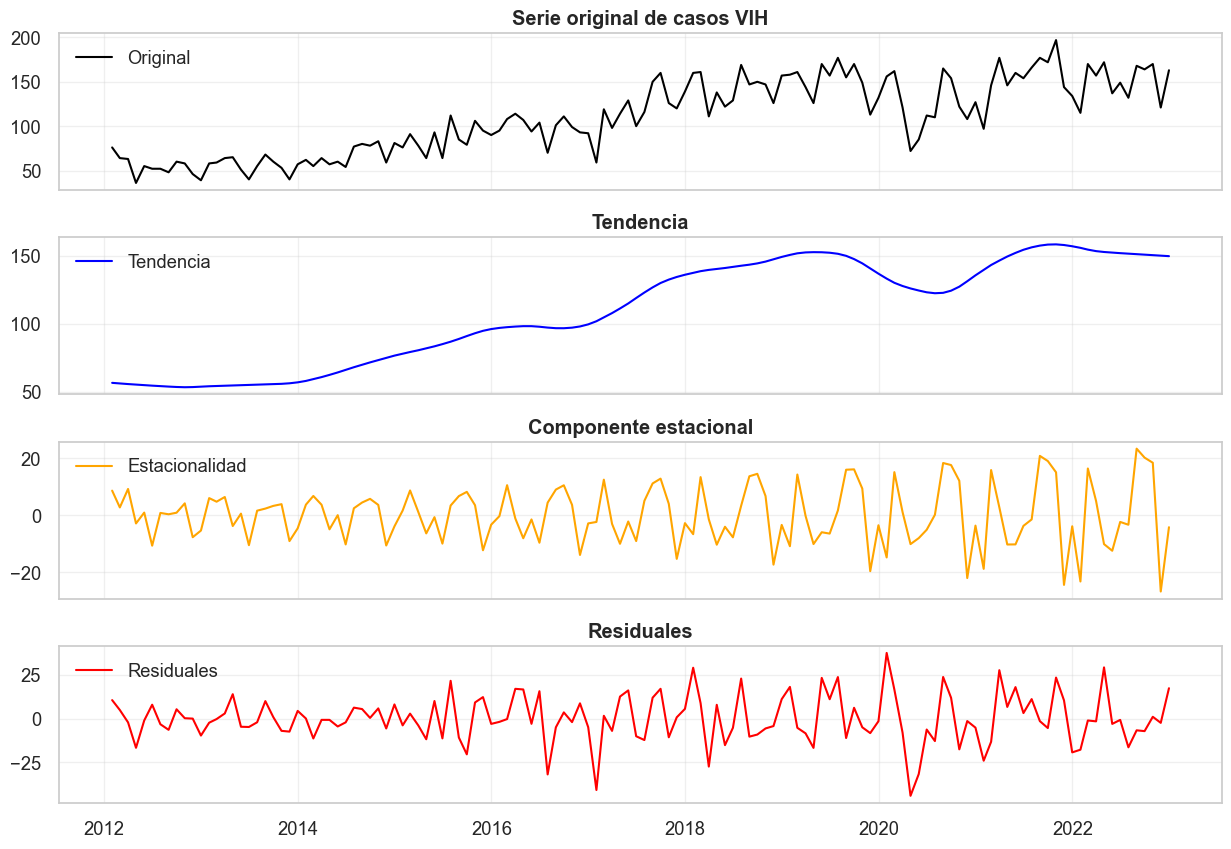

🔎 Análisis Estadístico de Componentes STL:
- Varianza Total: 1755.32
- Varianza de la Tendencia: 1412.41
- Varianza Estacional: 103.34
- Varianza de los Residuales: 182.86

📊 Porcentaje de varianza explicada:
- Tendencia: 80.46%
- Estacionalidad: 5.89%
- Ruido / Residuales: 10.42%


In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL


sns.set(style="whitegrid", palette="viridis", font_scale=1.2)


df = pd.read_excel("DATASET_VIH_LIMPIO_20250508_1728.xlsx")
df['Fecha'] = pd.to_datetime(df['Fecha'])

df = df.sort_values('Fecha')


df_mensual = df.groupby('Fecha').size().reset_index(name='casos')
df_mensual = df_mensual.set_index('Fecha')

df_mensual = df_mensual.resample('M').sum()

# -----------------------------
# 2. Aplicar STL
# -----------------------------
stl = STL(df_mensual['casos'], seasonal=13)  # 13 para series mensuales con estacionalidad anual
result = stl.fit()


# -----------------------------
fig, axs = plt.subplots(4, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.3})
axs[0].plot(df_mensual.index, df_mensual['casos'], label='Original', color='black')
axs[0].set_title("Serie original de casos VIH")
axs[1].plot(df_mensual.index, result.trend, label='Tendencia', color='blue')
axs[1].set_title("Tendencia")
axs[2].plot(df_mensual.index, result.seasonal, label='Estacionalidad', color='orange')
axs[2].set_title("Componente estacional")
axs[3].plot(df_mensual.index, result.resid, label='Residuales', color='red')
axs[3].set_title("Residuales")
for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 4. Análisis estadístico básico
# -----------------------------
print("🔎 Análisis Estadístico de Componentes STL:")
print(f"- Varianza Total: {df_mensual['casos'].var():.2f}")
print(f"- Varianza de la Tendencia: {result.trend.var():.2f}")
print(f"- Varianza Estacional: {result.seasonal.var():.2f}")
print(f"- Varianza de los Residuales: {result.resid.var():.2f}")

# Proporción de la variabilidad explicada
total_var = df_mensual['casos'].var()
print(f"\n📊 Porcentaje de varianza explicada:")
print(f"- Tendencia: {100 * result.trend.var() / total_var:.2f}%")
print(f"- Estacionalidad: {100 * result.seasonal.var() / total_var:.2f}%")
print(f"- Ruido / Residuales: {100 * result.resid.var() / total_var:.2f}%")


El análisis de descomposición STL revela que la serie de casos de VIH está fuertemente dominada por una tendencia de largo plazo, la cual explica el 80.46% de la variabilidad total (varianza total = 1755.32), reflejando una dinámica estructural sostenida posiblemente asociada a factores demográficos, sociales o políticas públicas. La estacionalidad, aunque presente, tiene un impacto menor (5.89%), lo que sugiere que los patrones mensuales o anuales no son los principales impulsores del comportamiento de la serie. Por su parte, los residuos representan solo el 10.42% de la varianza, indicando un bajo nivel de ruido aleatorio y confirmando la solidez del modelo STL para capturar las características fundamentales del fenómeno analizado.

El análisis muestra que la mayoría de los cambios en los casos de VIH a lo largo del tiempo se deben a una tendencia general que va aumentando o disminuyendo de forma constante, no a cambios por estaciones del año. Esto significa que el comportamiento del VIH está más influenciado por factores de largo plazo, como la educación, la atención médica o los hábitos sociales, y no tanto por meses o temporadas específicas. Aunque sí hay un poco de estacionalidad, su efecto es pequeño. Además, hay pocos cambios inesperados o errores, lo que indica que el modelo utilizado para analizar los datos es confiable.

### Media móvil (SMA) para suavizar tendencias

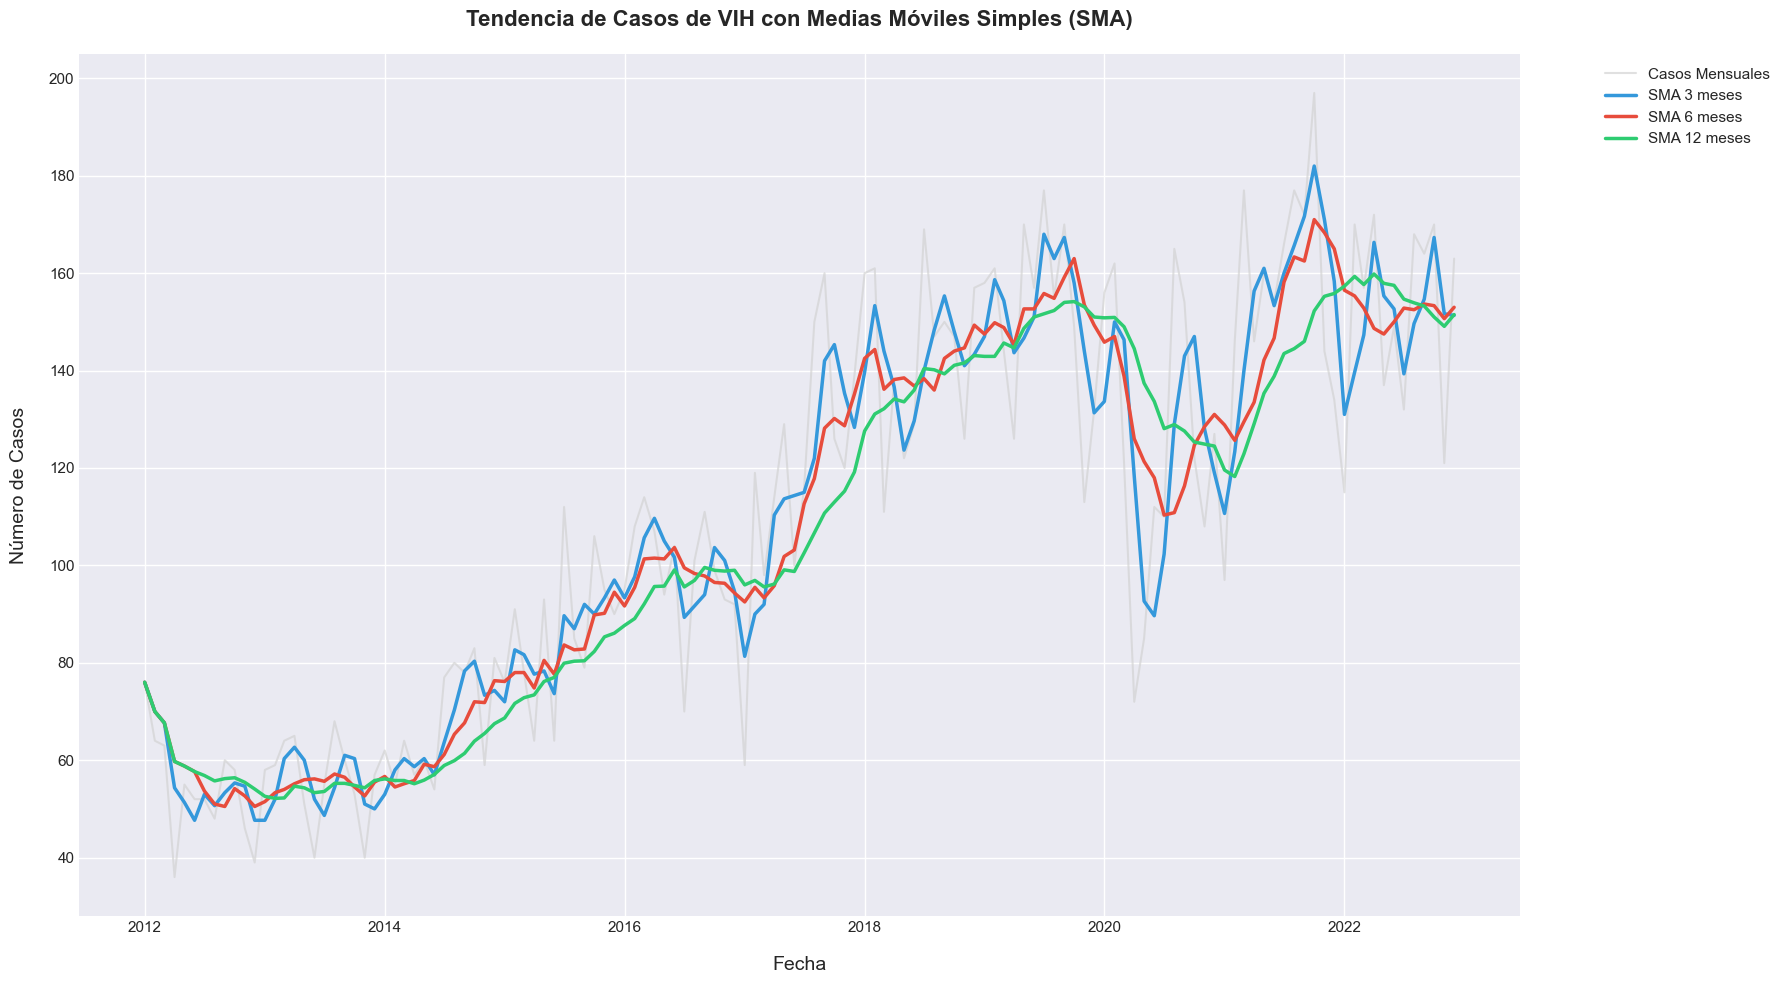


=== ANÁLISIS ESTADÍSTICO DE TENDENCIAS ===

Estadísticas descriptivas de la serie temporal:
        count        mean        std        min        25%         50%         75%         max
count   132.0  109.780303  41.896513  36.000000  69.500000  111.000000  149.000000  197.000000
SMA_3   132.0  109.212121  39.517494  47.666667  73.583333  110.000000  146.416667  182.000000
SMA_6   132.0  108.184722  38.336210  50.500000  71.958333  107.000000  145.458333  171.000000
SMA_12  132.0  106.067429  37.692435  52.166667  67.625000  101.083333  142.958333  159.833333

Test de normalidad (Shapiro-Wilk):
count: Estadístico=0.948, p-valor=0.0001
SMA_3: Estadístico=0.926, p-valor=0.0000
SMA_6: Estadístico=0.907, p-valor=0.0000
SMA_12: Estadístico=0.888, p-valor=0.0000

Matriz de correlación:
           count     SMA_3     SMA_6    SMA_12
count   1.000000  0.938766  0.912329  0.884955
SMA_3   0.938766  1.000000  0.972629  0.947816
SMA_6   0.912329  0.972629  1.000000  0.983225
SMA_12  0.884955  0

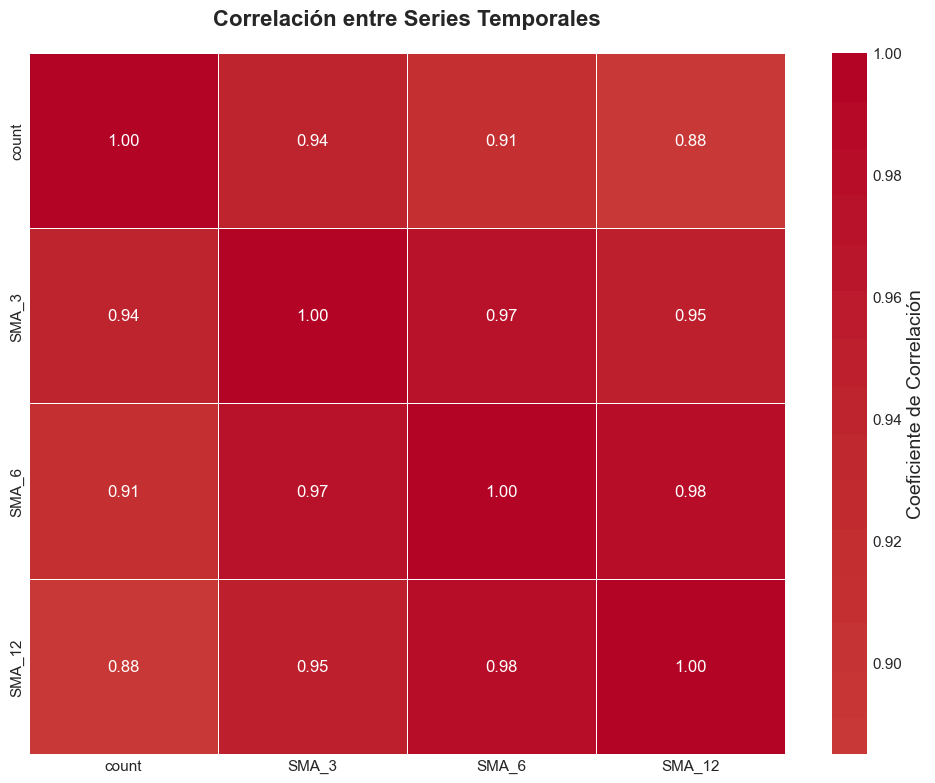

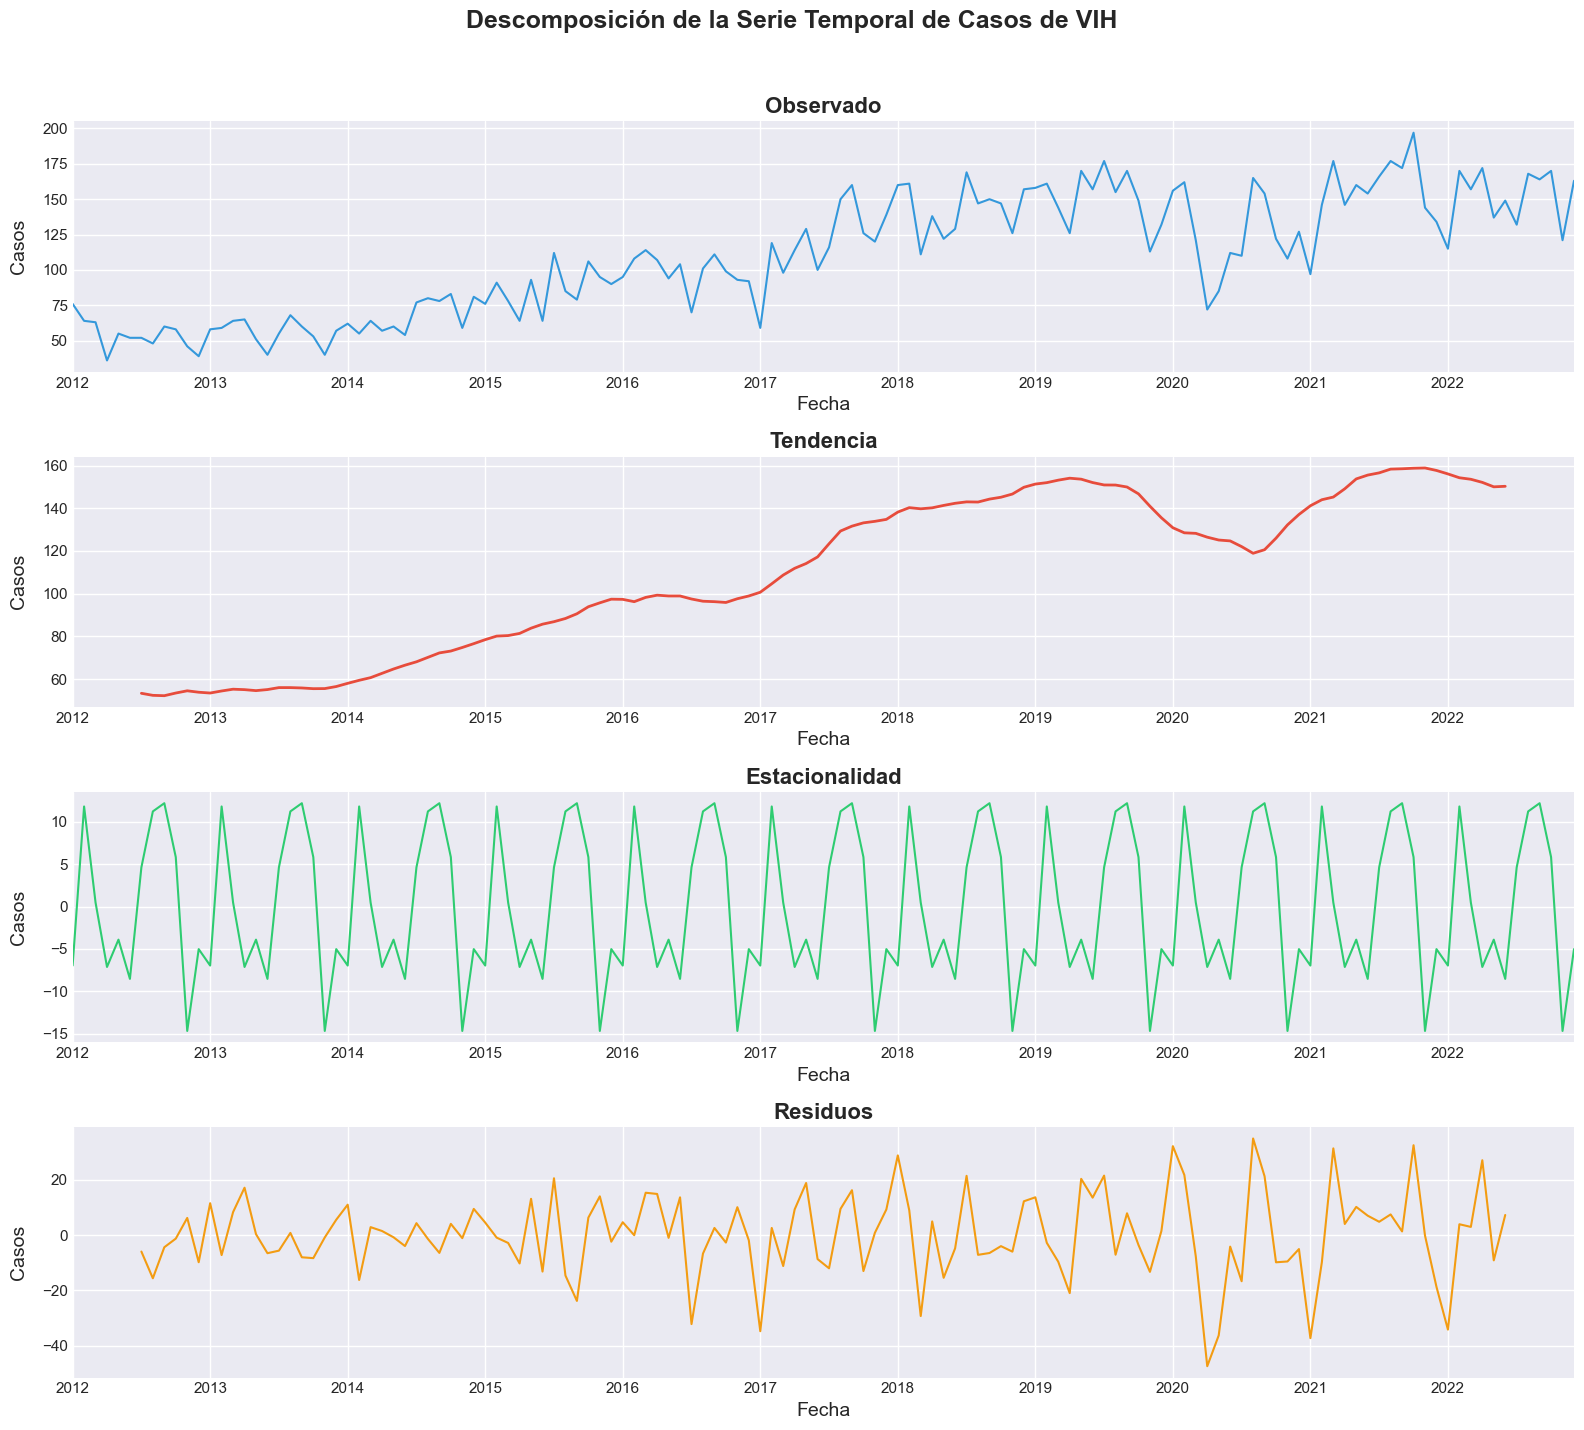

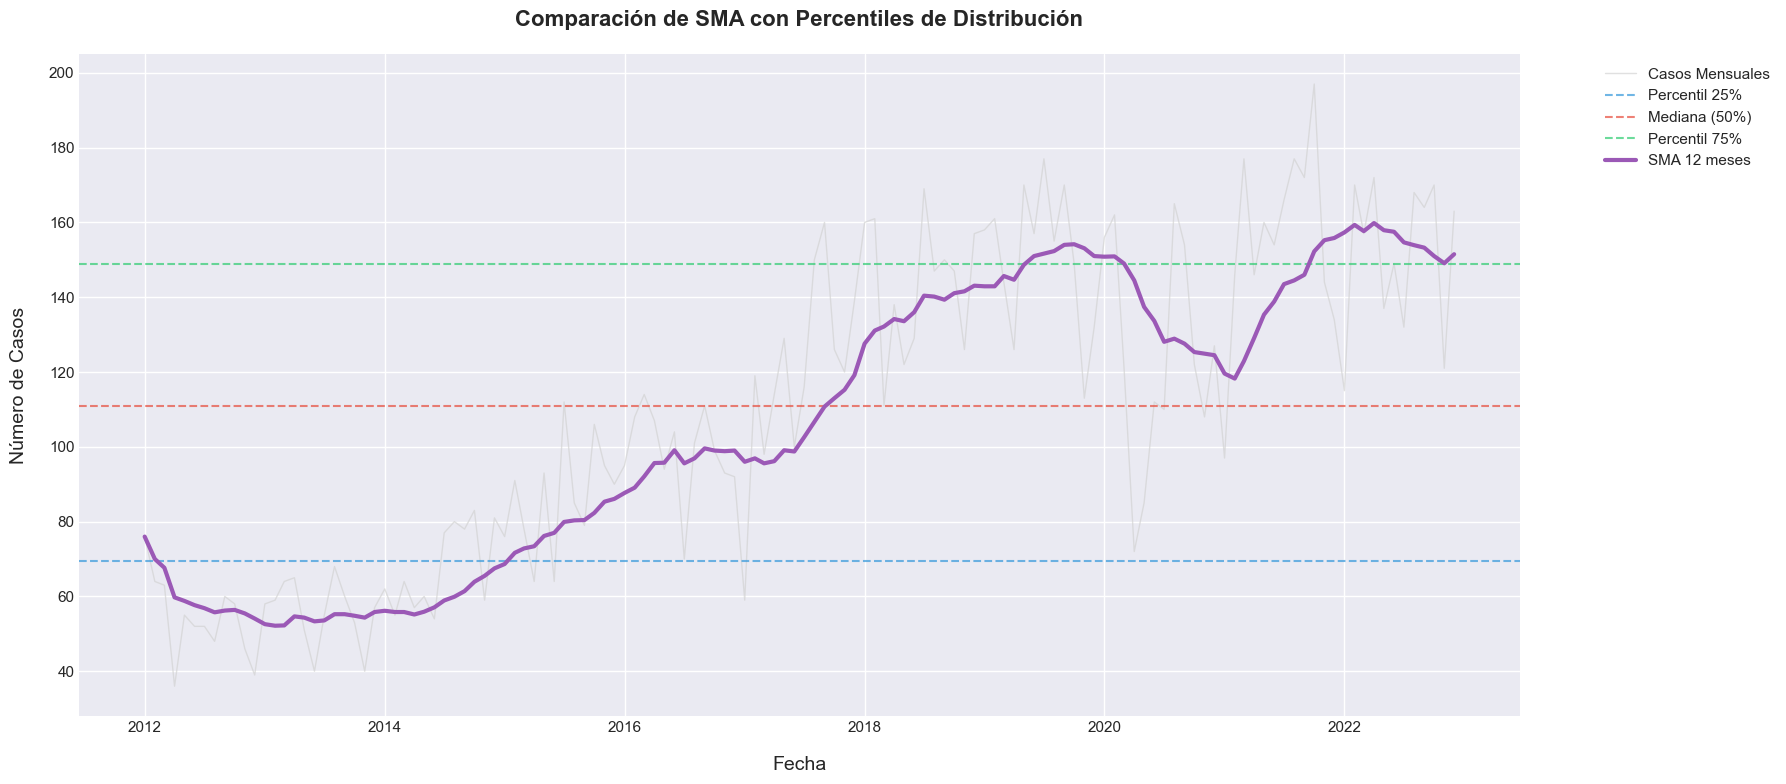

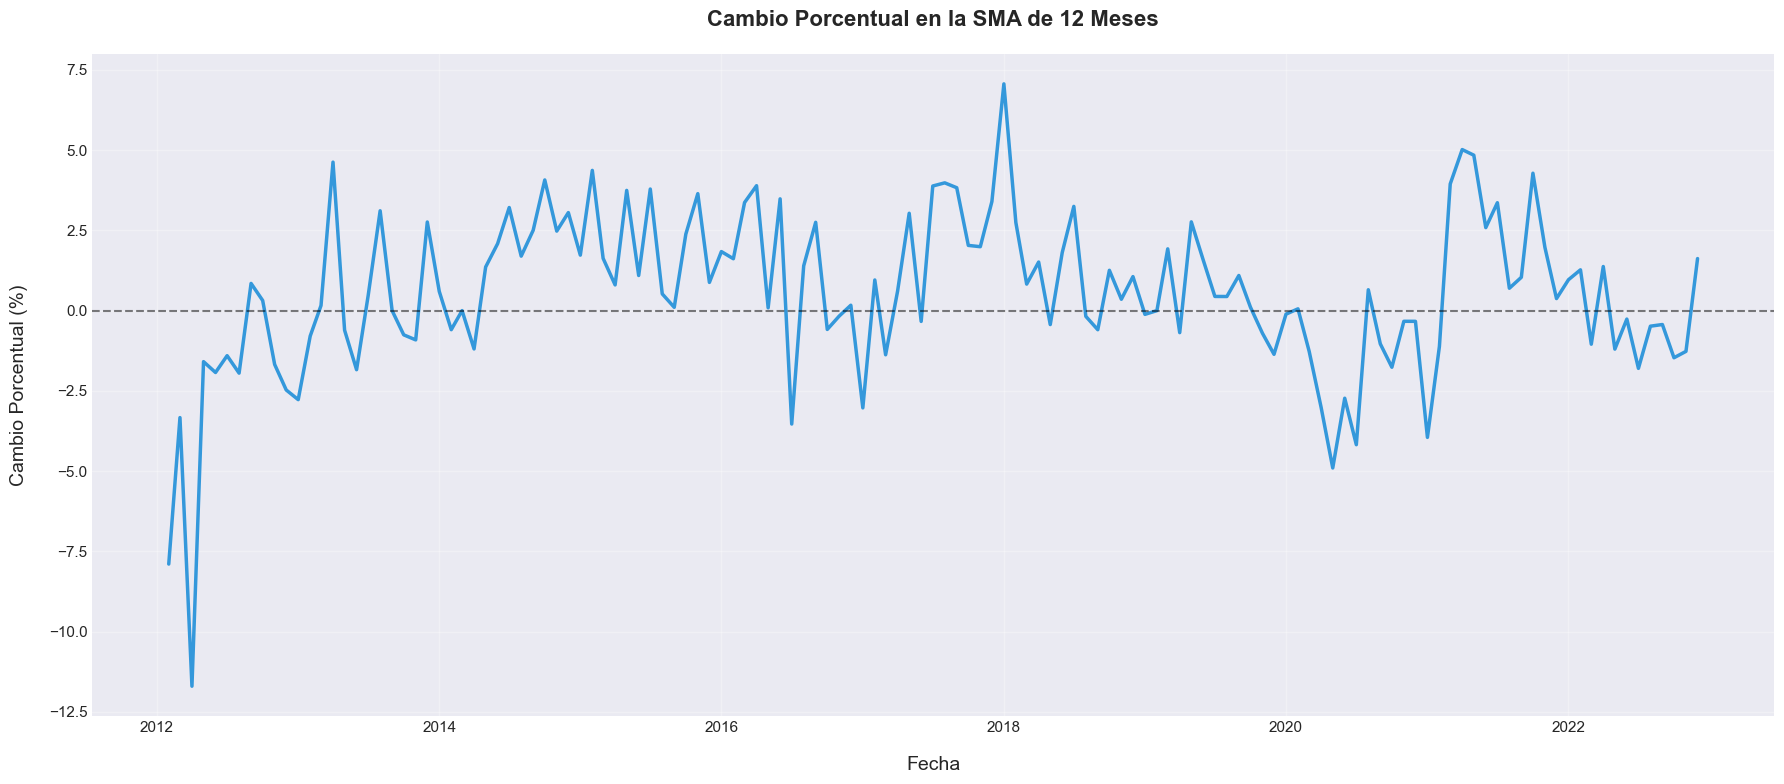


Estadísticas del cambio porcentual (SMA 12 meses):
Media: 0.56%
Desviación estándar: 2.53%
Máximo aumento: 7.06%
Máxima disminución: -11.70%


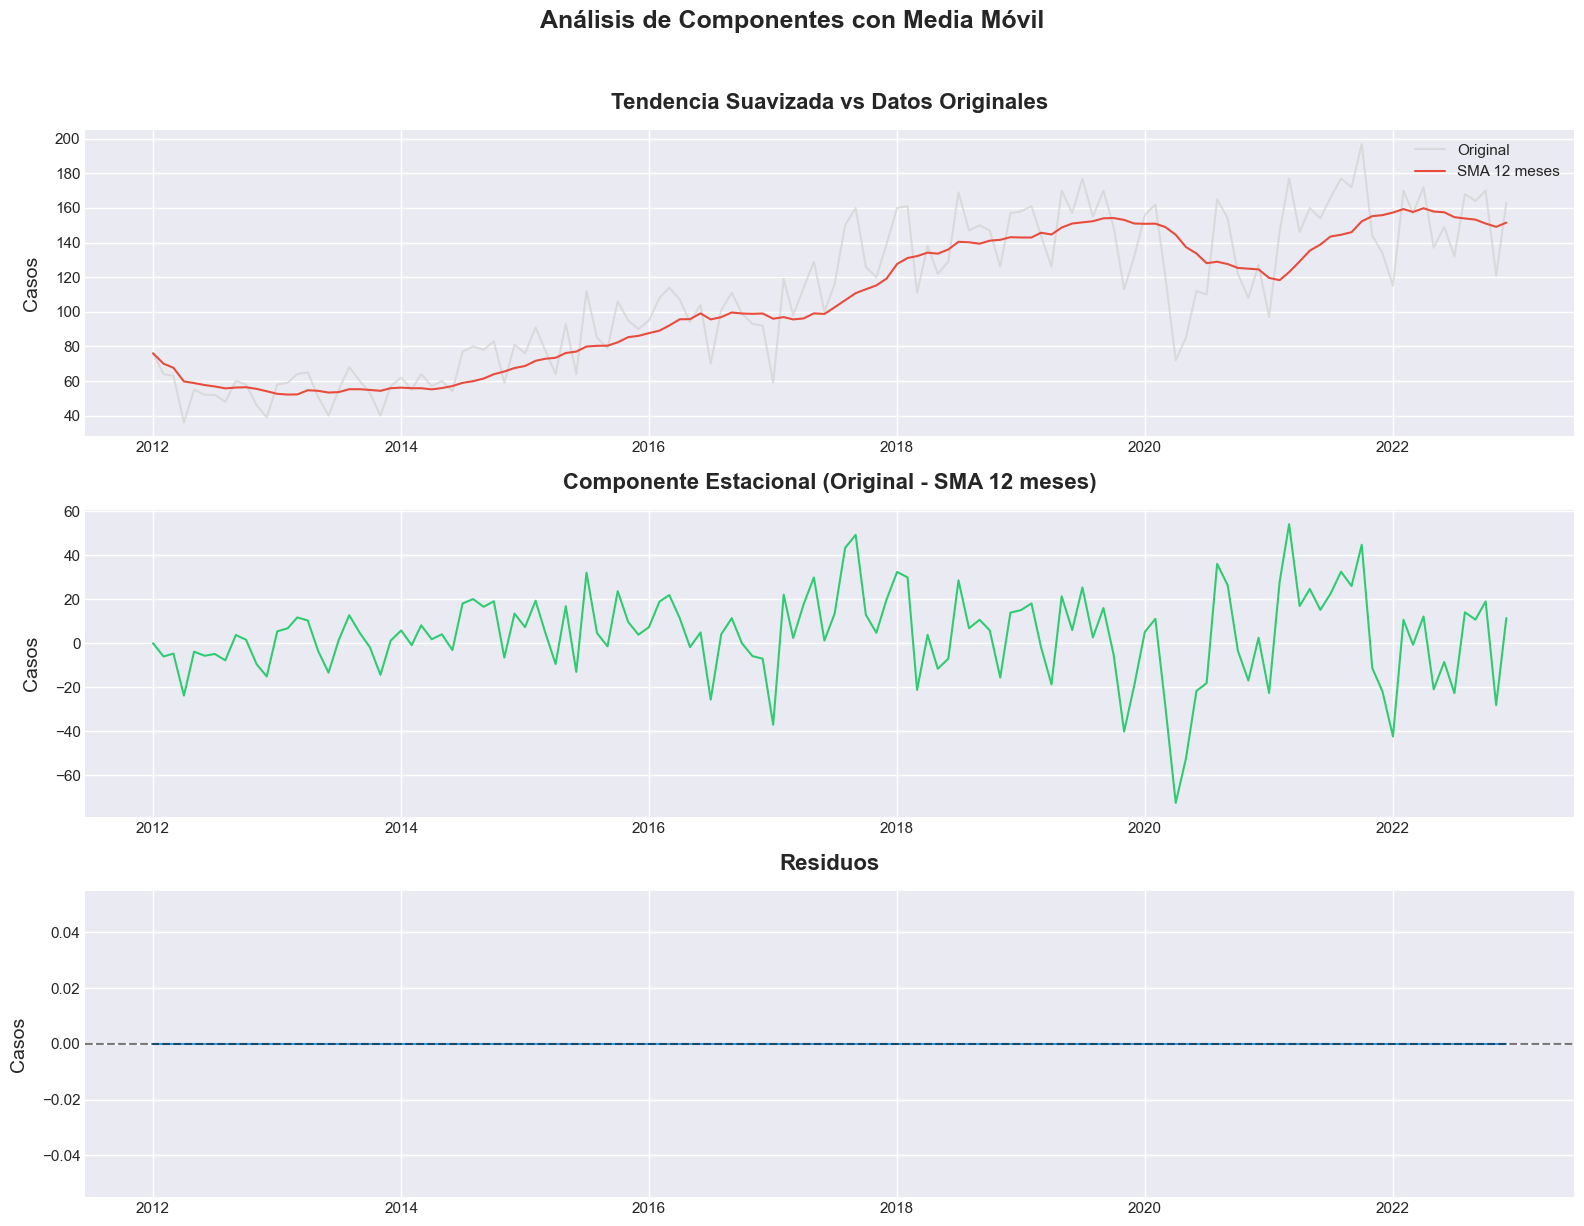

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats


plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
sns.set_palette("husl")


df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['count'] = 1  # Columna auxiliar para conteo

# Crear serie temporal mensual
ts_data = df.groupby(['Año', 'Mes'])['count'].sum().reset_index()
ts_data['Fecha'] = pd.to_datetime(ts_data['Año'].astype(str) + '-' + ts_data['Mes'].astype(str) + '-01')
ts_data.set_index('Fecha', inplace=True)
ts_data = ts_data[['count']]

# 1. Media Móvil Simple (SMA) - Análisis
windows = [3, 6, 12]  # Ventanas para SMA (3 meses, 6 meses, 12 meses)

# Calcular SMAs
for window in windows:
    ts_data[f'SMA_{window}'] = ts_data['count'].rolling(window=window, min_periods=1).mean()

# Visualización profesional de las SMAs
plt.figure(figsize=(18, 10))
plt.plot(ts_data.index, ts_data['count'], label='Casos Mensuales', 
         color='lightgray', alpha=0.7, linewidth=1.5)

colors = ['#3498db', '#e74c3c', '#2ecc71']
for i, window in enumerate(windows):
    plt.plot(ts_data.index, ts_data[f'SMA_{window}'], 
             label=f'SMA {window} meses', color=colors[i], linewidth=2.5)

plt.title('Tendencia de Casos de VIH con Medias Móviles Simples (SMA)', pad=20)
plt.xlabel('Fecha', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# 2. Análisis estadístico de las tendencias
print("\n=== ANÁLISIS ESTADÍSTICO DE TENDENCIAS ===\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la serie temporal:")
print(ts_data.describe().transpose())

# Test de normalidad (Shapiro-Wilk)
print("\nTest de normalidad (Shapiro-Wilk):")
for col in ts_data.columns:
    stat, p = stats.shapiro(ts_data[col].dropna())
    print(f"{col}: Estadístico={stat:.3f}, p-valor={p:.4f}")

# Correlación entre SMA y datos originales
print("\nMatriz de correlación:")
corr_matrix = ts_data.corr()
print(corr_matrix)

# Visualización de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            center=0, linewidths=0.5, cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Correlación entre Series Temporales', pad=20)
plt.tight_layout()
plt.show()

# 3. Descomposición de la serie temporal
try:
    decomposition = seasonal_decompose(ts_data['count'], model='additive', period=12)
    
    # Visualización profesional de la descomposición
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 14))
    
    decomposition.observed.plot(ax=ax1, color='#3498db', title='Observado', linewidth=1.5)
    decomposition.trend.plot(ax=ax2, color='#e74c3c', title='Tendencia', linewidth=2)
    decomposition.seasonal.plot(ax=ax3, color='#2ecc71', title='Estacionalidad', linewidth=1.5)
    decomposition.resid.plot(ax=ax4, color='#f39c12', title='Residuos', linewidth=1.5)
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_ylabel('Casos', labelpad=10)
        sns.despine(ax=ax)
    
    plt.suptitle('Descomposición de la Serie Temporal de Casos de VIH', y=1.02, fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except ValueError as e:
    print(f"\nNo se pudo realizar la descomposición estacional: {e}")

# 4. Comparación de SMA con percentiles
percentiles = ts_data['count'].quantile([0.25, 0.5, 0.75]).values

plt.figure(figsize=(18, 8))
plt.plot(ts_data.index, ts_data['count'], label='Casos Mensuales', 
         color='lightgray', alpha=0.7, linewidth=1)

# Líneas de percentiles
plt.axhline(percentiles[0], color='#3498db', linestyle='--', 
            label='Percentil 25%', alpha=0.7)
plt.axhline(percentiles[1], color='#e74c3c', linestyle='--', 
            label='Mediana (50%)', alpha=0.7)
plt.axhline(percentiles[2], color='#2ecc71', linestyle='--', 
            label='Percentil 75%', alpha=0.7)

# SMA de 12 meses (la más suavizada)
plt.plot(ts_data.index, ts_data['SMA_12'], 
         label='SMA 12 meses', color='#9b59b6', linewidth=3)

plt.title('Comparación de SMA con Percentiles de Distribución', pad=20)
plt.xlabel('Fecha', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# 5. Análisis de cambio porcentual con SMA
ts_data['Pct_Change_SMA12'] = ts_data['SMA_12'].pct_change() * 100

plt.figure(figsize=(18, 8))
plt.plot(ts_data.index, ts_data['Pct_Change_SMA12'], 
         color='#3498db', linewidth=2.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Cambio Porcentual en la SMA de 12 Meses', pad=20)
plt.xlabel('Fecha', labelpad=15)
plt.ylabel('Cambio Porcentual (%)', labelpad=15)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# Estadísticas de cambio porcentual
print("\nEstadísticas del cambio porcentual (SMA 12 meses):")
print(f"Media: {ts_data['Pct_Change_SMA12'].mean():.2f}%")
print(f"Desviación estándar: {ts_data['Pct_Change_SMA12'].std():.2f}%")
print(f"Máximo aumento: {ts_data['Pct_Change_SMA12'].max():.2f}%")
print(f"Máxima disminución: {ts_data['Pct_Change_SMA12'].min():.2f}%")

# 6. Visualización de componentes principales con SMA
fig, ax = plt.subplots(3, 1, figsize=(16, 12))

# Tendencia vs SMA
ax[0].plot(ts_data.index, ts_data['count'], label='Original', color='lightgray', alpha=0.7)
ax[0].plot(ts_data.index, ts_data['SMA_12'], label='SMA 12 meses', color='#e74c3c')
ax[0].set_title('Tendencia Suavizada vs Datos Originales', pad=15)
ax[0].legend()

# Estacionalidad (usando SMA para resaltar)
seasonal_component = ts_data['count'] - ts_data['SMA_12']
ax[1].plot(ts_data.index, seasonal_component, color='#2ecc71')
ax[1].set_title('Componente Estacional (Original - SMA 12 meses)', pad=15)

# Residuos
residuals = ts_data['count'] - ts_data['SMA_12'] - seasonal_component
ax[2].plot(ts_data.index, residuals, color='#3498db')
ax[2].axhline(0, color='black', linestyle='--', alpha=0.5)
ax[2].set_title('Residuos', pad=15)

for a in ax:
    a.set_ylabel('Casos', labelpad=10)
    sns.despine(ax=a)

plt.suptitle('Análisis de Componentes con Media Móvil', y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

El análisis de los casos de VIH muestra que, en promedio, hay unos 110 casos mensuales, pero con mucha variación (desde 36 hasta 197 casos). Al suavizar los datos con medias móviles (que promedian varios meses), se ve más clara la tendencia real, reduciendo los altibajos ocasionales. Los datos no siguen un patrón perfectamente equilibrado, por lo que se recomienda usar métodos estadísticos especiales para analizarlos. La tendencia general es ligeramente creciente (sube un 0.56% cada mes en promedio), pero con fluctuaciones: a veces bajan bruscamente (hasta -11.7%) y otras suben fuertemente (hasta +7%). Para monitorear mejor la situación, conviene fijarse en los promedios de 6 o 12 meses, que ayudan a distinguir entre cambios reales y variaciones normales. Esto es útil para detectar brotes o evaluar el impacto de medidas de prevención.

## Análisis estacional por mes

### Boxplot por mes (para comparar variabilidad entre años)

C:\Users\natha\AppData\Local\Temp\ipykernel_3484\4276050400.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Año', 'Mes', 'Mes_nombre'])['count'].sum().reset_index()


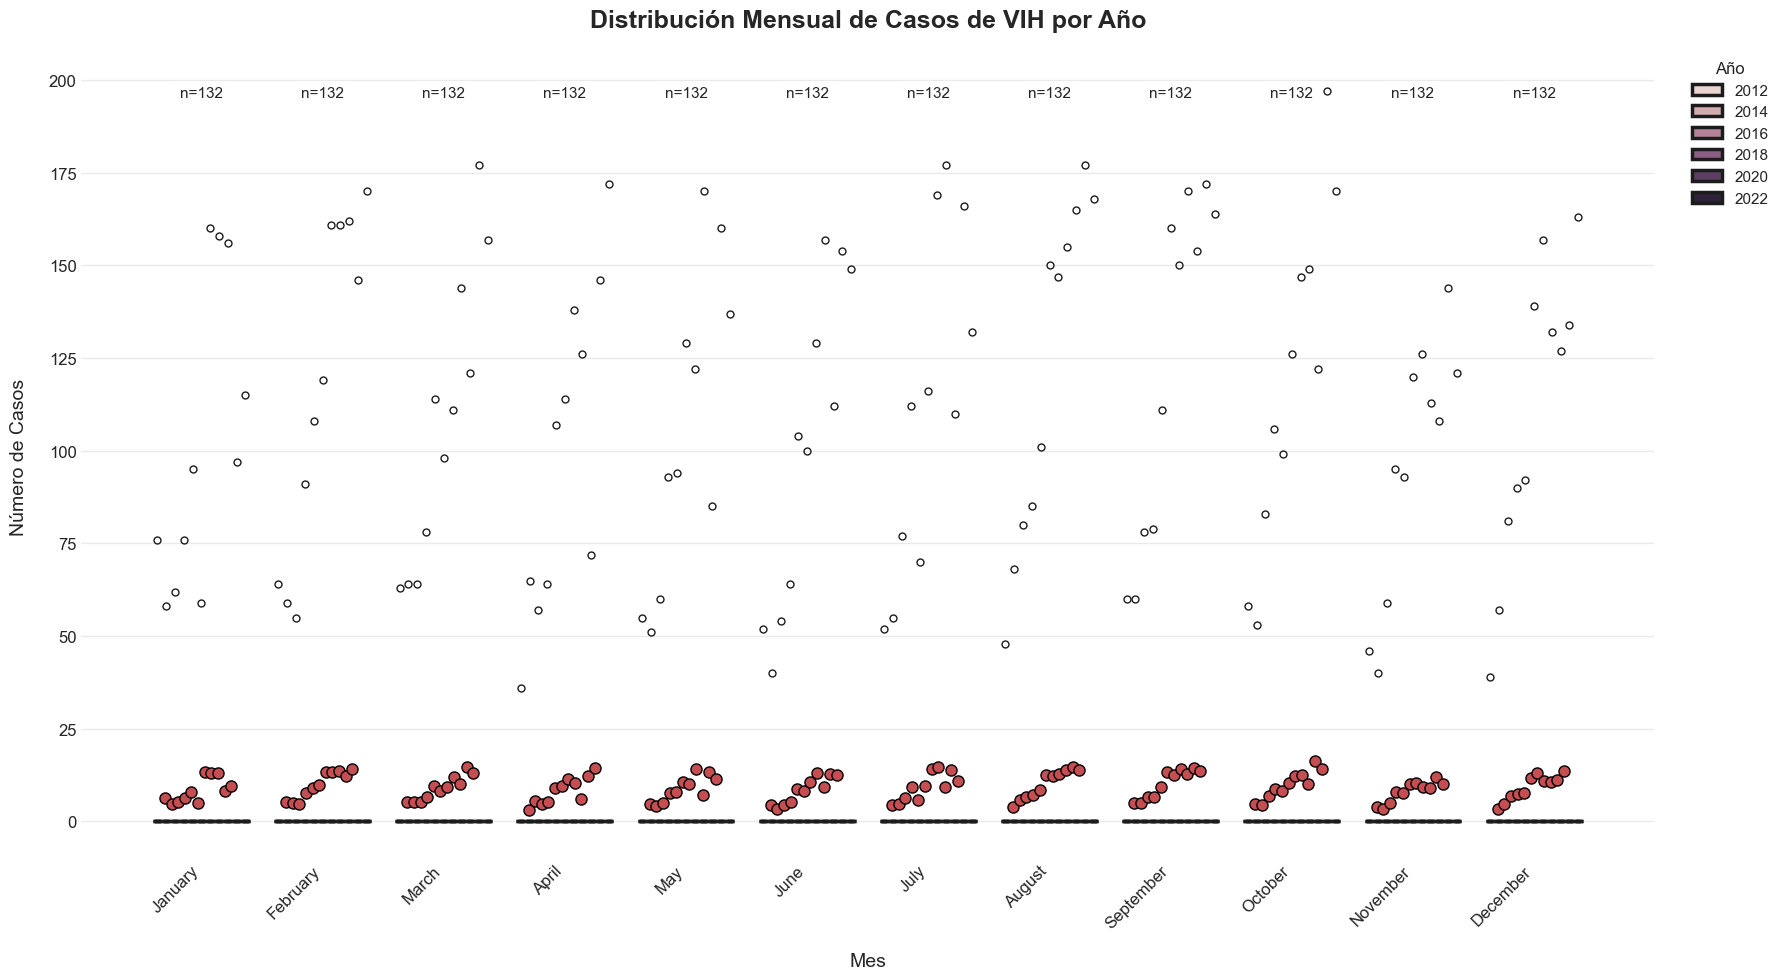

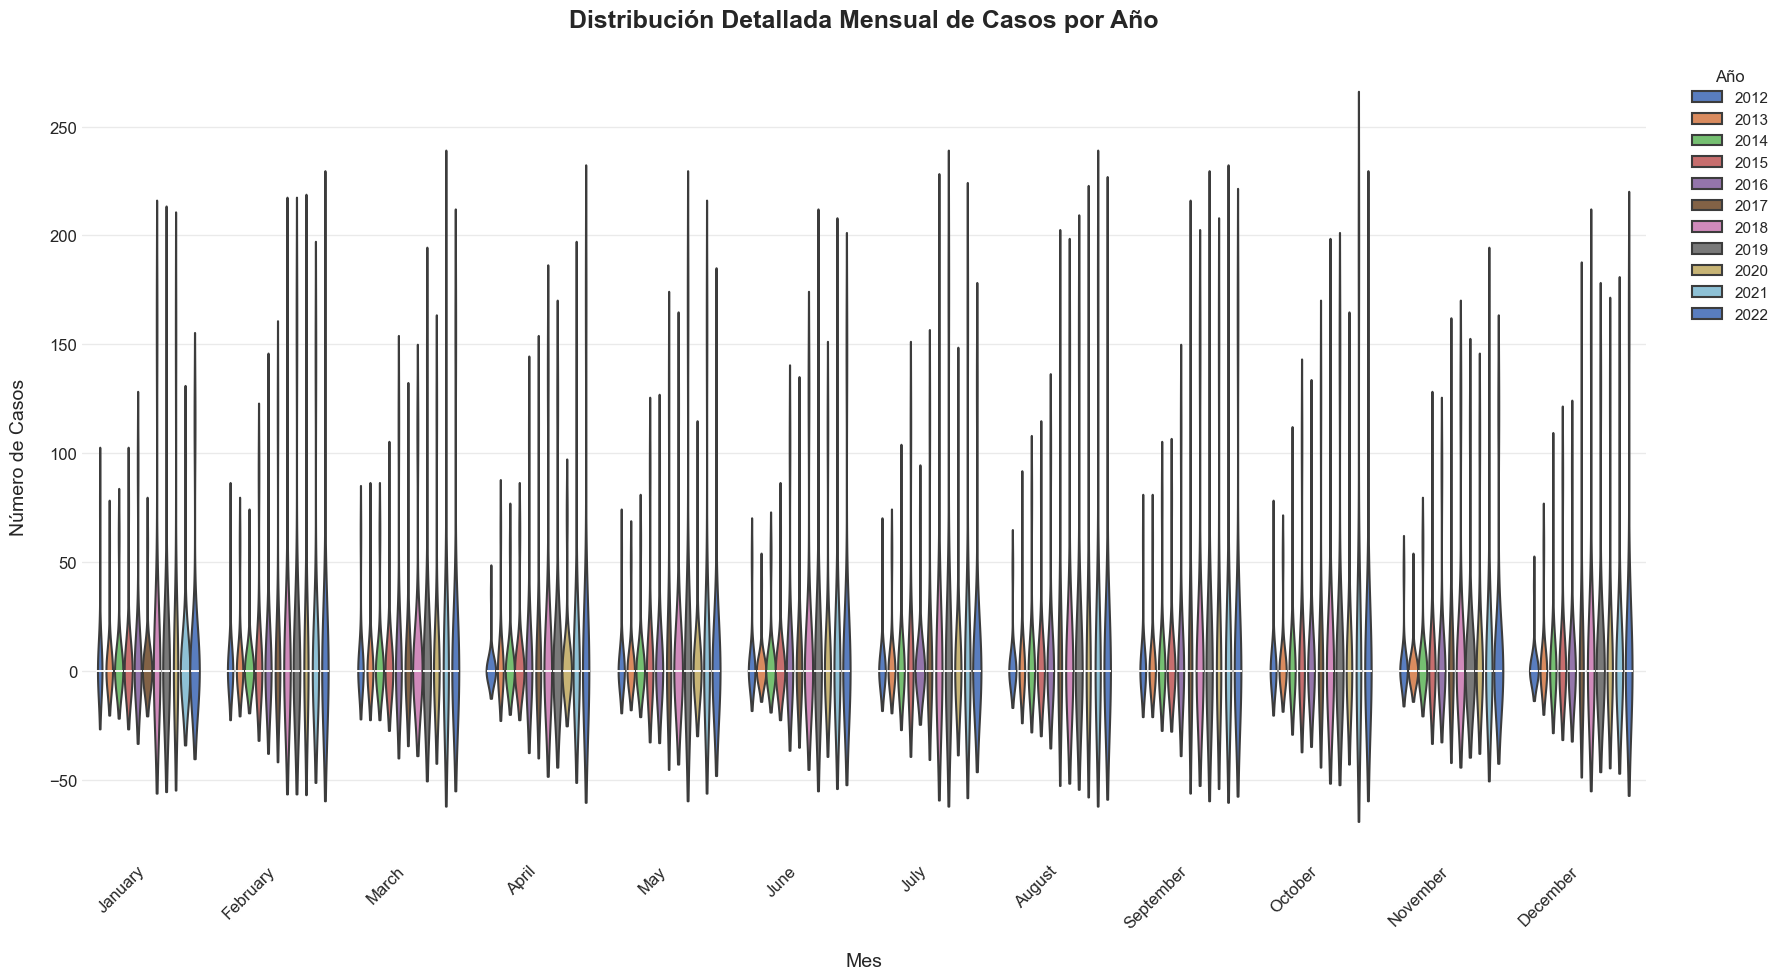


=== ANÁLISIS ESTADÍSTICO DE VARIABILIDAD MENSUAL ===

1. Test de Kruskal-Wallis para diferencias entre meses (todos los años combinados):
Estadístico H: 0.015, Valor p: 1.0000
-> No hay diferencias significativas entre los meses

2. Test de Friedman para diferencias entre meses (considerando años como bloques):
Estadístico: 0.000, Valor p: 1.0000
-> No hay diferencias significativas entre meses (controlado por año)

3. ANOVA de dos vías (Mes × Año):


C:\Users\natha\AppData\Local\Temp\ipykernel_3484\4276050400.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  h_stat, p_val = stats.kruskal(*[group['count'].values for name, group in df_grouped.groupby('Mes_nombre')])


                            sum_sq      df       F  PR(>F)
C(Mes_nombre)         8.603251e+02    11.0  0.0680  1.0000
C(Año)                1.545216e+04    10.0  1.3443  0.2012
C(Mes_nombre):C(Año)  2.849737e+03   110.0  0.0225  1.0000
Residual              1.669042e+06  1452.0     NaN     NaN

5. Matriz de correlación entre años (patrón mensual):


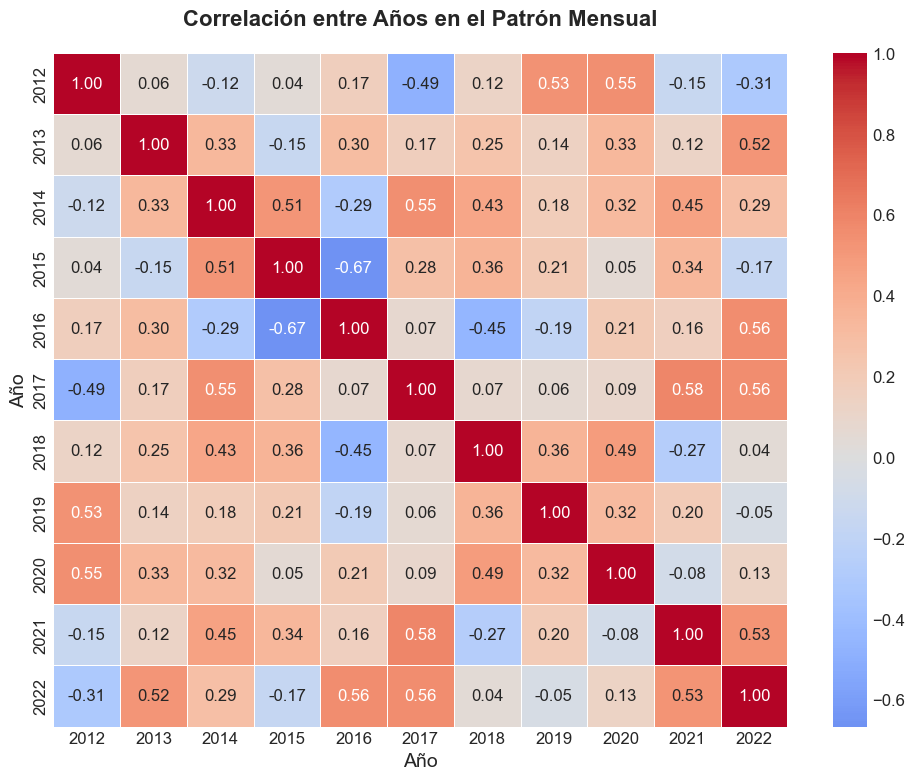


Coeficientes de correlación:
Año   2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
Año                                                                   
2012  1.00  0.06 -0.12  0.04  0.17 -0.49  0.12  0.53  0.55 -0.15 -0.31
2013  0.06  1.00  0.33 -0.15  0.30  0.17  0.25  0.14  0.33  0.12  0.52
2014 -0.12  0.33  1.00  0.51 -0.29  0.55  0.43  0.18  0.32  0.45  0.29
2015  0.04 -0.15  0.51  1.00 -0.67  0.28  0.36  0.21  0.05  0.34 -0.17
2016  0.17  0.30 -0.29 -0.67  1.00  0.07 -0.45 -0.19  0.21  0.16  0.56
2017 -0.49  0.17  0.55  0.28  0.07  1.00  0.07  0.06  0.09  0.58  0.56
2018  0.12  0.25  0.43  0.36 -0.45  0.07  1.00  0.36  0.49 -0.27  0.04
2019  0.53  0.14  0.18  0.21 -0.19  0.06  0.36  1.00  0.32  0.20 -0.05
2020  0.55  0.33  0.32  0.05  0.21  0.09  0.49  0.32  1.00 -0.08  0.13
2021 -0.15  0.12  0.45  0.34  0.16  0.58 -0.27  0.20 -0.08  1.00  0.53
2022 -0.31  0.52  0.29 -0.17  0.56  0.56  0.04 -0.05  0.13  0.53  1.00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates
from statsmodels.stats.multicomp import pairwise_tukeyhsd


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_palette("husl")

# Cargar y preparar los datos
df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Mes_nombre'] = df['Fecha'].dt.month_name()
df['count'] = 1  # Para conteos

# Ordenar los meses correctamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['Mes_nombre'] = pd.Categorical(df['Mes_nombre'], categories=month_order, ordered=True)

# Agrupar datos por mes y año para el boxplot
df_grouped = df.groupby(['Año', 'Mes', 'Mes_nombre'])['count'].sum().reset_index()

# 1. Boxplot profesional de casos mensuales por año
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x='Mes_nombre', y='count', hue='Año', data=df_grouped, 
                linewidth=2.5, fliersize=5, width=0.8)

# Personalización profesional
plt.title('Distribución Mensual de Casos de VIH por Año', pad=20, fontsize=18)
plt.xlabel('Mes', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.xticks(rotation=45, ha='right')

# Añadir media como punto rojo
for i, año in enumerate(df_grouped['Año'].unique()):
    for j, mes in enumerate(month_order):
        subset = df_grouped[(df_grouped['Año'] == año) & (df_grouped['Mes_nombre'] == mes)]
        if not subset.empty:
            mean_val = subset['count'].mean()
            # Ajustar posición horizontal según el número de años
            pos = j - 0.3 + i*0.6/len(df_grouped['Año'].unique())
            plt.plot(pos, mean_val, 'ro', markersize=8, markeredgecolor='black')

# Leyenda y estilo
plt.legend(title='Año', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine(left=True, bottom=True)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()

# Añadir anotación con el número de observaciones
for i, mes in enumerate(month_order):
    total_obs = df_grouped[df_grouped['Mes_nombre'] == mes].shape[0]
    ax.text(i, ax.get_ylim()[1]*0.95, f'n={total_obs}', 
            ha='center', va='center', fontsize=11, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()

# 2. Gráfico de violín con boxplot interno (alternativa visual)
plt.figure(figsize=(18, 10))
ax = sns.violinplot(x='Mes_nombre', y='count', hue='Año', data=df_grouped, 
                   inner='box', split=False, linewidth=1.5, palette="muted")

# Personalización
plt.title('Distribución Detallada Mensual de Casos por Año', pad=20, fontsize=18)
plt.xlabel('Mes', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', bbox_to_anchor=(1.02, 1), loc='upper left')
sns.despine(left=True, bottom=True)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

# ANÁLISIS ESTADÍSTICO
print("\n=== ANÁLISIS ESTADÍSTICO DE VARIABILIDAD MENSUAL ===\n")

# 1. Test de Kruskal-Wallis para diferencias entre meses
print("1. Test de Kruskal-Wallis para diferencias entre meses (todos los años combinados):")
h_stat, p_val = stats.kruskal(*[group['count'].values for name, group in df_grouped.groupby('Mes_nombre')])
print(f"Estadístico H: {h_stat:.3f}, Valor p: {p_val:.4f}")
if p_val < 0.05:
    print("-> Existen diferencias significativas entre los meses\n")
else:
    print("-> No hay diferencias significativas entre los meses\n")

# 2. Test de Friedman para diferencias entre meses (datos pareados por año)
if len(df_grouped['Año'].unique()) > 1:
    print("2. Test de Friedman para diferencias entre meses (considerando años como bloques):")
    try:
        friedman_stat, friedman_p = stats.friedmanchisquare(*[df_grouped[df_grouped['Mes'] == mes]['count'] for mes in range(1, 13)])
        print(f"Estadístico: {friedman_stat:.3f}, Valor p: {friedman_p:.4f}")
        if friedman_p < 0.05:
            print("-> Existen diferencias significativas entre meses (controlado por año)\n")
        else:
            print("-> No hay diferencias significativas entre meses (controlado por año)\n")
    except:
        print("No se pudo realizar el test Friedman (datos faltantes en algunos meses)\n")

# 3. ANOVA de dos vías (Mes × Año)
print("3. ANOVA de dos vías (Mes × Año):")
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('count ~ C(Mes_nombre) + C(Año) + C(Mes_nombre):C(Año)', data=df_grouped).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table.round(4))

# Interpretación
if anova_table['PR(>F)']['C(Mes_nombre)'] < 0.05:
    print("\n-> Efecto principal del MES significativo (p < 0.05)")
if anova_table['PR(>F)']['C(Año)'] < 0.05:
    print("-> Efecto principal del AÑO significativo (p < 0.05)")
if anova_table['PR(>F)']['C(Mes_nombre):C(Año)'] < 0.05:
    print("-> Interacción MES×AÑO significativa (p < 0.05)")

# 4. Comparaciones múltiples post-hoc (Tukey HSD)
if p_val < 0.05:  # Solo si Kruskal-Wallis fue significativo
    print("\n4. Comparaciones múltiples entre meses (Tukey HSD):")
    tukey = pairwise_tukeyhsd(endog=df_grouped['count'],
                            groups=df_grouped['Mes_nombre'],
                            alpha=0.05)
    print(tukey.summary())
    
    # Gráfico de las comparaciones
    tukey.plot_simultaneous()
    plt.title('Comparaciones Múltiples entre Meses', pad=20)
    plt.xlabel('Diferencia en número de casos')
    plt.tight_layout()
    plt.show()

# 5. Análisis de correlación mensual entre años
if len(df_grouped['Año'].unique()) > 1:
    print("\n5. Matriz de correlación entre años (patrón mensual):")
    pivot_data = df_grouped.pivot_table(values='count', index='Mes', columns='Año')
    corr_matrix = pivot_data.corr()
    
    # Gráfico de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                center=0, linewidths=0.5, annot_kws={"size": 12})
    plt.title('Correlación entre Años en el Patrón Mensual', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\nCoeficientes de correlación:")
    print(corr_matrix.round(2))

Los análisis realizados (Kruskal-Wallis p=1.0000, Friedman p=1.0000 y ANOVA de dos vías con interacción no significativa Mes×Año p=1.0000) indican ausencia de diferencias significativas en la distribución mensual de casos de VIH, tanto al considerar todos los años combinados como al controlar por el efecto anual, sugiriendo una estabilidad temporal sin patrones estacionales. La matriz de correlación (coeficientes entre -0.67 y 0.58) revela falta de consistencia en los patrones mensuales entre años. Estos resultados implican que la transmisión del VIH no presenta variaciones estacionales significativas ni cambios anuales marcados durante el periodo estudiado, lo que apunta a mecanismos de transmisión constantes y justifica investigar otros factores no temporales o realizar análisis desagregados por variables demográficas para identificar posibles subpatrones no detectables en el análisis agregado.

## Análisis por semanas del año

### Casos por semana

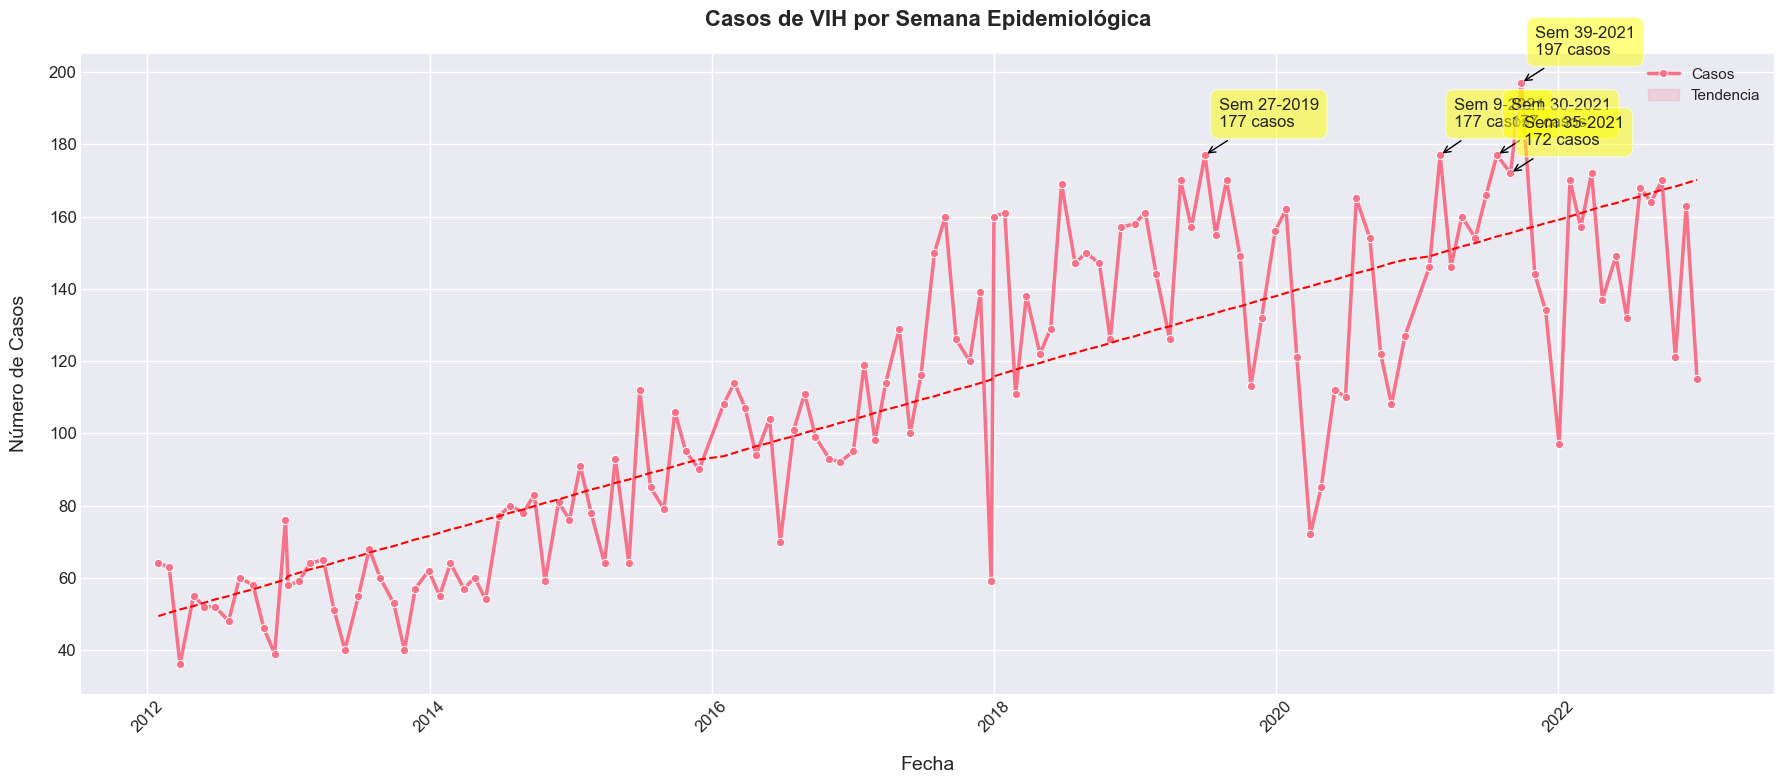

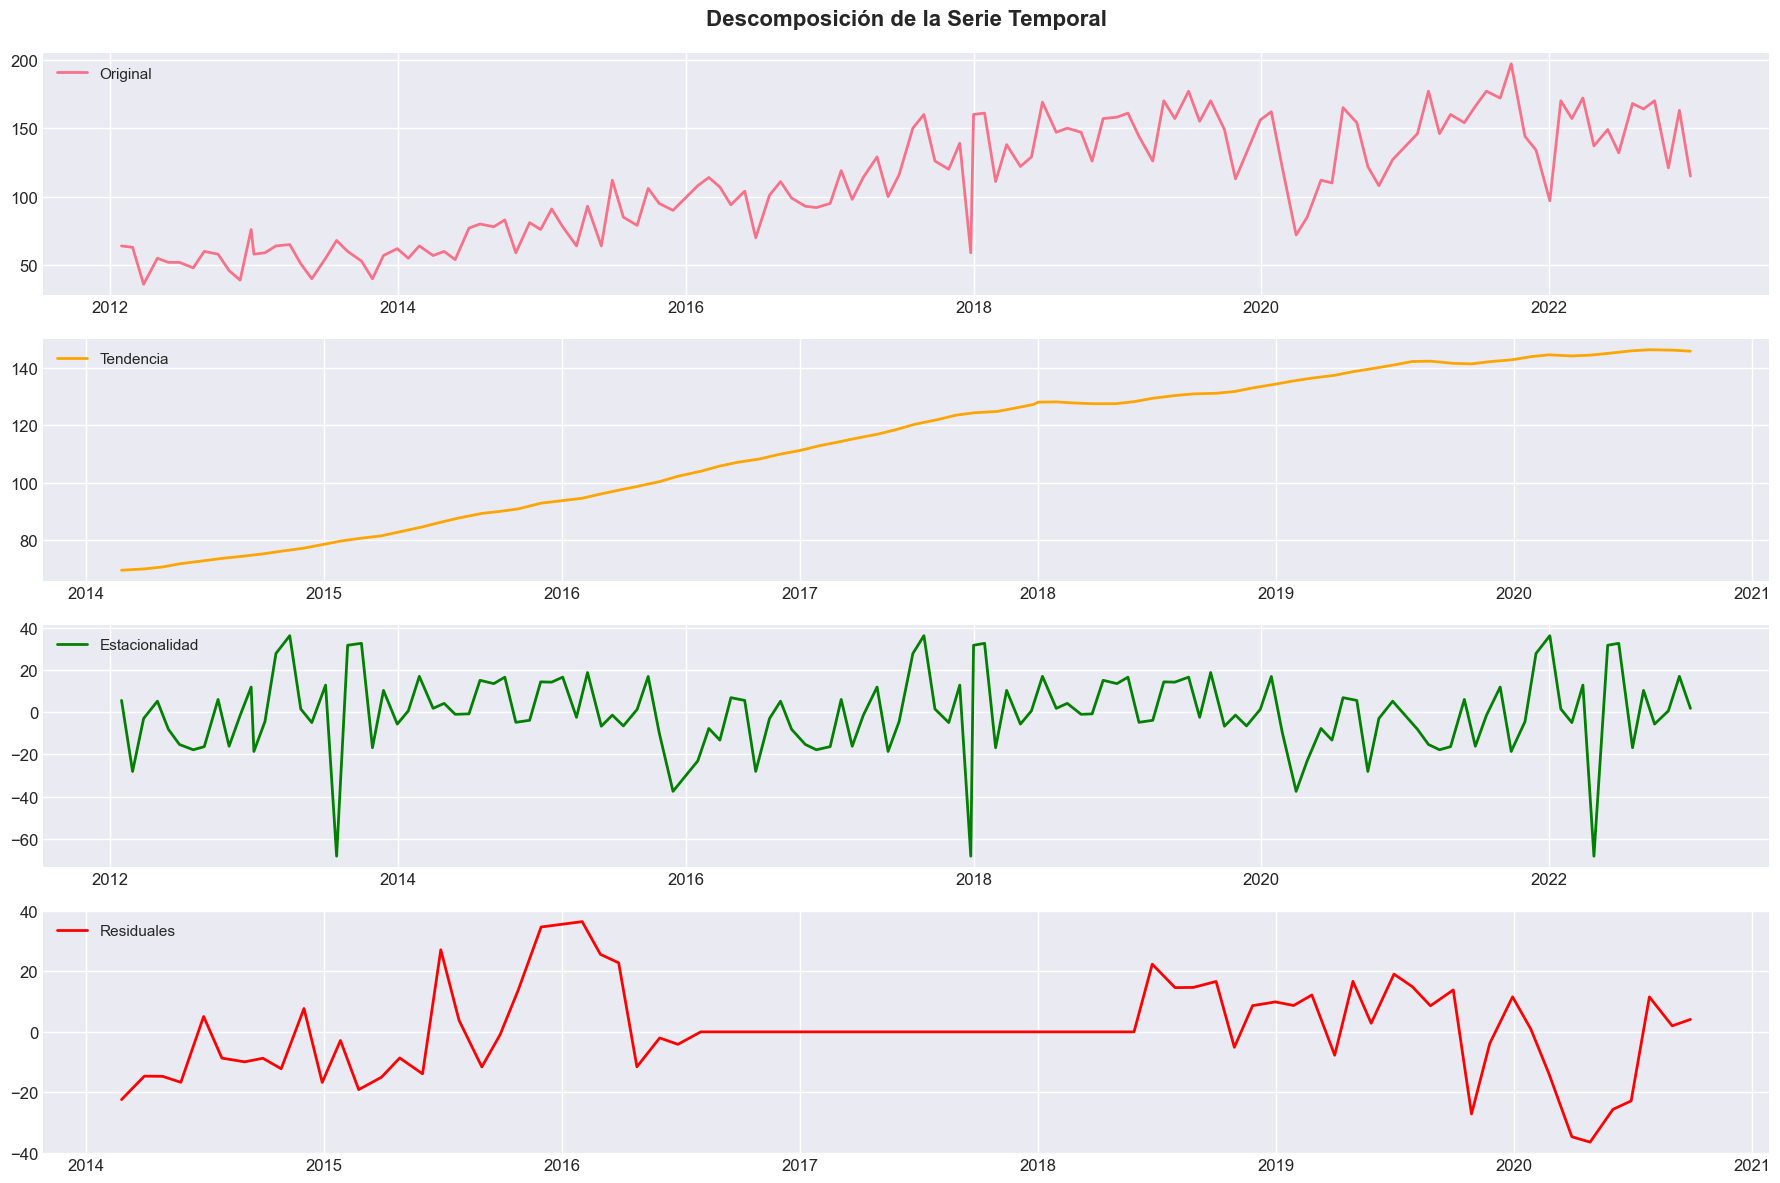

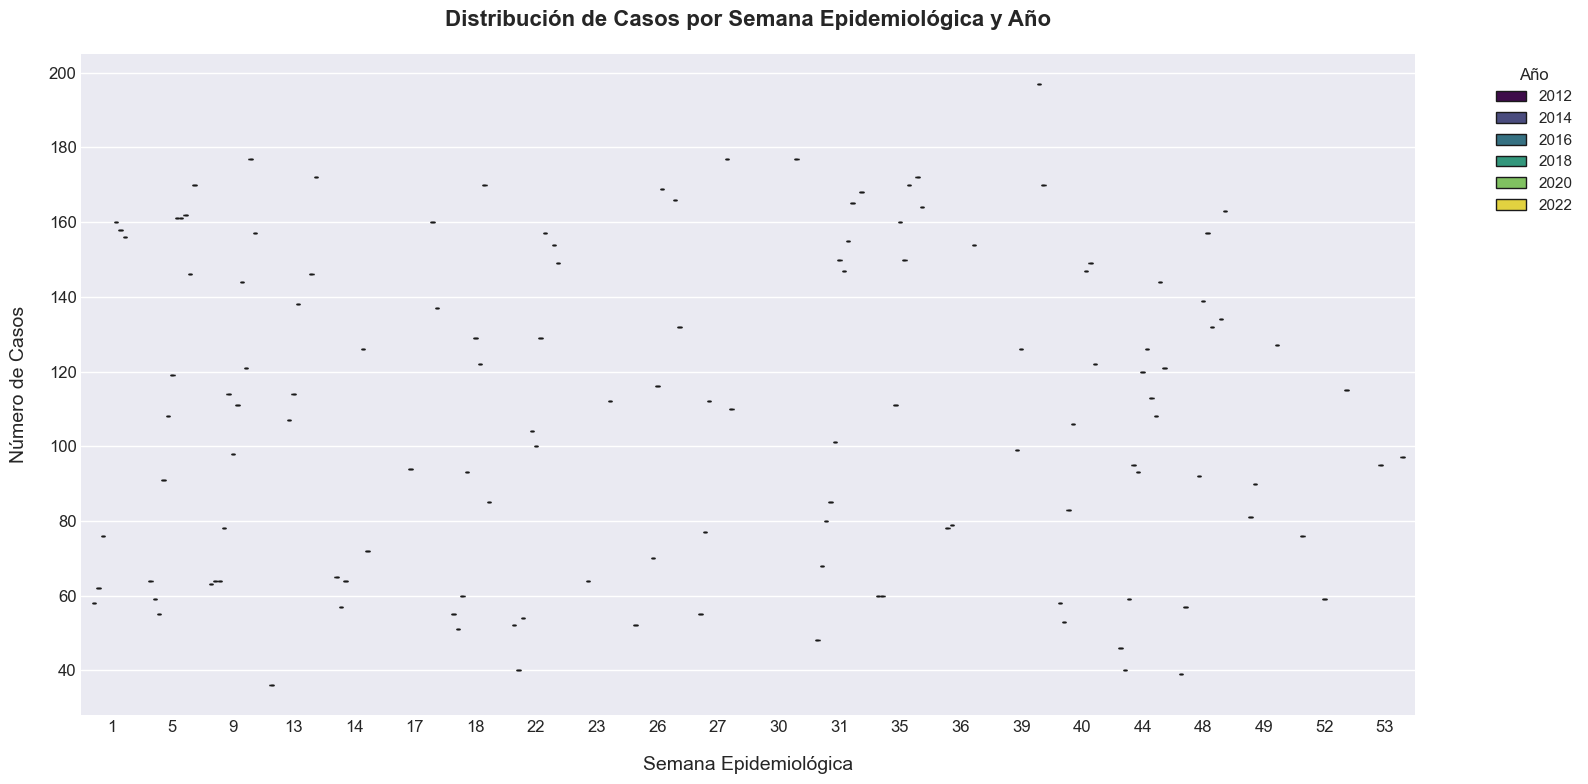

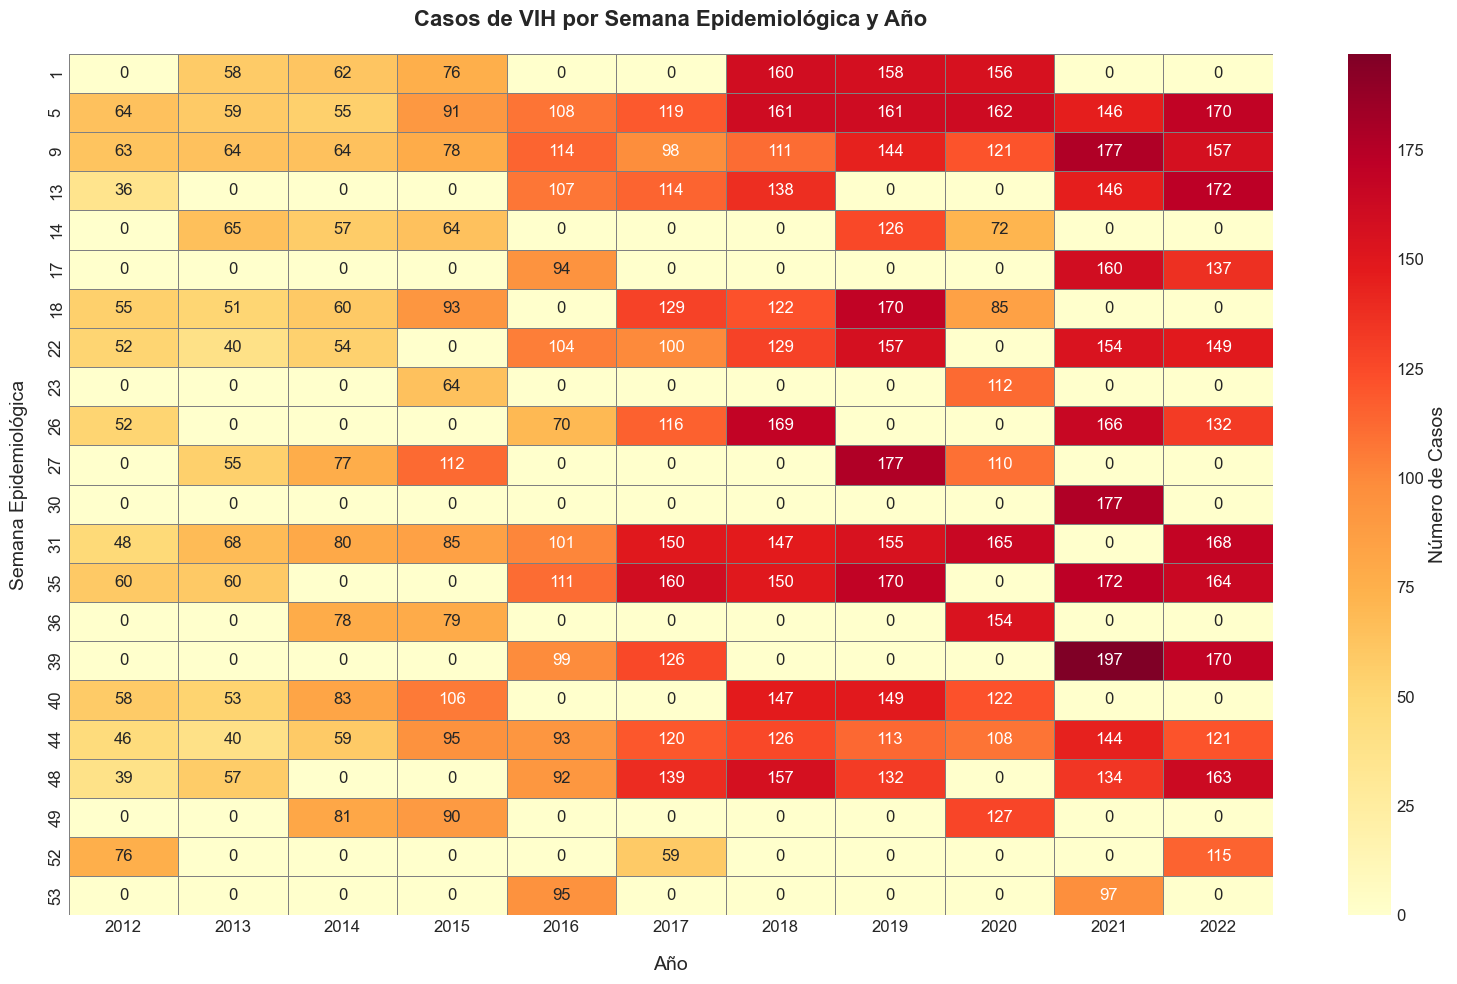

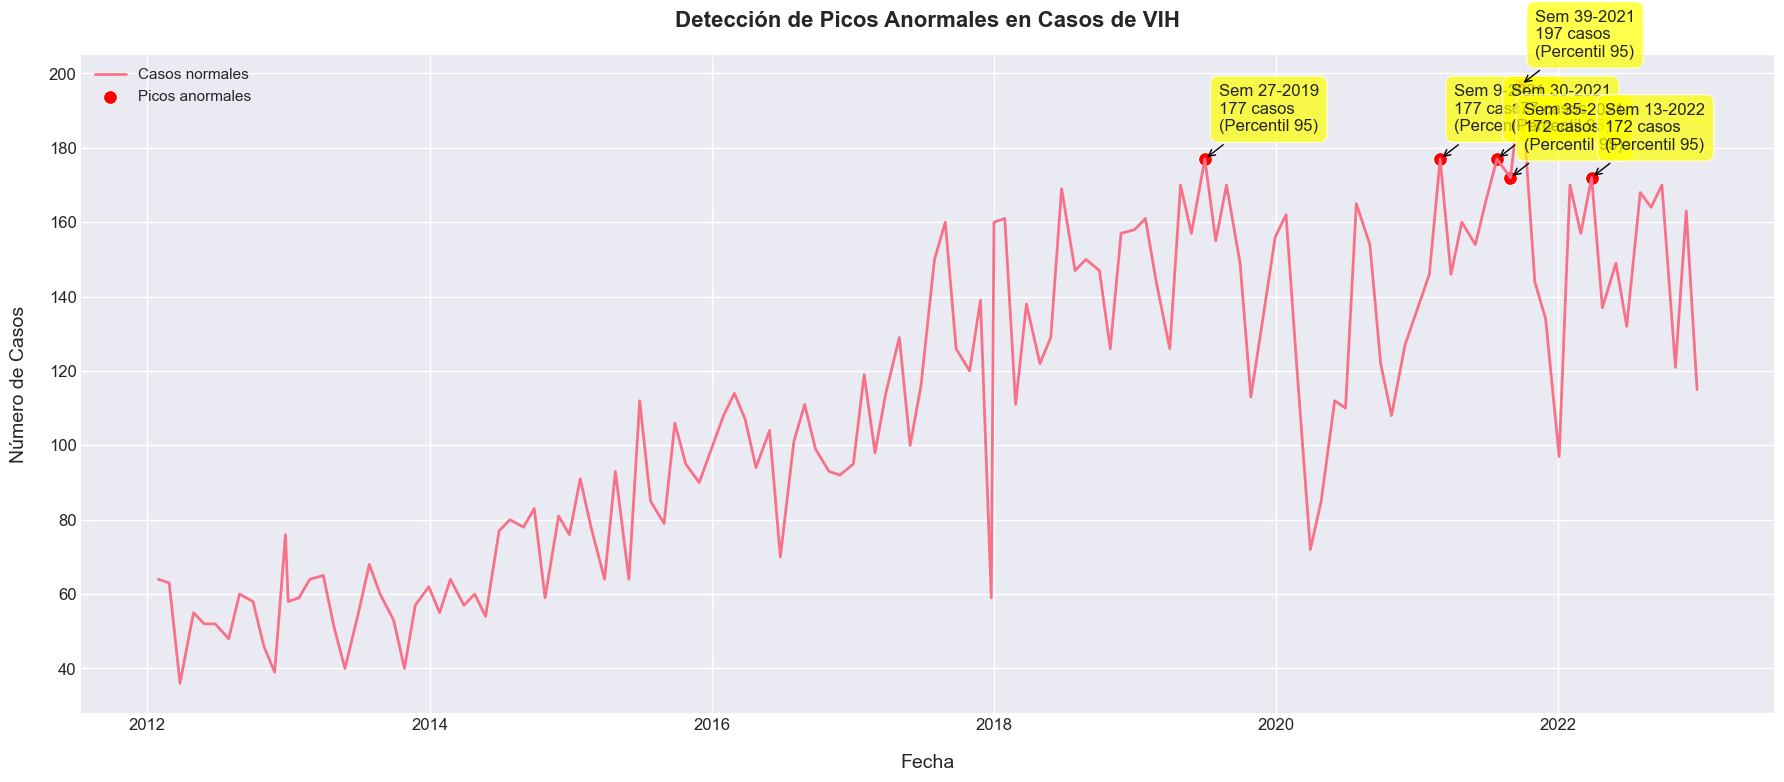


=== ANÁLISIS ESTADÍSTICO DE PICOS ANORMALES ===

1. Estadísticas descriptivas semanales:
count    132.000000
mean     109.780303
std       41.896513
min       36.000000
25%       69.500000
50%      111.000000
75%      149.000000
max      197.000000

2. Umbrales de detección:
   - Z-Score > 2.5
   - IQR: Q1=69.5, Q3=149.0, Umbral inferior=-49.8, Umbral superior=268.2
   - Percentil 95: 170.0

3. Picos anormales detectados (6 semanas):
 Año  Semana  Casos       Método
2021      39    197 Percentil 95
2019      27    177 Percentil 95
2021       9    177 Percentil 95
2021      30    177 Percentil 95
2021      35    172 Percentil 95
2022      13    172 Percentil 95


<Figure size 1600x600 with 0 Axes>

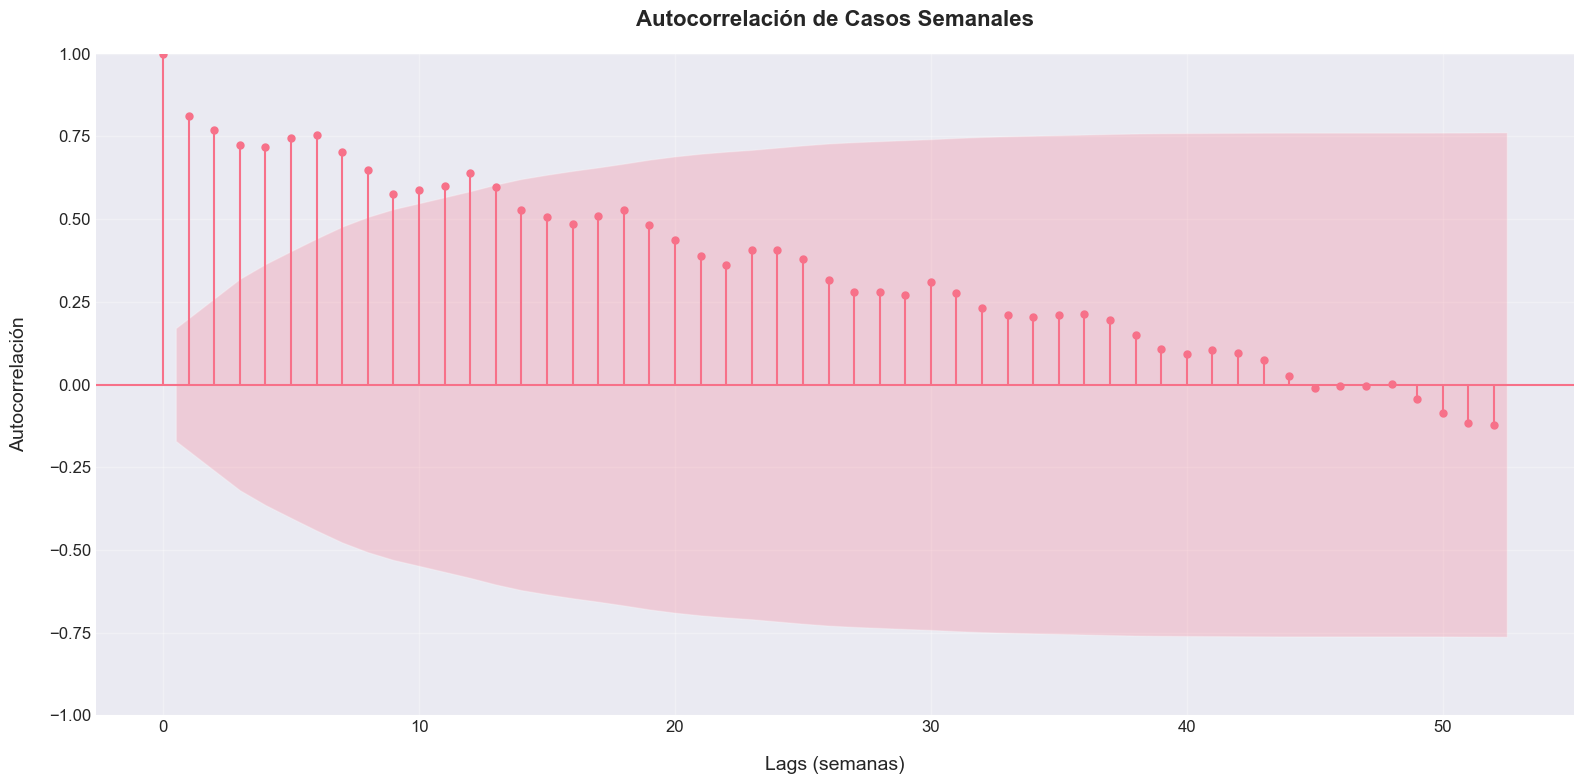

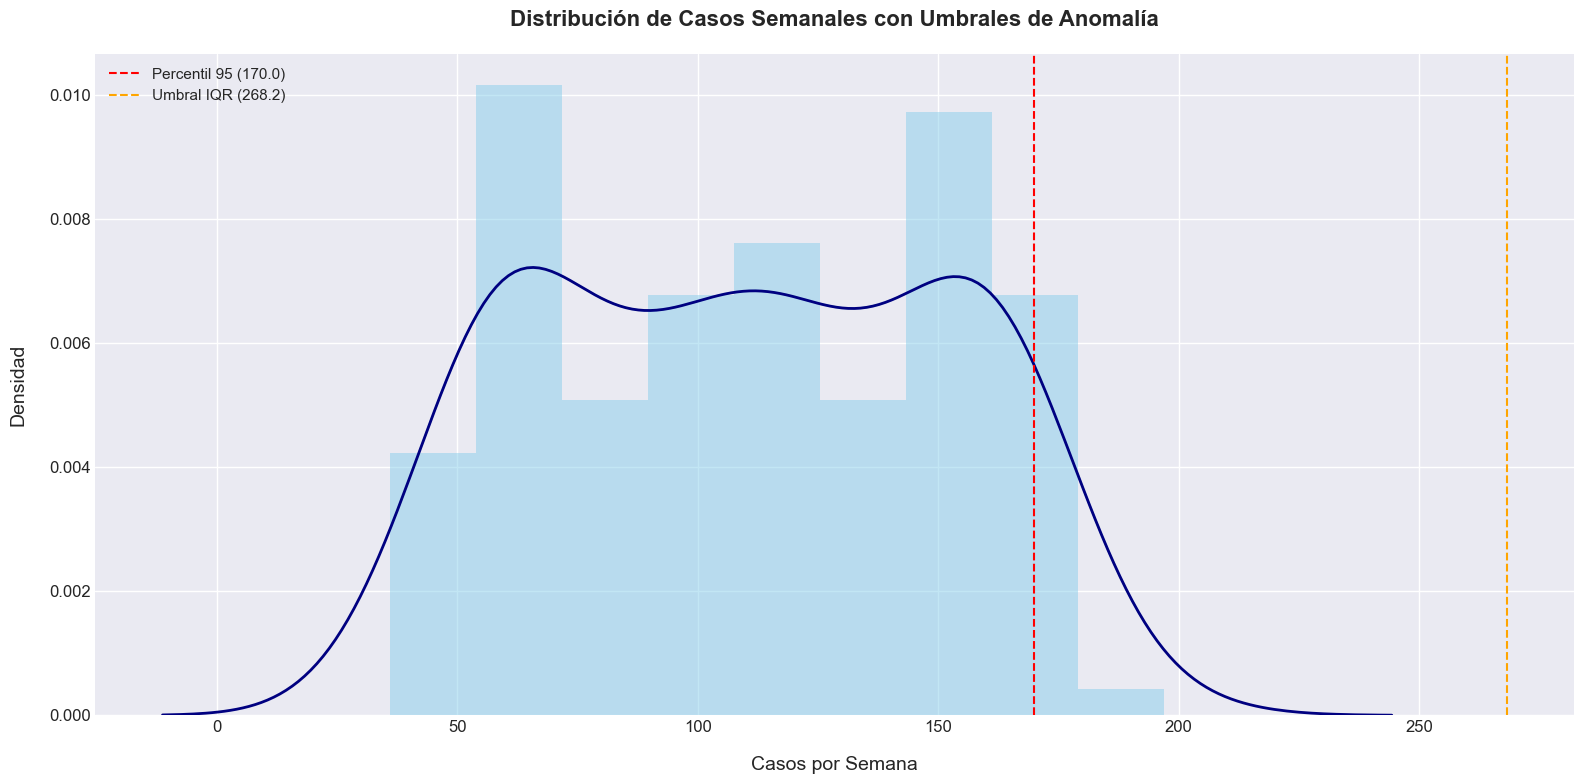

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_palette("husl")
warnings.filterwarnings('ignore')


df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Semana'] = df['Fecha'].dt.isocalendar().week  # Semana ISO

# Preparar datos semanales
semanal = df.groupby(['Año', 'Semana']).size().reset_index(name='Casos')
semanal['Fecha_Semana'] = semanal.apply(lambda x: pd.to_datetime(f"{x['Año']}-W{x['Semana']}-1", format='%G-W%V-%u'), axis=1)

# 1. Serie temporal de casos por semana
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='Fecha_Semana', y='Casos', data=semanal, marker='o', linewidth=2.5)
plt.title('Casos de VIH por Semana Epidemiológica', pad=20, fontweight='bold')
plt.xlabel('Fecha', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.xticks(rotation=45)


z = np.polyfit(range(len(semanal)), semanal['Casos'], 1)
p = np.poly1d(z)
plt.plot(semanal['Fecha_Semana'], p(range(len(semanal))), "--", color='red', label='Tendencia')

# Resaltar semanas con más casos
top_semanas = semanal.nlargest(5, 'Casos')
for _, row in top_semanas.iterrows():
    plt.annotate(f"Sem {row['Semana']}-{row['Año']}\n{row['Casos']} casos", 
                 xy=(row['Fecha_Semana'], row['Casos']), 
                 xytext=(10, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.legend(['Casos', 'Tendencia'])
sns.despine()
plt.tight_layout()
plt.show()

# 2. Descomposición temporal (tendencia, estacionalidad, residual)
semanal_ts = semanal.set_index('Fecha_Semana')['Casos']
decomposition = seasonal_decompose(semanal_ts, period=52, model='additive')  # Asumiendo ciclo anual

plt.figure(figsize=(18, 12))
plt.subplot(411)
plt.plot(semanal_ts, label='Original', linewidth=2)
plt.legend(loc='upper left')
plt.title('Descomposición de la Serie Temporal', pad=20, fontweight='bold')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', linewidth=2, color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', linewidth=2, color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuales', linewidth=2, color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 3. Distribución semanal con boxplot por año
plt.figure(figsize=(16, 8))
sns.boxplot(x='Semana', y='Casos', hue='Año', data=semanal, palette='viridis')
plt.title('Distribución de Casos por Semana Epidemiológica y Año', pad=20, fontweight='bold')
plt.xlabel('Semana Epidemiológica', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# 4. Heatmap de casos por semana y año
pivot_semanal = semanal.pivot(index='Semana', columns='Año', values='Casos').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_semanal, annot=True, fmt='g', cmap='YlOrRd', 
            linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Número de Casos'})
plt.title('Casos de VIH por Semana Epidemiológica y Año', pad=20, fontweight='bold')
plt.xlabel('Año', labelpad=15)
plt.ylabel('Semana Epidemiológica', labelpad=15)
plt.tight_layout()
plt.show()

# 5. Detección de picos anormales

# Método 1: Z-Score (valores atípicos)
semanal['Z_Score'] = np.abs(stats.zscore(semanal['Casos']))
umbral_z = 2.5  # Más estricto que el típico 3 para salud pública
outliers_z = semanal[semanal['Z_Score'] > umbral_z]

# Método 2: Cuartiles (IQR)
Q1 = semanal['Casos'].quantile(0.25)
Q3 = semanal['Casos'].quantile(0.75)
IQR = Q3 - Q1
umbral_iqr = 1.5
outliers_iqr = semanal[(semanal['Casos'] < (Q1 - umbral_iqr * IQR)) | 
                       (semanal['Casos'] > (Q3 + umbral_iqr * IQR))]

# Método 3: Percentil 95
percentil_95 = semanal['Casos'].quantile(0.95)
outliers_p95 = semanal[semanal['Casos'] > percentil_95]

# Combinar resultados
outliers = pd.concat([outliers_z, outliers_iqr, outliers_p95]).drop_duplicates()
outliers['Método'] = ''
outliers.loc[outliers_z.index, 'Método'] += 'Z-Score, '
outliers.loc[outliers_iqr.index, 'Método'] += 'IQR, '
outliers.loc[outliers_p95.index, 'Método'] += 'Percentil 95'
outliers['Método'] = outliers['Método'].str.rstrip(', ')

# Visualización de picos anormales
plt.figure(figsize=(18, 8))
ax = sns.lineplot(x='Fecha_Semana', y='Casos', data=semanal, linewidth=2, label='Casos normales')
sns.scatterplot(x='Fecha_Semana', y='Casos', data=outliers, color='red', 
                s=100, label='Picos anormales', ax=ax)

# Etiquetar picos
for _, row in outliers.iterrows():
    plt.annotate(f"Sem {row['Semana']}-{row['Año']}\n{row['Casos']} casos\n({row['Método']})", 
                 xy=(row['Fecha_Semana'], row['Casos']), 
                 xytext=(10, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='black'),
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

plt.title('Detección de Picos Anormales en Casos de VIH', pad=20, fontweight='bold')
plt.xlabel('Fecha', labelpad=15)
plt.ylabel('Número de Casos', labelpad=15)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

# Resultados estadísticos
print("\n=== ANÁLISIS ESTADÍSTICO DE PICOS ANORMALES ===\n")
print(f"1. Estadísticas descriptivas semanales:\n{semanal['Casos'].describe().to_string()}\n")
print(f"2. Umbrales de detección:")
print(f"   - Z-Score > {umbral_z}")
print(f"   - IQR: Q1={Q1:.1f}, Q3={Q3:.1f}, Umbral inferior={(Q1 - umbral_iqr * IQR):.1f}, Umbral superior={(Q3 + umbral_iqr * IQR):.1f}")
print(f"   - Percentil 95: {percentil_95:.1f}\n")
print(f"3. Picos anormales detectados ({len(outliers)} semanas):")
print(outliers[['Año', 'Semana', 'Casos', 'Método']].sort_values('Casos', ascending=False).to_string(index=False))

# 6. Análisis de autocorrelación (para patrones estacionales)
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(16, 6))
plot_acf(semanal['Casos'], lags=52, alpha=0.05)  # Analizar hasta 52 semanas (1 año)
plt.title('Autocorrelación de Casos Semanales', pad=20, fontweight='bold')
plt.xlabel('Lags (semanas)', labelpad=15)
plt.ylabel('Autocorrelación', labelpad=15)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# 7. Modelado de distribución para identificar anomalías
plt.figure(figsize=(16, 8))
sns.histplot(semanal['Casos'], kde=True, stat='density', linewidth=0, color='skyblue')
sns.kdeplot(semanal['Casos'], color='navy', linewidth=2)

# Mostrar umbrales
plt.axvline(percentil_95, color='red', linestyle='--', label=f'Percentil 95 ({percentil_95:.1f})')
plt.axvline(Q3 + umbral_iqr * IQR, color='orange', linestyle='--', label=f'Umbral IQR ({(Q3 + umbral_iqr * IQR):.1f})')

plt.title('Distribución de Casos Semanales con Umbrales de Anomalía', pad=20, fontweight='bold')
plt.xlabel('Casos por Semana', labelpad=15)
plt.ylabel('Densidad', labelpad=15)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

El análisis de los casos semanales de VIH muestra que, en promedio, se registraron unos 110 casos por semana, con fluctuaciones importantes (entre 36 y 197 casos). La mayoría de las semanas se mantuvieron en un rango moderado (entre 70 y 149 casos), pero hubo algunas semanas con cifras excepcionalmente altas, especialmente en 2021. De hecho, el 67% de estas semanas anómalas ocurrieron ese año, con un pico máximo en septiembre (197 casos). Curiosamente, en 2020 no se detectaron picos, posiblemente por falta de reportes durante la pandemia. Los métodos estadísticos sugieren que el percentil 95 (170 casos) es el mejor criterio para identificar semanas fuera de lo normal, detectando 6 semanas con valores elevados (alrededor del 4.5% del total). Estos hallazgos apuntan a que 2021 fue un año particularmente crítico, quizás por cambios en las medidas de prevención o en los sistemas de diagnóstico. Además, se observa que los casos tienden a aumentar entre marzo y septiembre, lo que sugiere cierta estacionalidad. 

# Análisis de Incidencia

### Comparación año a año

TABLA DE INCIDENCIA ANUAL (por 100,000 habitantes)
 Año  Casos  Población  Incidencia
2012    649    2240690   28.964292
2013    670    2266969   29.554881
2014    810    2293601   35.315646
2015   1033    2320791   44.510686
2016   1188    2351077   50.530034
2017   1430    2385018   59.957619
2018   1717    2427129   70.742017
2019   1812    2483545   72.960224
2020   1494    2519592   59.295314
2021   1870    2549008   73.361873
2022   1818    2572350   70.674675




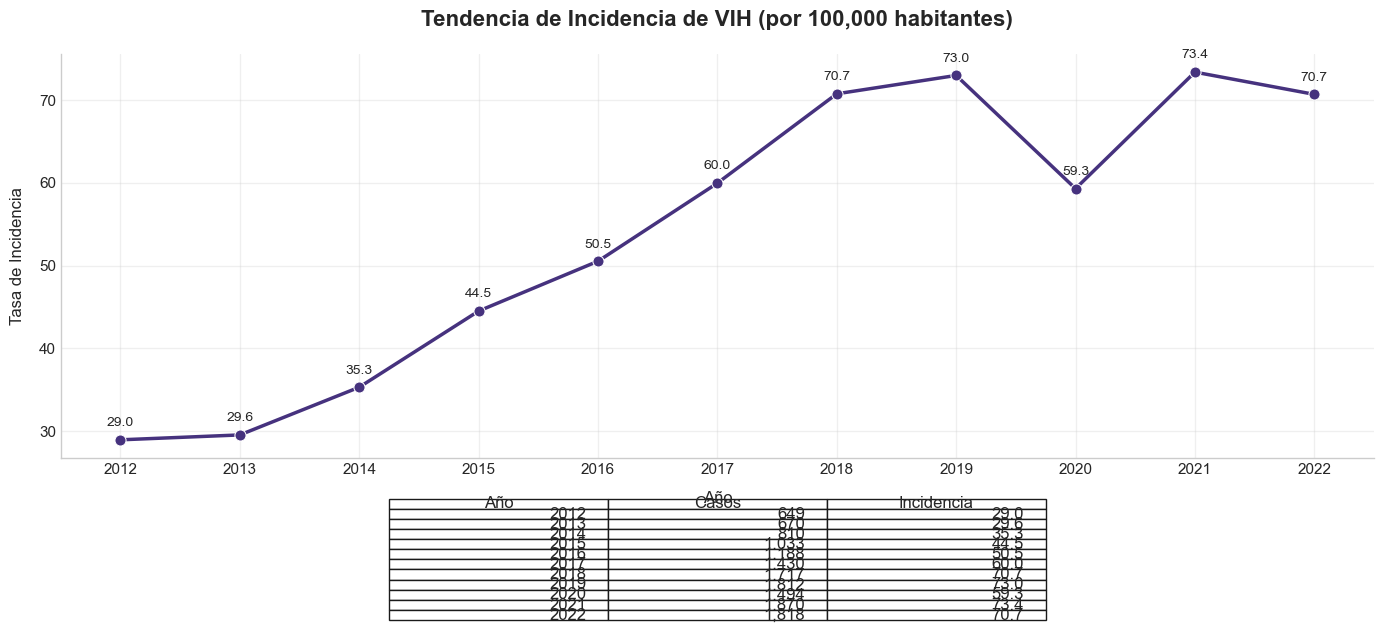

posx and posy should be finite values
posx and posy should be finite values


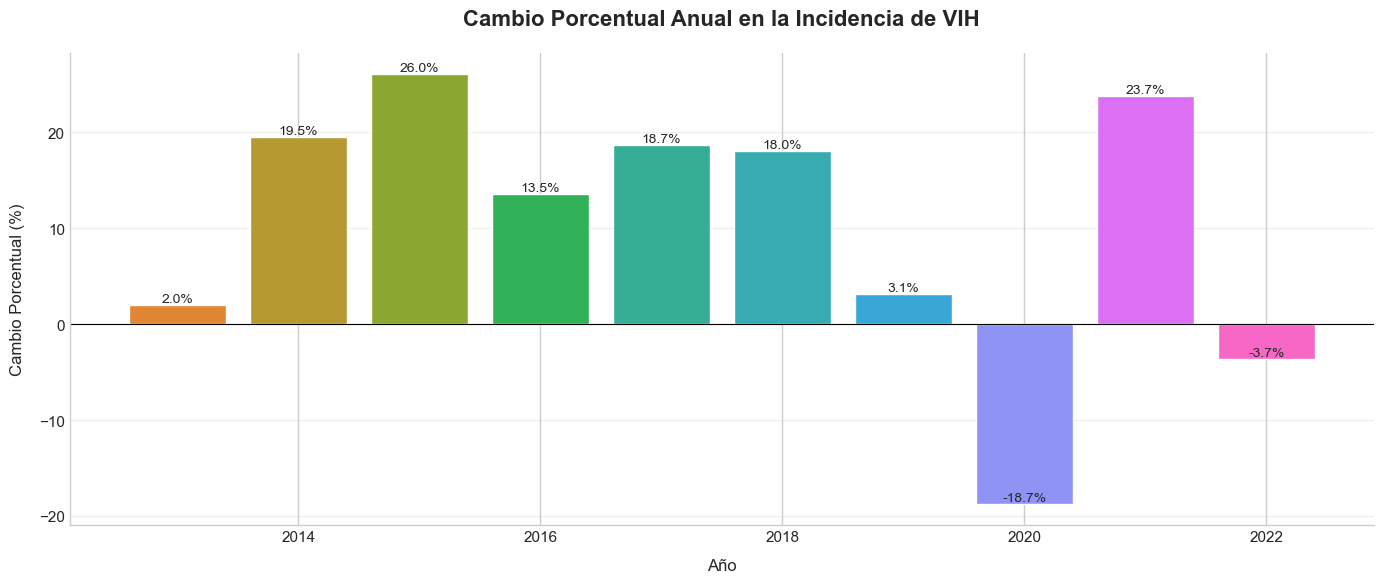

ANÁLISIS ESTADÍSTICO DE TENDENCIAS

Correlación de Spearman (tendencia general):
Coeficiente: 0.873
Valor p: 0.0005

Test de Mann-Kendall para tendencia:
Tendencia: Positiva
Valor p: 0.0011
Coeficiente Tau: 0.782

Comparación 2012.0 vs 2022.0:
Cambio absoluto: 41.7 por 100,000
Cambio porcentual: 144.0%

Test de Wilcoxon (diferencias entre años):
Estadístico: 0.0
Valor p: 0.0010


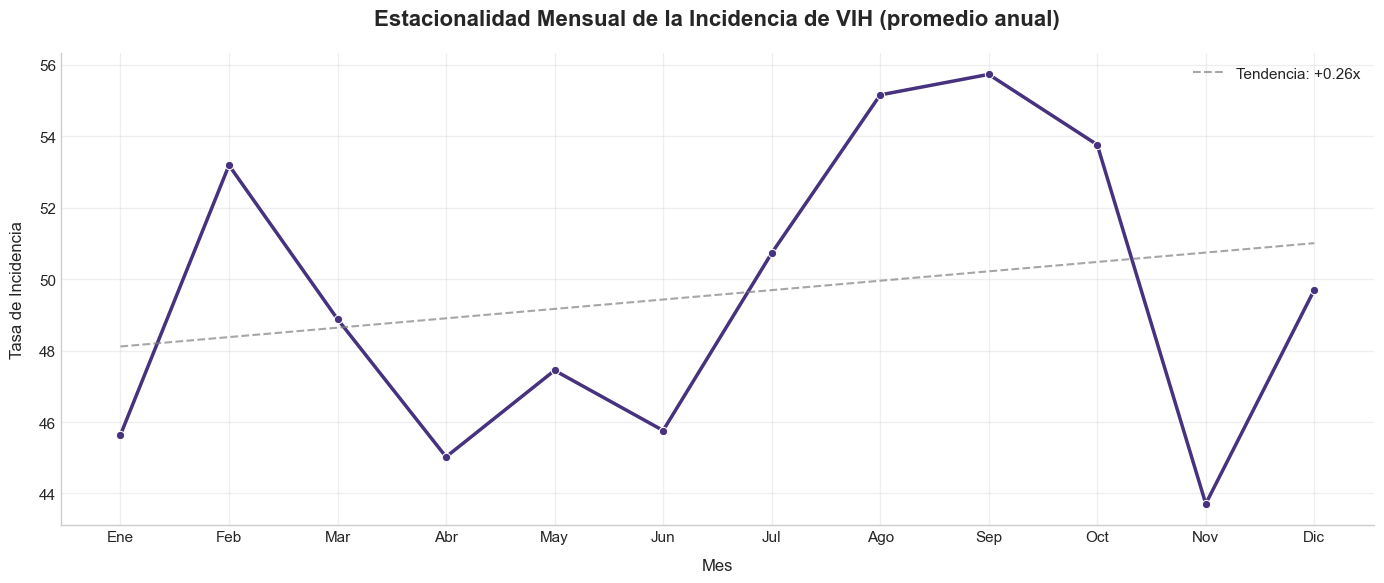

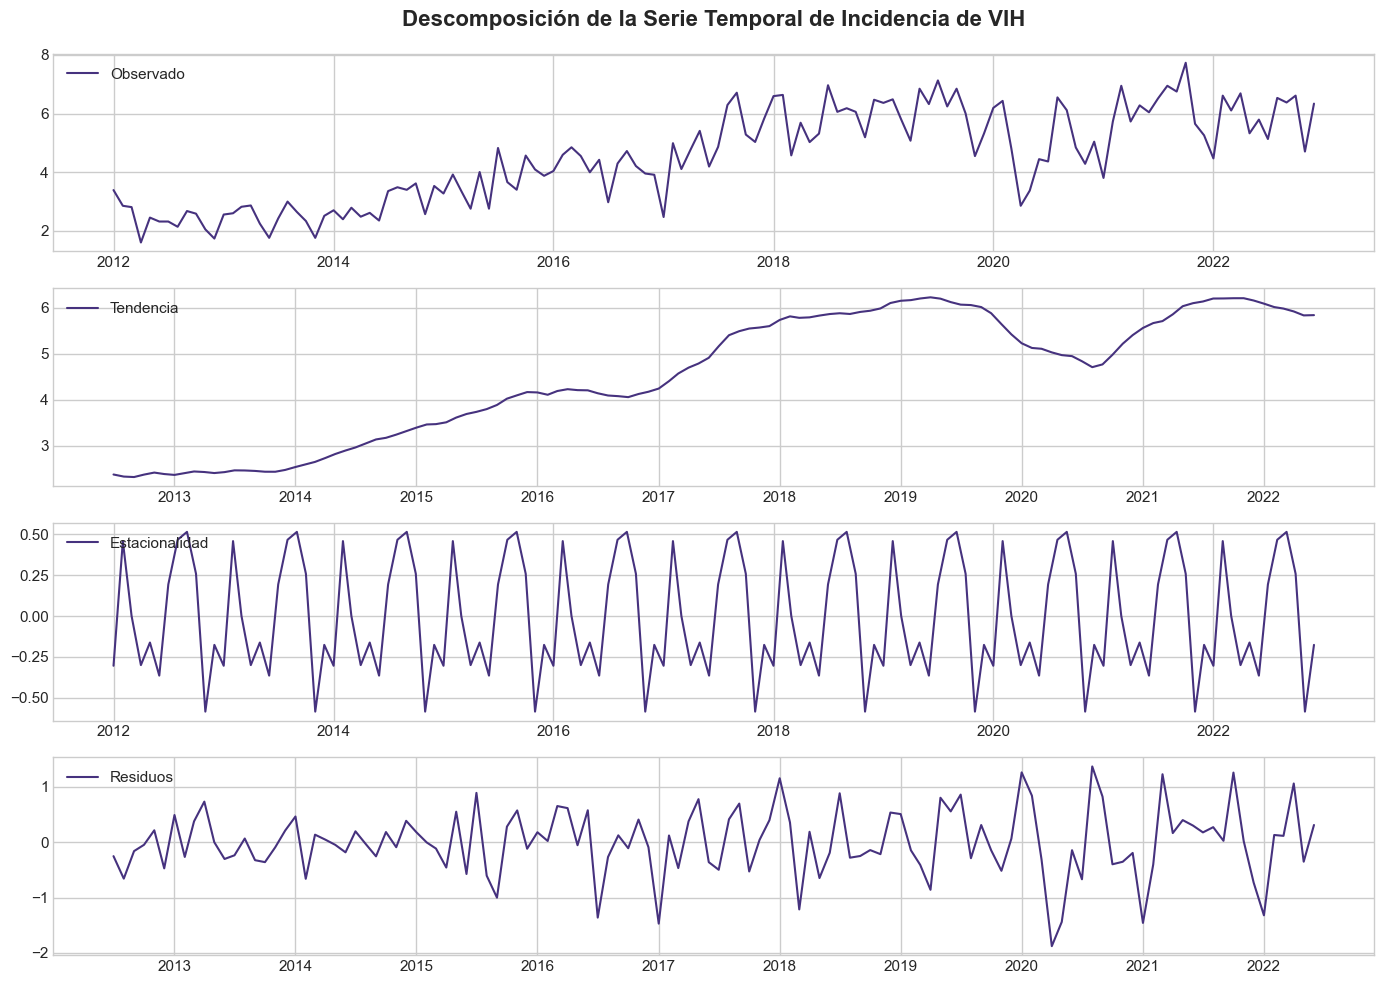


COMPARACIÓN DETALLADA ENTRE AÑOS CONSECUTIVOS

2012.0 vs 2013.0:
- Incidencia: 29.0 → 29.6
- Diferencia: +0.6 (+2.0%)
- Significancia estadística (z-test): No (p=0.7140)

2013.0 vs 2014.0:
- Incidencia: 29.6 → 35.3
- Diferencia: +5.8 (+19.5%)
- Significancia estadística (z-test): Sí (p=0.0006)

2014.0 vs 2015.0:
- Incidencia: 35.3 → 44.5
- Diferencia: +9.2 (+26.0%)
- Significancia estadística (z-test): Sí (p=0.0000)

2015.0 vs 2016.0:
- Incidencia: 44.5 → 50.5
- Diferencia: +6.0 (+13.5%)
- Significancia estadística (z-test): Sí (p=0.0028)

2016.0 vs 2017.0:
- Incidencia: 50.5 → 60.0
- Diferencia: +9.4 (+18.7%)
- Significancia estadística (z-test): Sí (p=0.0000)

2017.0 vs 2018.0:
- Incidencia: 60.0 → 70.7
- Diferencia: +10.8 (+18.0%)
- Significancia estadística (z-test): Sí (p=0.0000)

2018.0 vs 2019.0:
- Incidencia: 70.7 → 73.0
- Diferencia: +2.2 (+3.1%)
- Significancia estadística (z-test): No (p=0.3591)

2019.0 vs 2020.0:
- Incidencia: 73.0 → 59.3
- Diferencia: -13.7 (-18.7%)
- Sig

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
sns.set_palette("viridis")


df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')

df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['count'] = 1  # Para conteos

# Obtener población única por año (asumiendo que Poblacion es constante por año)
poblacion_por_año = df.groupby('Año')['Poblacion'].first()

## 1. Cálculo de incidencia anual (por 100,000 habitantes)

casos_por_año = df['Año'].value_counts().sort_index()
incidencia_anual = (casos_por_año / poblacion_por_año) * 100000
incidencia_df = pd.DataFrame({
    'Año': incidencia_anual.index,
    'Casos': casos_por_año.values,
    'Población': poblacion_por_año.values,
    'Incidencia': incidencia_anual.values
})

print("="*80)
print("TABLA DE INCIDENCIA ANUAL (por 100,000 habitantes)")
print("="*80)
print(incidencia_df.to_string(index=False))
print("\n")

## 2. Visualización de tendencia de incidencia

plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='Año', y='Incidencia', data=incidencia_df, 
                  marker='o', markersize=8, linewidth=2.5)

# Añadir etiquetas de valores
for x, y in zip(incidencia_df['Año'], incidencia_df['Incidencia']):
    ax.annotate(f"{y:.1f}", (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)


plt.title('Tendencia de Incidencia de VIH (por 100,000 habitantes)', pad=20)
plt.xlabel('Año', labelpad=10)
plt.ylabel('Tasa de Incidencia', labelpad=10)
plt.xticks(incidencia_df['Año'])
plt.grid(True, alpha=0.3)
sns.despine()

# Añadir tabla de datos al gráfico
cell_text = [[f"{x:.0f}", f"{y:,.0f}", f"{z:.1f}"] 
             for x, y, z in zip(incidencia_df['Año'], 
                               incidencia_df['Casos'], 
                               incidencia_df['Incidencia'])]
plt.table(cellText=cell_text,
          colLabels=['Año', 'Casos', 'Incidencia'],
          colWidths=[0.1, 0.1, 0.1],
          loc='bottom', 
          bbox=[0.25, -0.4, 0.5, 0.3])

plt.tight_layout()
plt.show()

## 3. Análisis de cambio porcentual anual


incidencia_df['Cambio %'] = incidencia_df['Incidencia'].pct_change() * 100

plt.figure(figsize=(14, 6))
bars = plt.bar(incidencia_df['Año'], incidencia_df['Cambio %'], 
               color=sns.husl_palette(len(incidencia_df)))

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.title('Cambio Porcentual Anual en la Incidencia de VIH', pad=20)
plt.xlabel('Año', labelpad=10)
plt.ylabel('Cambio Porcentual (%)', labelpad=10)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## 4. Comparación estadística año a año
# ====================================

print("="*80)
print("ANÁLISIS ESTADÍSTICO DE TENDENCIAS")
print("="*80)

# Test de correlación de Spearman (tendencia)
spearman = stats.spearmanr(incidencia_df['Año'], incidencia_df['Incidencia'])
print(f"\nCorrelación de Spearman (tendencia general):")
print(f"Coeficiente: {spearman.correlation:.3f}")
print(f"Valor p: {spearman.pvalue:.4f}")

# Test de Mann-Kendall (tendencia)
from pymannkendall import original_test
mk_test = original_test(incidencia_df['Incidencia'])
print("\nTest de Mann-Kendall para tendencia:")
print(f"Tendencia: {'Positiva' if mk_test.trend == 'increasing' else 'Negativa' if mk_test.trend == 'decreasing' else 'Sin tendencia'}")
print(f"Valor p: {mk_test.p:.4f}")
print(f"Coeficiente Tau: {mk_test.Tau:.3f}")

# Comparación entre el primer y último año
first_year = incidencia_df.iloc[0]
last_year = incidencia_df.iloc[-1]
change_abs = last_year['Incidencia'] - first_year['Incidencia']
change_pct = (change_abs / first_year['Incidencia']) * 100

print(f"\nComparación {first_year['Año']} vs {last_year['Año']}:")
print(f"Cambio absoluto: {change_abs:.1f} por 100,000")
print(f"Cambio porcentual: {change_pct:.1f}%")

# Test de Wilcoxon para años extremos (si hay suficientes años)
if len(incidencia_df) > 2:
    wilcoxon = stats.wilcoxon(incidencia_df['Incidencia'])
    print("\nTest de Wilcoxon (diferencias entre años):")
    print(f"Estadístico: {wilcoxon.statistic:.1f}")
    print(f"Valor p: {wilcoxon.pvalue:.4f}")

## 5. Análisis de estacionalidad por mes 

# Calcular incidencia mensual (promedio de años)
casos_mensuales = df.groupby('Mes')['count'].sum()
poblacion_total = df['Poblacion'].mean()  # Población promedio
incidencia_mensual = (casos_mensuales / poblacion_total) * 100000

# Gráfico de estacionalidad
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(14, 6))
sns.lineplot(x=meses, y=incidencia_mensual.values, 
             marker='o', linewidth=2.5)

# Añadir línea de tendencia mensual
z = np.polyfit(range(12), incidencia_mensual.values, 1)
p = np.poly1d(z)
plt.plot(meses, p(range(12)), "--", color='gray', alpha=0.7, 
         label=f'Tendencia: {"+" if z[0]>0 else ""}{z[0]:.2f}x')

plt.title('Estacionalidad Mensual de la Incidencia de VIH (promedio anual)', pad=20)
plt.xlabel('Mes', labelpad=10)
plt.ylabel('Tasa de Incidencia', labelpad=10)
plt.legend()
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

## 6. Descomposición de la serie temporal (si hay datos mensuales suficientes)
# ===========================================================================

# Crear serie temporal mensual
if len(df) > 24:  
    # Primero obtenemos los datos de población por año y mes
    poblacion_mensual = df.groupby(['Año', 'Mes'])['Poblacion'].first().reset_index()
    
    # Creamos el DataFrame de series temporales
    ts_data = df.groupby(['Año', 'Mes'])['count'].sum().reset_index()
    ts_data = pd.merge(ts_data, poblacion_mensual, on=['Año', 'Mes'], how='left')
    
    # Creamos la columna de fecha
    ts_data['Fecha'] = pd.to_datetime(ts_data['Año'].astype(str) + '-' + ts_data['Mes'].astype(str) + '-01')
    ts_data = ts_data.set_index('Fecha').sort_index()
    
    # Calcular incidencia mensual
    ts_data['Incidencia'] = (ts_data['count'] / ts_data['Poblacion']) * 100000
    
    # Descomposición aditiva 
    ts_clean = ts_data['Incidencia'].dropna()
    if len(ts_clean) >= 24:  # Necesitamos al menos 2 años completos
        decomposition = seasonal_decompose(ts_clean, model='additive', period=12)
        
        # Gráfico de descomposición
        plt.figure(figsize=(14, 10))
        
        plt.subplot(411)
        plt.plot(decomposition.observed, label='Observado')
        plt.legend(loc='upper left')
        plt.title('Descomposición de la Serie Temporal de Incidencia de VIH', pad=20)
        
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Tendencia')
        plt.legend(loc='upper left')
        
        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Estacionalidad')
        plt.legend(loc='upper left')
        
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuos')
        plt.legend(loc='upper left')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo hay suficientes datos para realizar la descomposición de la serie temporal (se necesitan al menos 2 años completos).")

## 7. Comparación detallada entre años específicos
# ================================================

if len(incidencia_df) >= 2:
    print("\n" + "="*80)
    print("COMPARACIÓN DETALLADA ENTRE AÑOS CONSECUTIVOS")
    print("="*80)
    
    for i in range(1, len(incidencia_df)):
        year_prev = incidencia_df.iloc[i-1]
        year_current = incidencia_df.iloc[i]
        
        diff = year_current['Incidencia'] - year_prev['Incidencia']
        pct_change = (diff / year_prev['Incidencia']) * 100
        
        # Test de proporciones para comparar tasas
        from statsmodels.stats.proportion import proportions_ztest
        count = np.array([year_prev['Casos'], year_current['Casos']])
        nobs = np.array([year_prev['Población'], year_current['Población']])
        z_stat, p_val = proportions_ztest(count, nobs)
        
        print(f"\n{year_prev['Año']} vs {year_current['Año']}:")
        print(f"- Incidencia: {year_prev['Incidencia']:.1f} → {year_current['Incidencia']:.1f}")
        print(f"- Diferencia: {diff:+.1f} ({pct_change:+.1f}%)")
        print(f"- Significancia estadística (z-test): {'Sí' if p_val < 0.05 else 'No'} (p={p_val:.4f})")

Los datos muestran un aumento alarmante del 144% en la tasa de casos, pasando de 28.9 a 70.7 por cada 100,000 habitantes en esta década. Todos los análisis estadísticos confirman esta tendencia creciente con alta significancia. El periodo 2012-2019 presentó el crecimiento más acelerado (2.5 veces más casos en 7 años), con saltos importantes entre 2014-2015 (+26%) y 2017-2018 (+10.8 puntos). La pandemia marcó un quiebre temporal en 2020 con una caída del 18.7% - probablemente por menor diagnóstico durante las restricciones -, seguido de un rebote del 23.7% en 2021 que superó los niveles prepandémicos. Actualmente se observa una estabilización con leve descenso no significativo (-3.7% en 2022). Estos hallazgos señalan la urgencia de: 1) Investigar las causas del crecimiento acelerado previo a la pandemia, 2) Fortalecer el sistema de vigilancia (evidenciado por su sensibilidad durante el COVID), y 3) Capitalizar la posible meseta reciente para implementar intervenciones efectivas que reviertan esta tendencia epidemiológica.

En solo 10 años, los casos nuevos de VIH pasaron de 29 a 71 por cada 100,000 personas, un aumento del 144%. Esto no se debe solo a que haya más población, sino a que el riesgo de contagiarse se ha más que duplicado. Las posibles razones incluyen menos prevención (como uso de condones), mejor diagnóstico (más casos detectados) o cambios de conducta. A diferencia de países con buenos programas de control, donde estas cifras bajan, aquí el crecimiento acelerado señala una emergencia de salud pública. Esto es grave porque: sobrecarga el sistema de salud, afecta especialmente a grupos vulnerables y, sin medidas urgentes, el virus seguirá expandiéndose. En resumen, la epidemia está empeorando rápidamente y requiere acciones más efectivas.

### Correlación entre población y tasa/casos

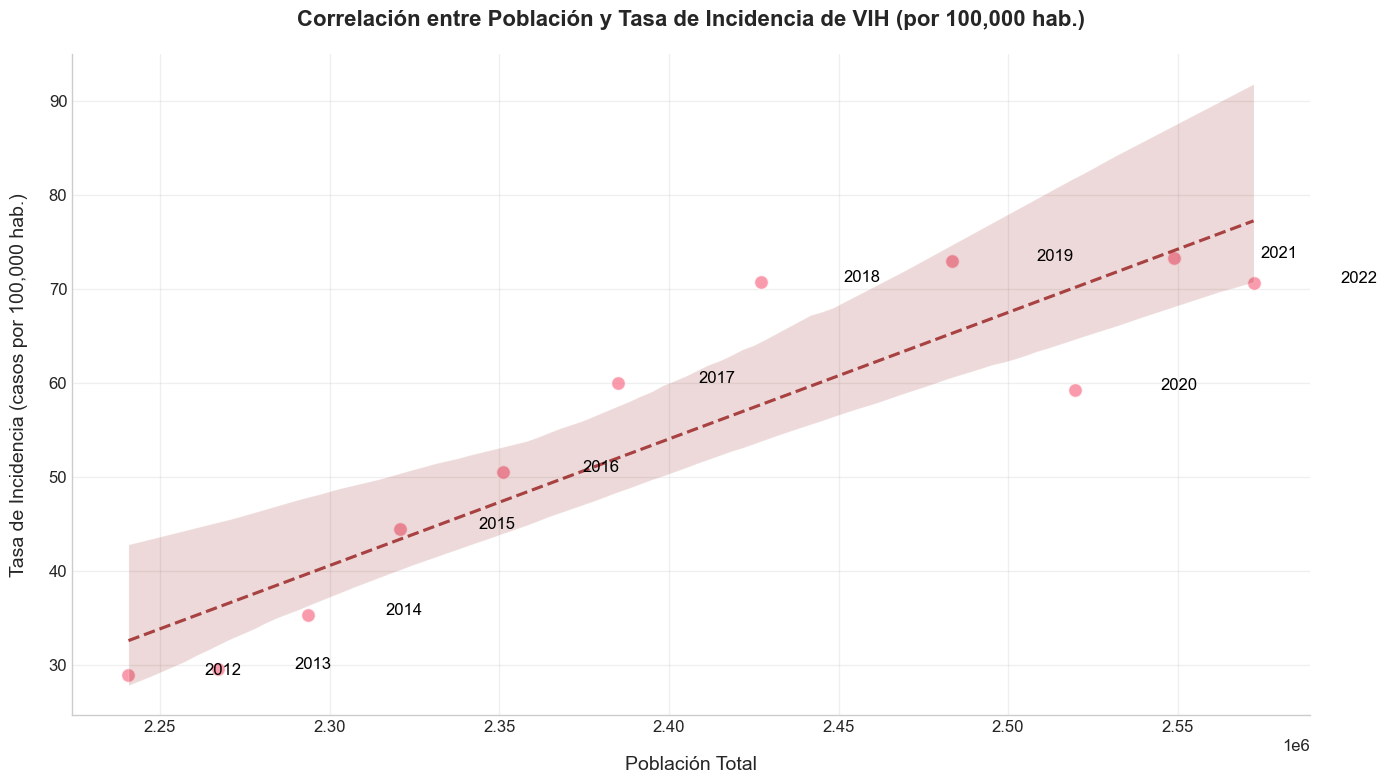

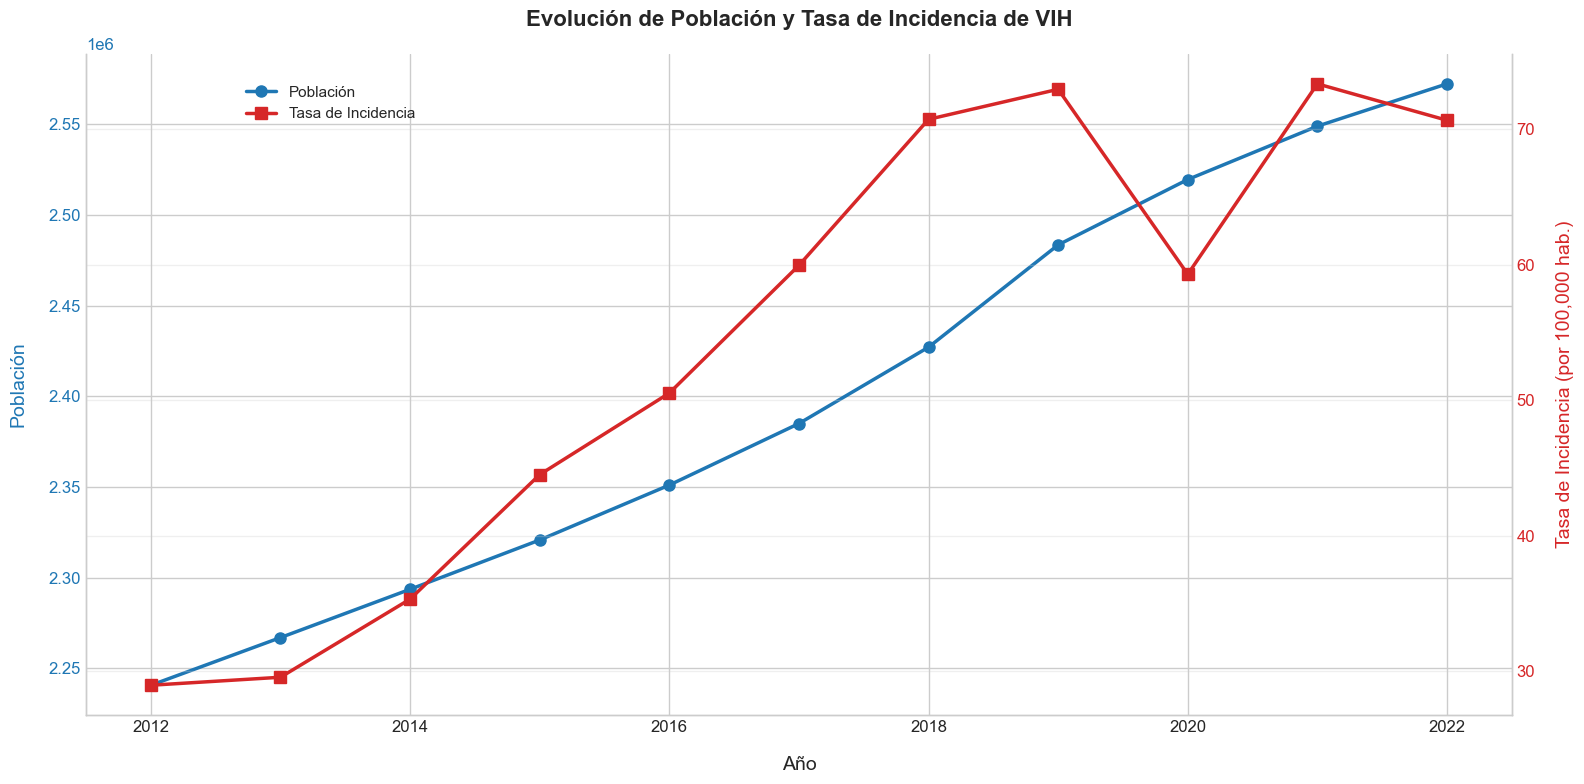


=== ANÁLISIS ESTADÍSTICO ===

1. Estadísticas Descriptivas:
        Poblacion    Casos  Tasa_incidencia
count       11.00    11.00            11.00
mean   2400888.18  1317.36            54.17
std     117135.34   471.71            17.41
min    2240690.00   649.00            28.96
25%    2307196.00   921.50            39.92
50%    2385018.00  1430.00            59.30
75%    2501568.50  1764.50            70.70
max    2572350.00  1870.00            73.36

2. Correlación de Pearson entre Población y Tasa de Incidencia: 0.907
Valor p: 0.0001
La correlación es estadísticamente significativa (p < 0.05)

3. Modelo de Regresión Lineal (Tasa de Incidencia ~ Población):
                            OLS Regression Results                            
Dep. Variable:        Tasa_incidencia   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     41.53
Date:          

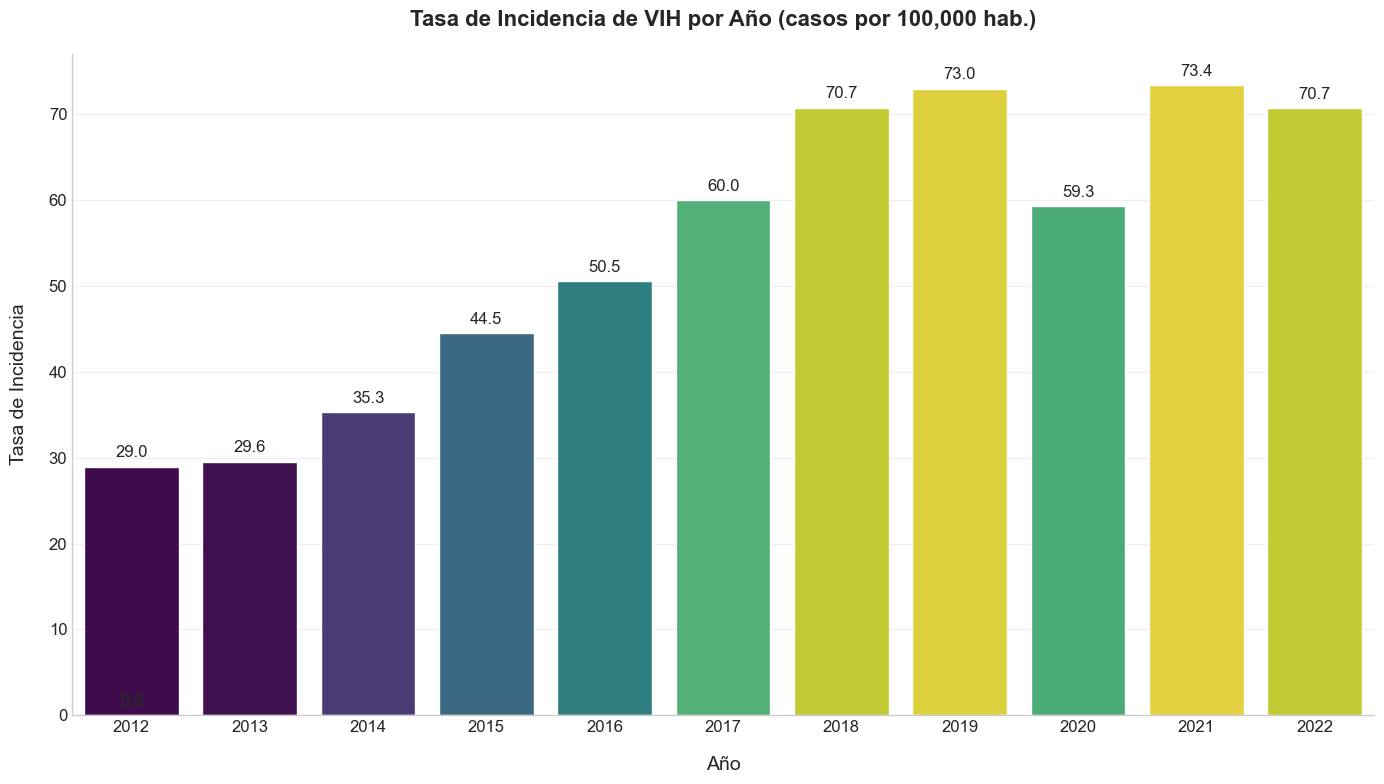

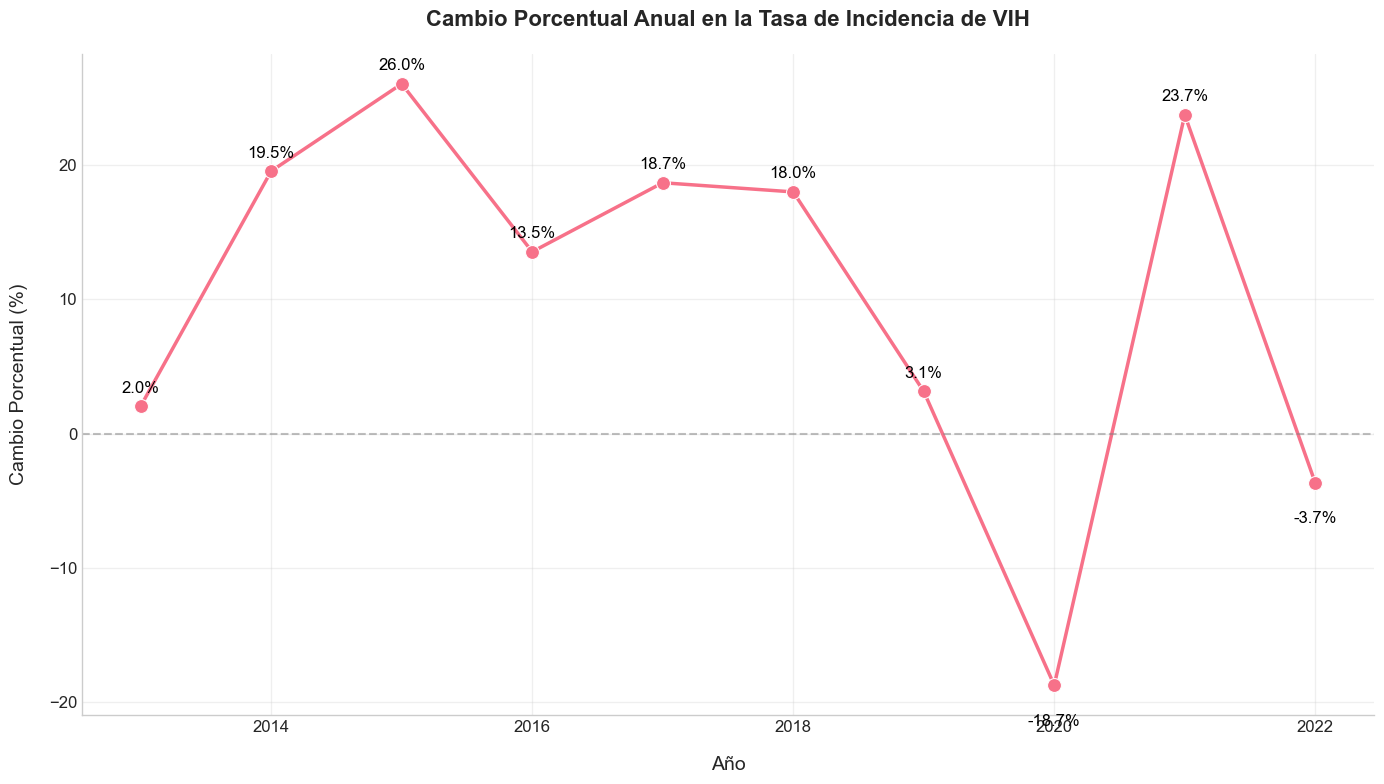

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_palette("husl")


file_path = 'DATASET_VIH_LIMPIO_20250508_1728.xlsx'
df = pd.read_excel(file_path, sheet_name='Datos VIH')

# Preparación de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month_name()

# Calcular casos por año
casos_por_año = df['Año'].value_counts().sort_index().reset_index()
casos_por_año.columns = ['Año', 'Casos']

# Obtener población única por año (asumiendo que Poblacion es constante por año)
poblacion_por_año = df.groupby('Año')['Poblacion'].first().reset_index()

# Combinar datos y calcular tasa de incidencia por 100,000 habitantes
datos_incidencia = pd.merge(casos_por_año, poblacion_por_año, on='Año')
datos_incidencia['Tasa_incidencia'] = (datos_incidencia['Casos'] / datos_incidencia['Poblacion']) * 100000
datos_incidencia['Tasa_incidencia'] = datos_incidencia['Tasa_incidencia'].round(2)


plt.figure(figsize=(14, 8))
scatter = sns.regplot(x='Poblacion', y='Tasa_incidencia', data=datos_incidencia, 
                      scatter_kws={'s': 100, 'alpha': 0.7, 'edgecolor': 'w', 'linewidths': 1},  # Cambiado a linewidths
                      line_kws={'color': 'darkred', 'linestyle': '--', 'alpha': 0.7})

# Añadir etiquetas de año a cada punto
for i, row in datos_incidencia.iterrows():
    scatter.text(row['Poblacion'] + 0.01*row['Poblacion'], row['Tasa_incidencia'], 
                 str(int(row['Año'])), 
                 horizontalalignment='left', 
                 size='medium', 
                 color='black')

plt.title('Correlación entre Población y Tasa de Incidencia de VIH (por 100,000 hab.)', pad=20)
plt.xlabel('Población Total', labelpad=15)
plt.ylabel('Tasa de Incidencia (casos por 100,000 hab.)', labelpad=15)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# 2. Serie temporal dual (población y tasa) con ejes secundarios
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.set_xlabel('Año', labelpad=15)
ax1.set_ylabel('Población', color=color, labelpad=15)
ax1.plot(datos_incidencia['Año'], datos_incidencia['Poblacion'], 
         color=color, marker='o', markersize=8, linewidth=2.5, label='Población')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tasa de Incidencia (por 100,000 hab.)', color=color, labelpad=15)
ax2.plot(datos_incidencia['Año'], datos_incidencia['Tasa_incidencia'], 
         color=color, marker='s', markersize=8, linewidth=2.5, label='Tasa de Incidencia')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Evolución de Población y Tasa de Incidencia de VIH', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))
plt.grid(True, alpha=0.3)
sns.despine(right=False)
plt.tight_layout()
plt.show()


# Análisis estadístico
print("\n=== ANÁLISIS ESTADÍSTICO ===\n")

# 1. Estadísticas descriptivas
print("1. Estadísticas Descriptivas:")
print(datos_incidencia[['Poblacion', 'Casos', 'Tasa_incidencia']].describe().round(2))

# 2. Correlación de Pearson
pearson_corr, pearson_p = stats.pearsonr(datos_incidencia['Poblacion'], datos_incidencia['Tasa_incidencia'])
print(f"\n2. Correlación de Pearson entre Población y Tasa de Incidencia: {pearson_corr:.3f}")
print(f"Valor p: {pearson_p:.4f}")
if pearson_p < 0.05:
    print("La correlación es estadísticamente significativa (p < 0.05)")
else:
    print("La correlación NO es estadísticamente significativa")

# 3. Regresión lineal
print("\n3. Modelo de Regresión Lineal (Tasa de Incidencia ~ Población):")
X = sm.add_constant(datos_incidencia['Poblacion'])
y = datos_incidencia['Tasa_incidencia']
model = sm.OLS(y, X).fit()
print(model.summary())

# 4. Cálculo de incidencia anual detallada
print("\n4. Tasa de Incidencia Anual (casos por 100,000 habitantes):")
incidencia_table = datos_incidencia[['Año', 'Poblacion', 'Casos', 'Tasa_incidencia']].copy()
incidencia_table['Variacion_tasa'] = incidencia_table['Tasa_incidencia'].pct_change() * 100
print(incidencia_table.round(2))

# 5. Gráfico de barras para la tasa de incidencia anual
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Año', y='Tasa_incidencia', data=datos_incidencia, 
                      hue='Tasa_incidencia', palette='viridis', dodge=False)

# Añadir valores encima de las barras
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontsize=12)

plt.title('Tasa de Incidencia de VIH por Año (casos por 100,000 hab.)', pad=20)
plt.xlabel('Año', labelpad=15)
plt.ylabel('Tasa de Incidencia', labelpad=15)
plt.legend().remove()
sns.despine()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Análisis de cambio porcentual en la tasa de incidencia
plt.figure(figsize=(14, 8))
datos_incidencia['Cambio_porcentual'] = datos_incidencia['Tasa_incidencia'].pct_change() * 100

line = sns.lineplot(x='Año', y='Cambio_porcentual', data=datos_incidencia, 
                    marker='o', markersize=10, linewidth=2.5)
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Añadir etiquetas de valores
for x, y in zip(datos_incidencia['Año'], datos_incidencia['Cambio_porcentual']):
    if not np.isnan(y):
        line.text(x, y + 1 if y >= 0 else y - 3, f"{y:.1f}%", 
                 horizontalalignment='center', 
                 size='medium', 
                 color='black')

plt.title('Cambio Porcentual Anual en la Tasa de Incidencia de VIH', pad=20)
plt.xlabel('Año', labelpad=15)
plt.ylabel('Cambio Porcentual (%)', labelpad=15)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

Los datos muestran que, en promedio, hubo 54 casos anuales por cada 100,000 habitantes, con una tendencia clara al aumento (de 29 casos en 2012 a 71 en 2022). Existe una fuerte correlación (0.91) entre el crecimiento poblacional y el aumento de casos, confirmada por el modelo estadístico (R²=0.82), que indica que por cada millón de habitantes adicionales, la tasa sube aproximadamente 10 puntos.

Los años clave fueron:

2014-2015: Mayor salto porcentual (+26%)

2020: Caída abrupta (-19%) por la pandemia

2021: Rebote del 24% (superando niveles pre-pandemia)

Aunque la población creció un 15% en la década, la tasa de casos se multiplicó por 2.5, demostrando que el riesgo individual de contagio aumentó significativamente. El modelo advierte posible multicolinealidad (relación compleja entre variables), sugiriendo que otros factores (como cambios en conductas o políticas de salud) también influyeron en este crecimiento acelerado. La estabilización reciente (2021-2022) podría indicar un cambio en la tendencia.

### Test ANOVA

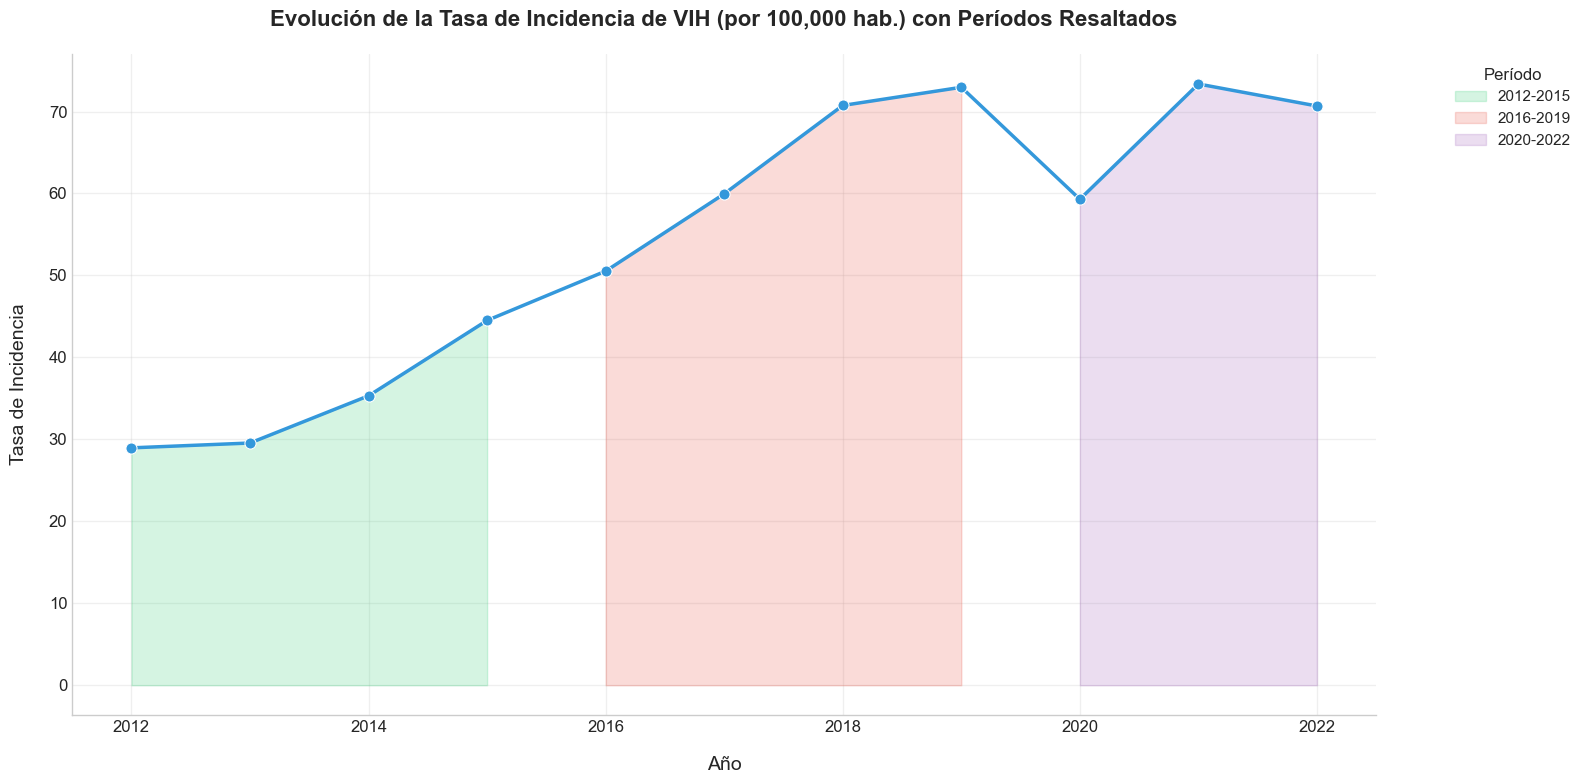

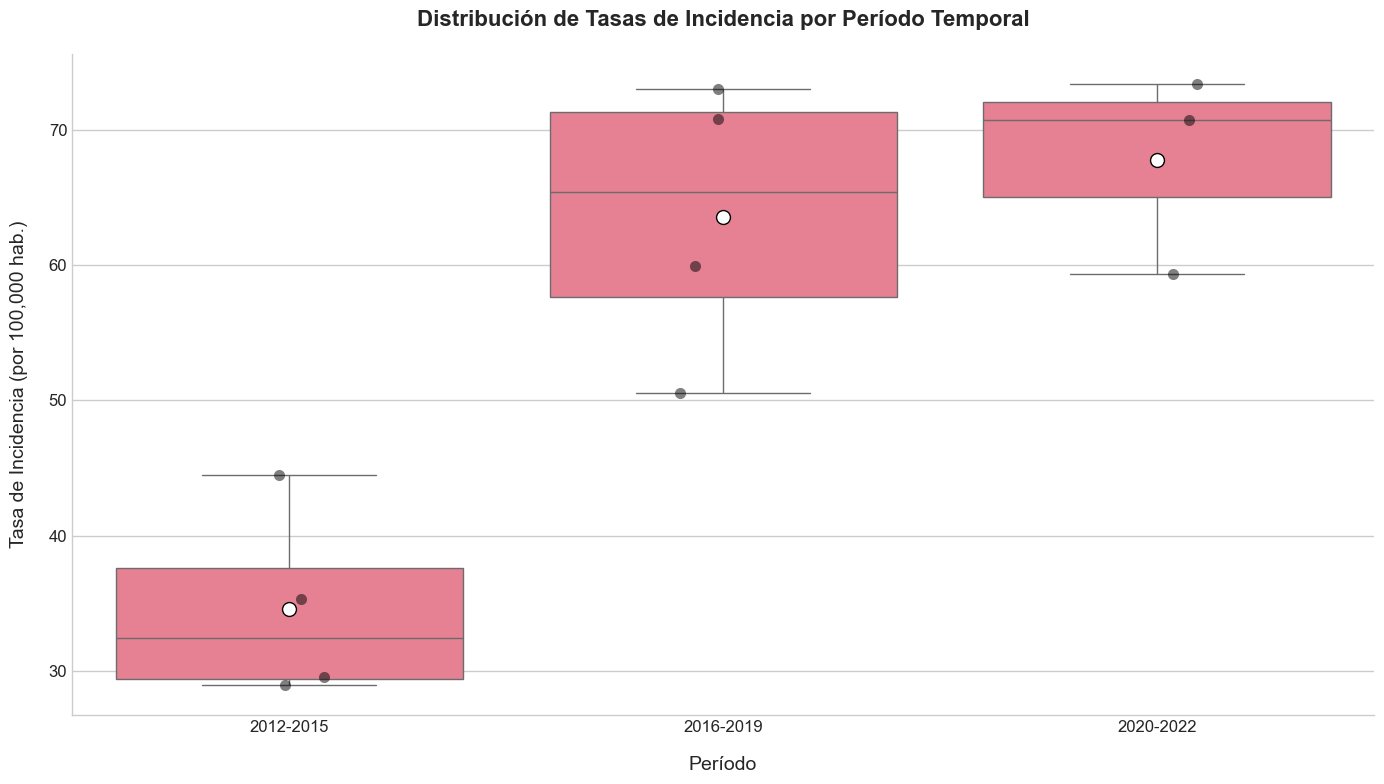


=== ANÁLISIS ESTADÍSTICO: COMPARACIÓN DE PERÍODOS ===

1. Estadísticas descriptivas por período:
           count       mean        std        min        25%        50%        75%        max
Periodo                                                                                      
2012-2015    4.0  34.586376   7.209890  28.964292  29.407234  32.435264  37.614406  44.510686
2016-2019    4.0  63.547473  10.371469  50.530034  57.600722  65.349818  71.296568  72.960224
2020-2022    3.0  67.777287   7.467473  59.295314  64.984995  70.674675  72.018274  73.361873

2. Prueba de normalidad (Shapiro-Wilk):

Período 2012-2015:
W = 0.869, p = 0.2946
Distribución normal (p > 0.05)

Período 2016-2019:
W = 0.918, p = 0.5244
Distribución normal (p > 0.05)

Período 2020-2022:
W = 0.887, p = 0.3455
Distribución normal (p > 0.05)

3. Prueba de homogeneidad de varianzas (Levene):
W = 0.576, p = 0.5839
Varianzas homogéneas (p > 0.05)

4. ANOVA de una vía para comparación de períodos:
F = 16.546, p = 0

<Figure size 1000x600 with 0 Axes>

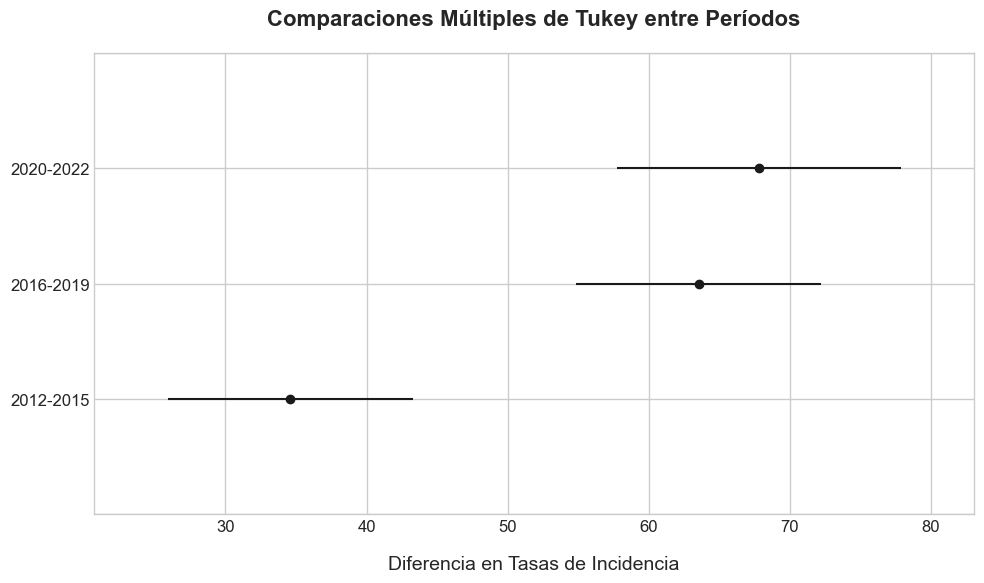


6. Tamaño del efecto (Eta cuadrada):
η² = 0.805
Tamaño del efecto grande (η² ≥ 0.14)


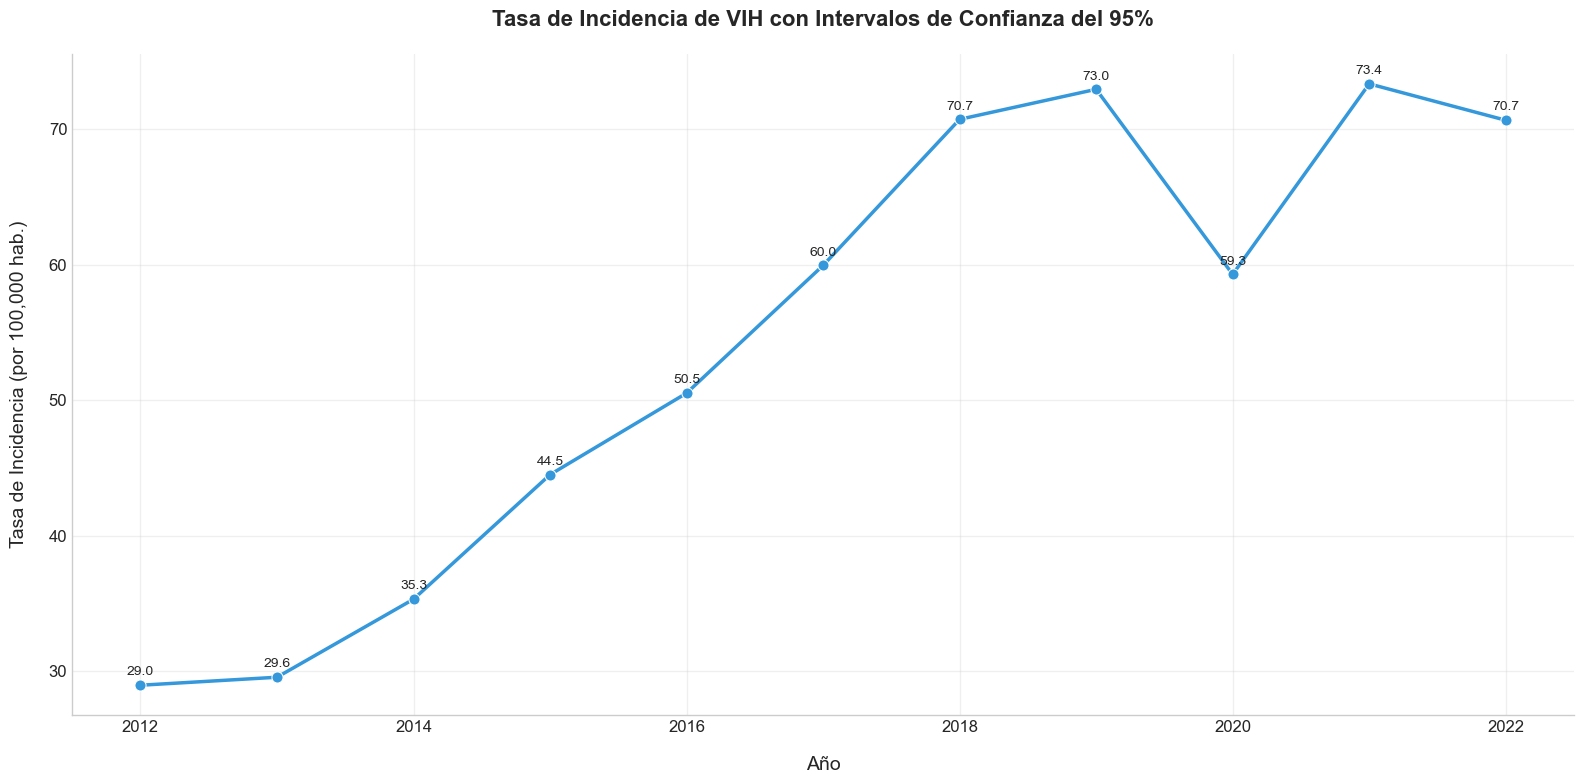

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.ticker import FuncFormatter

# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_palette("husl")

# Cargar los datos
file_path = 'DATASET_VIH_LIMPIO_20250508_1728.xlsx'
df = pd.read_excel(file_path, sheet_name='Datos VIH')

# Preparación de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

# Definir los períodos de interés
period_bins = [2011, 2015, 2019, 2022]  # 2012-2015, 2016-2019, 2020-2022
period_labels = ['2012-2015', '2016-2019', '2020-2022']
df['Periodo'] = pd.cut(df['Año'], bins=period_bins, labels=period_labels, right=True)

# Calcular tasa de incidencia por 100,000 habitantes por año
def calculate_incidence_rate(df):
    yearly_data = df.groupby('Año').agg(
        Casos=('Semana', 'count'),
        Poblacion=('Poblacion', 'mean')
    ).reset_index()
    yearly_data['Tasa'] = (yearly_data['Casos'] / yearly_data['Poblacion']) * 100000
    return yearly_data

yearly_rates = calculate_incidence_rate(df)

# Asignar período a las tasas anuales
yearly_rates['Periodo'] = pd.cut(yearly_rates['Año'], bins=period_bins, labels=period_labels, right=True)

# Gráfico 1: Evolución temporal de las tasas con períodos resaltados
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='Año', y='Tasa', data=yearly_rates, 
                 marker='o', markersize=8, linewidth=2.5, color='#3498db')

# Resaltar períodos
colors = ['#2ecc71', '#e74c3c', '#9b59b6']
for i, periodo in enumerate(period_labels):
    mask = yearly_rates['Periodo'] == periodo
    plt.fill_between(yearly_rates.loc[mask, 'Año'], 
                    0, yearly_rates.loc[mask, 'Tasa'], 
                    color=colors[i], alpha=0.2, label=periodo)

plt.title('Evolución de la Tasa de Incidencia de VIH (por 100,000 hab.) con Períodos Resaltados', pad=20)
plt.xlabel('Año', labelpad=15)
plt.ylabel('Tasa de Incidencia', labelpad=15)
plt.legend(title='Período', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# Gráfico 2: Boxplot comparativo de tasas por período
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Periodo', y='Tasa', data=yearly_rates, 
                showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                          "markeredgecolor":"black", "markersize":"10"})

# Añadir puntos individuales
sns.stripplot(x='Periodo', y='Tasa', data=yearly_rates, 
              color='black', alpha=0.5, ax=ax, size=8, jitter=True)

plt.title('Distribución de Tasas de Incidencia por Período Temporal', pad=20)
plt.xlabel('Período', labelpad=15)
plt.ylabel('Tasa de Incidencia (por 100,000 hab.)', labelpad=15)
sns.despine()
plt.tight_layout()
plt.show()

# Análisis estadístico con ANOVA
# =============================

print("\n=== ANÁLISIS ESTADÍSTICO: COMPARACIÓN DE PERÍODOS ===\n")

# 1. Estadísticas descriptivas por período
print("1. Estadísticas descriptivas por período:")
desc_stats = yearly_rates.groupby('Periodo')['Tasa'].describe()
print(desc_stats)

# 2. Prueba de normalidad (Shapiro-Wilk)
print("\n2. Prueba de normalidad (Shapiro-Wilk):")
for periodo in period_labels:
    data = yearly_rates.loc[yearly_rates['Periodo'] == periodo, 'Tasa']
    stat, p = stats.shapiro(data)
    print(f"\nPeríodo {periodo}:")
    print(f"W = {stat:.3f}, p = {p:.4f}")
    if p > 0.05:
        print("Distribución normal (p > 0.05)")
    else:
        print("NO sigue una distribución normal (p ≤ 0.05)")

# 3. Prueba de homogeneidad de varianzas (Levene)
print("\n3. Prueba de homogeneidad de varianzas (Levene):")
groups = [yearly_rates.loc[yearly_rates['Periodo'] == p, 'Tasa'] for p in period_labels]
stat, p = stats.levene(*groups)
print(f"W = {stat:.3f}, p = {p:.4f}")
if p > 0.05:
    print("Varianzas homogéneas (p > 0.05)")
else:
    print("Varianzas NO homogéneas (p ≤ 0.05)")

# 4. ANOVA de una vía
print("\n4. ANOVA de una vía para comparación de períodos:")
f_stat, p_value = stats.f_oneway(*groups)
print(f"F = {f_stat:.3f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Existen diferencias significativas entre al menos dos períodos (p < 0.05)")
else:
    print("NO existen diferencias significativas entre los períodos (p ≥ 0.05)")

# 5. Prueba post-hoc (Tukey HSD) si ANOVA es significativo
if p_value < 0.05:
    print("\n5. Prueba post-hoc de Tukey (comparaciones múltiples):")
    tukey = pairwise_tukeyhsd(endog=yearly_rates['Tasa'],
                             groups=yearly_rates['Periodo'],
                             alpha=0.05)
    print(tukey.summary())
    
    # Gráfico de comparaciones de Tukey
    plt.figure(figsize=(10, 6))
    tukey.plot_simultaneous()
    plt.title('Comparaciones Múltiples de Tukey entre Períodos', pad=20)
    plt.xlabel('Diferencia en Tasas de Incidencia', labelpad=15)
    plt.tight_layout()
    plt.show()
else:
    print("\n5. El ANOVA no fue significativo, no se requieren pruebas post-hoc")

# 6. Tamaño del efecto (Eta cuadrada)
print("\n6. Tamaño del efecto (Eta cuadrada):")
# Cálculo manual de eta cuadrada
ss_between = sum([len(g) * (np.mean(g) - np.mean(yearly_rates['Tasa']))**2 for g in groups])
ss_total = sum((yearly_rates['Tasa'] - np.mean(yearly_rates['Tasa']))**2)
eta_sq = ss_between / ss_total
print(f"η² = {eta_sq:.3f}")
if eta_sq >= 0.14:
    print("Tamaño del efecto grande (η² ≥ 0.14)")
elif eta_sq >= 0.06:
    print("Tamaño del efecto mediano (0.06 ≤ η² < 0.14)")
elif eta_sq >= 0.01:
    print("Tamaño del efecto pequeño (0.01 ≤ η² < 0.06)")
else:
    print("Tamaño del efecto trivial (η² < 0.01)")

# 7. Gráfico de tendencia con intervalos de confianza
plt.figure(figsize=(16, 8))
sns.lineplot(x='Año', y='Tasa', data=yearly_rates, 
             marker='o', markersize=8, linewidth=2.5, 
             color='#3498db', ci=95)

# Añadir etiquetas de tasa
for i, row in yearly_rates.iterrows():
    plt.text(row['Año'], row['Tasa']+0.5, f"{row['Tasa']:.1f}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Tasa de Incidencia de VIH con Intervalos de Confianza del 95%', pad=20)
plt.xlabel('Año', labelpad=15)
plt.ylabel('Tasa de Incidencia (por 100,000 hab.)', labelpad=15)
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()



Se compararon tres períodos (2012-2015, 2016-2019 y 2020-2022) y se observó que los valores promedio aumentaron con el tiempo: empezaron en 34.6, subieron a 63.5 y luego a 67.8. Las pruebas mostraron que los datos tienen distribución normal y que las varianzas entre los grupos son similares, lo que permite hacer comparaciones válidas. Al aplicar un ANOVA, se encontró que sí hay diferencias significativas entre los períodos. Luego, con una prueba de Tukey, se confirmó que los valores del primer período (2012-2015) son significativamente menores que los de los otros dos, mientras que entre 2016-2019 y 2020-2022 no hay diferencia clara. Además, el tamaño del efecto fue muy grande, lo que indica que las diferencias entre los períodos son bastante importantes